# Assignment 1 - Image Filtering<br>

### Antoine Wang 260766084

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Define the path for the input images
# please change this part if directory is different
path = 'images/'

# 1. Thresholding

## 1.1 Simple binary filter

In [3]:
def simple_b_threshold(img, threshold):
    
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)

    
    for i in range(0,M): 
        for j in range(0,N):
            if (img[i,j]>threshold):
                Z[i,j] = 255;
            else:
                Z[i,j] = 0;

    return Z

def simple_b_inverse_threshold(img, threshold):

    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)

    
    for i in range(0,M): 
        for j in range(0,N):
            if (img[i,j]<threshold):
                Z[i,j] = 255;
            else:
                Z[i,j] = 0;
    
    return Z

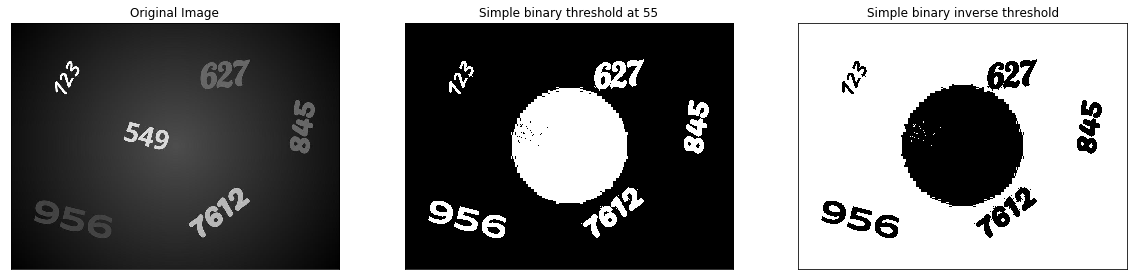

In [4]:
img = cv2.imread(path +'numbers.JPG')
img_processed1 = simple_b_threshold(img,55)
img_inverseb_processed1 = simple_b_inverse_threshold(img,55)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_processed1, cmap="gray")
plt.title("Simple binary threshold at 55"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_inverseb_processed1, cmap="gray")
plt.title("Simple binary inverse threshold"), plt.xticks([]), plt.yticks([])
plt.show()

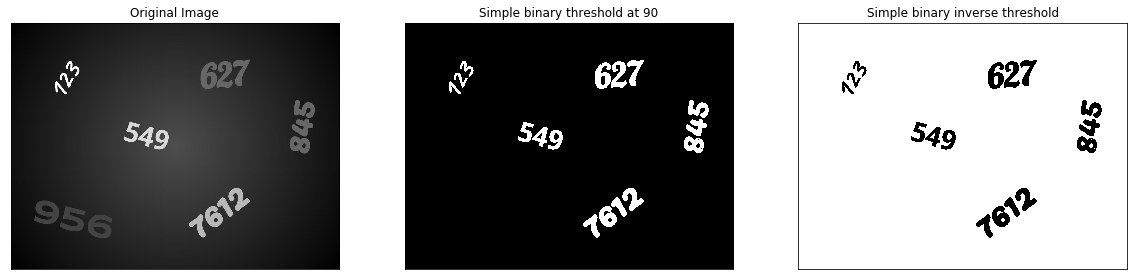

In [5]:
img = cv2.imread(path +'numbers.JPG')
img_processed2 = simple_b_threshold(img,90)
img_inverseb_processed2 = simple_b_inverse_threshold(img,90)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_processed2, cmap="gray")
plt.title("Simple binary threshold at 90"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_inverseb_processed2, cmap="gray")
plt.title("Simple binary inverse threshold"), plt.xticks([]), plt.yticks([])
plt.show()

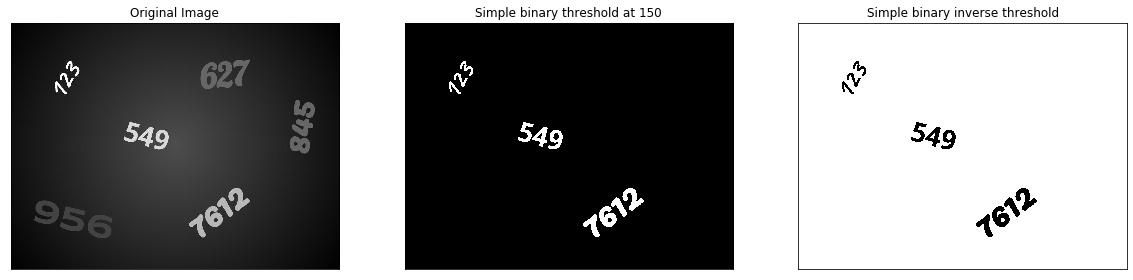

In [6]:
img = cv2.imread(path +'numbers.JPG')
img_processed3 = simple_b_threshold(img,150)
img_inverseb_processed3 = simple_b_inverse_threshold(img,150)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_processed3, cmap="gray")
plt.title("Simple binary threshold at 150"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_inverseb_processed3, cmap="gray")
plt.title("Simple binary inverse threshold"), plt.xticks([]), plt.yticks([])
plt.show()

## 1.2 Simple binary filter - observation

Write your observations about thresholded images at different thresholds.<br>
How many and which numbers are segmented at each threshold? (A number is considered as segmented if all digits of that number are considered as foreground in the thresholded image) <br>
What else do you observe at each threshold? (3 points)


**Answer**: The general observation about all three threshold is that with increase threshold value, only numbers with stronger white illumination (appears more white) can exist as forwgrounds on the thresholded image. Also, binary and inverse binary serves as complement image to eac other. Pixel appearing black in one picture would almost guaruntee to appear white on the other one. ("Almost" is because binary and inverse binary do not include pixels equal to the threshold value.)<br>
When threshold = 55, **123, 627, 845, 7612, 956 are segmented**. When threshold = 90, **123, 627, 845, 7612, 549 are segmented**. When threshold = 150, **123, 7612, 549 are segmented**.<br>
An observation is that there are **a circle-shaped hightlighted area at the center of the original image**. This area has a intensity between 55 and 90, which creating a large circle passing the 55 threshold but completely disappeared at 90 threshold. This is the reason why 549 is **not segmented in 55-threshold (blocked by the circle)** but later appears in 90-threshold.

## 1.3 Window binary filter 

In [7]:
def simple_w_threshold(img, threshold_l,threshold_h):
    
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)

    
    for i in range(0,M): 
        for j in range(0,N):
            if img[i,j]>threshold_l and img[i,j]<threshold_h:
                Z[i,j] = 255;
            else:
                Z[i,j] = 0;

    return Z


(Text(0.5, 1.0, 'Window binary threshold 55->90'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

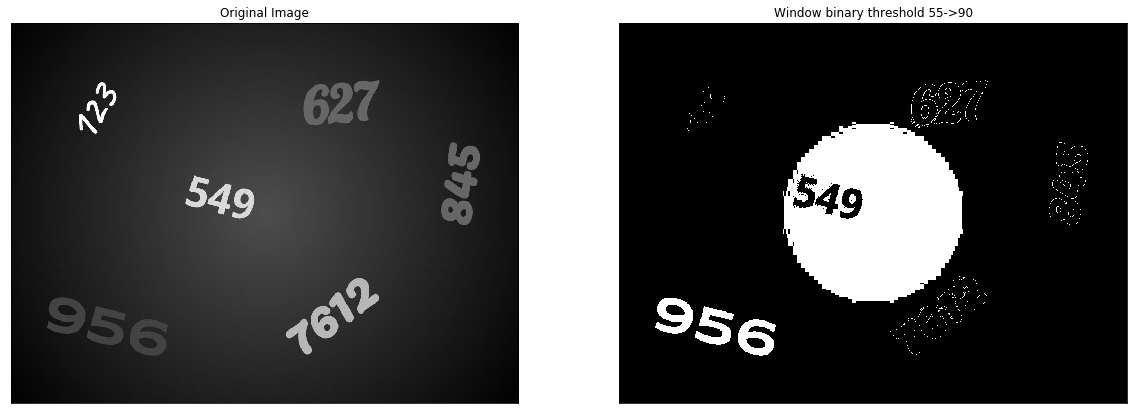

In [8]:
img = cv2.imread(path +'numbers.JPG')
img_w_processed1 = simple_w_threshold(img,55,90)


# display images
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(img, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_w_processed1, cmap="gray")
plt.title("Window binary threshold 55->90"), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Window binary threshold 90->150'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

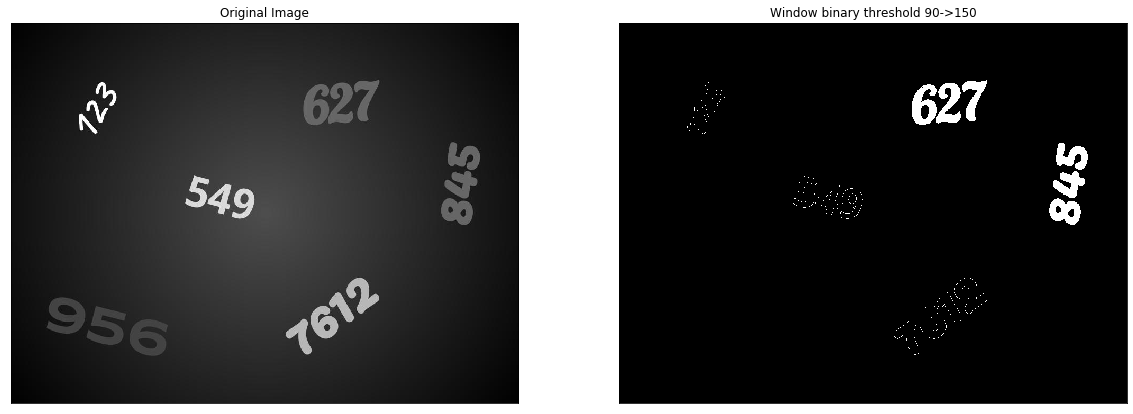

In [9]:
img = cv2.imread(path +'numbers.JPG')
img_w_processed1 = simple_w_threshold(img,90,150)


# display images
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(img, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_w_processed1, cmap="gray")
plt.title("Window binary threshold 90->150"), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Window binary threshold 55 -> 150'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

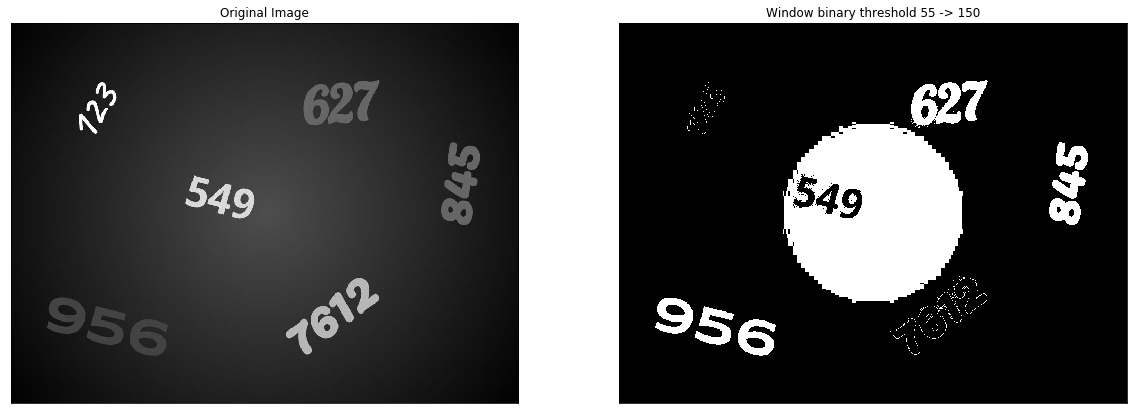

In [10]:
img = cv2.imread(path +'numbers.JPG')
img_w_processed1 = simple_w_threshold(img,55,150)


# display images
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(img, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_w_processed1, cmap="gray")
plt.title("Window binary threshold 55 -> 150"), plt.xticks([]), plt.yticks([])

Write your observations. How many and which numbers are segmented at each threshold?<br>
When threshold window falls between 55 and 90, **956** is segmented since its intensity is between the window. 549 is also visible since it is surrounded in a white circle, but 549 itself does not fall in the intensity window thus appear to be black.<br>
When threshold window is between 90 and 150, **627,845** is segmented since its intensity is between the window. <br>
When threshold window is between 55 and 150, **956, 627, 845** is segmented since its intensity is between the window. 549 is also visible since it is surrounded in a white circle. This window is **the union of the previous two, thus the segment result is also a combination of the previous two**.<br>


## 1.4 Segmenting number "123" and "549"

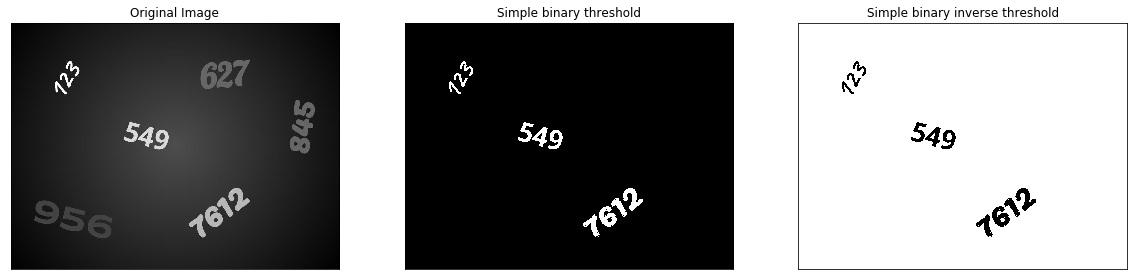

In [11]:
# first parameter attemp: 175

img = cv2.imread(path +'numbers.JPG')
img_processed1 = simple_b_threshold(img,175)
img_inverseb_processed1 = simple_b_inverse_threshold(img,175)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_processed1, cmap="gray")
plt.title("Simple binary threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_inverseb_processed1, cmap="gray")
plt.title("Simple binary inverse threshold"), plt.xticks([]), plt.yticks([])
plt.show()

# failed

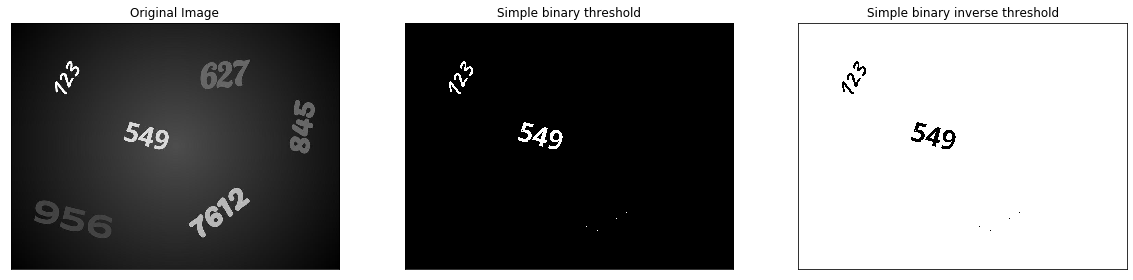

In [12]:
# 2nd parameter attemp: 200

img = cv2.imread(path +'numbers.JPG')
img_processed1 = simple_b_threshold(img,200)
img_inverseb_processed1 = simple_b_inverse_threshold(img,200)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_processed1, cmap="gray")
plt.title("Simple binary threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_inverseb_processed1, cmap="gray")
plt.title("Simple binary inverse threshold"), plt.xticks([]), plt.yticks([])
plt.show()

# almost

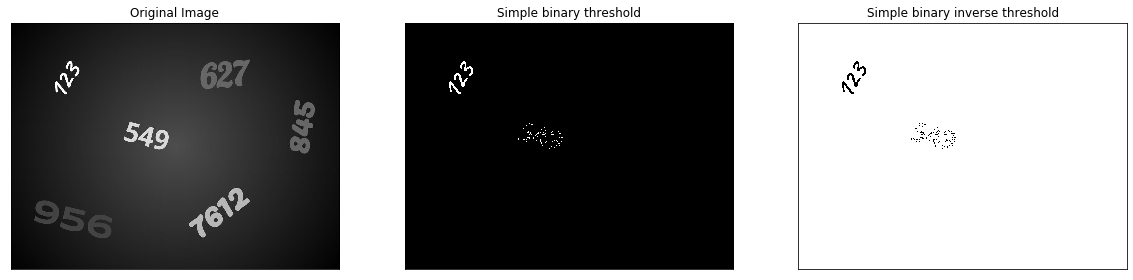

In [13]:
# 3rd parameter attemp: 220

img = cv2.imread(path +'numbers.JPG')
img_processed1 = simple_b_threshold(img,220)
img_inverseb_processed1 = simple_b_inverse_threshold(img,220)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_processed1, cmap="gray")
plt.title("Simple binary threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_inverseb_processed1, cmap="gray")
plt.title("Simple binary inverse threshold"), plt.xticks([]), plt.yticks([])
plt.show()

# failed also: too high

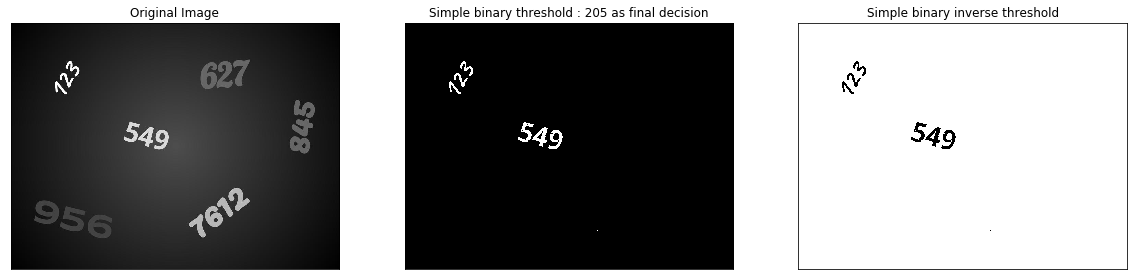

In [14]:
# Final decision: 205

img = cv2.imread(path +'numbers.JPG')
img_processed1 = simple_b_threshold(img,205)
img_inverseb_processed1 = simple_b_inverse_threshold(img,205)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_processed1, cmap="gray")
plt.title("Simple binary threshold : 205 as final decision"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_inverseb_processed1, cmap="gray")
plt.title("Simple binary inverse threshold"), plt.xticks([]), plt.yticks([])
plt.show()

# failed also: too high

**observation:** The previous observation helps me to narrow down the threshold value. Only 123, 549, 7612 remains black under the window of 55-150, thus to isolate 123 and 549, the threshold must be above 150. <br>
There are **attemp on the threshold, 175, 220 and 200**. 175 fails since 7612 is generally not filtered out by this threshold. 220 also fails since the threshold is too high and 549 is corrupted. 200 is acceptable, but there are some white pixel remains in the binary thresholded image, showing that there are residuals of 7612 left. <br>
Thus, the final threshold narrows down to **205**. As figure shown above, 123 and 549 is the only figures in foreground and there is little noise elsewhere.

# 2. Denoising

## 2.1 Gaussian blur filter
5 × 5 Gaussian filter ( variance = 2)

(<matplotlib.image.AxesImage at 0x1d6e481bb08>,
 Text(0.5, 1.0, 'Lighthouse - Gaussian blurred'))

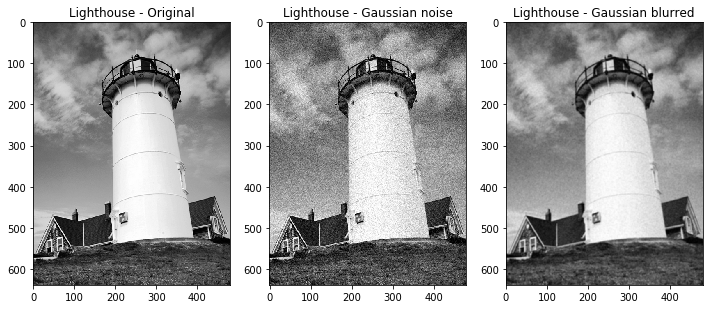

In [15]:
img2_origin = cv2.imread(path +'lighthouse.png',cv2.IMREAD_GRAYSCALE)
img2_g_noise = cv2.imread(path +'gaussian_lighthouse.png',cv2.IMREAD_GRAYSCALE)

#img2_origin = cv2.cvtColor(img2_origin, cv2.COLOR_BGR2RGB)
#img2_g_noise = cv2.cvtColor(img2_g_noise, cv2.COLOR_BGR2RGB)

img2_g_blurred = cv2.GaussianBlur(src = img2_g_noise,
                                  ksize= (5,5),
                                  sigmaX=np.sqrt(2),
                                  sigmaY=np.sqrt(2)) #variance in x and y respectively

# display images
plt.figure(figsize=(12,16)),plt.subplot(131),
plt.imshow(img2_origin,cmap="gray"), plt.title('Lighthouse - Original')
plt.subplot(132),
plt.imshow(img2_g_noise,cmap="gray"),  plt.title('Lighthouse - Gaussian noise')
plt.subplot(133),
plt.imshow(img2_g_blurred, cmap="gray"),  plt.title('Lighthouse - Gaussian blurred')

## 2.2 Box filter

(<matplotlib.image.AxesImage at 0x1d6df39b548>,
 Text(0.5, 1.0, 'Lighthouse - Box blurred'))

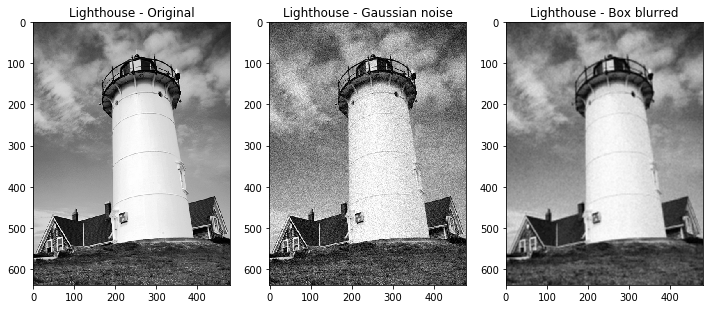

In [16]:
img2_g_noise = cv2.imread(path +'gaussian_lighthouse.png',cv2.IMREAD_GRAYSCALE)

img2_g_boxed = cv2.boxFilter(img2_g_noise, -1,(5,5)) # depth set to -1: use source depth
plt.figure(figsize=(12,16)), plt.subplot(131),
plt.imshow(img2_origin,cmap="gray"), plt.title('Lighthouse - Original')
plt.subplot(132),
plt.imshow(img2_g_noise,cmap="gray"),  plt.title('Lighthouse - Gaussian noise')
plt.subplot(133),
plt.imshow(img2_g_boxed,cmap="gray"),  plt.title('Lighthouse - Box blurred')

## 2.3 PSNR of both filters on Gaussian noise

In [17]:
psnr_gaussian = cv2.PSNR(img2_g_blurred, img2_origin,img2_origin.max())
psnr_box = cv2.PSNR(img2_g_boxed, img2_origin,img2_origin.max())

print("PSNR of gaussian blurred to clean image is", psnr_gaussian)
print("PSNR of box blurred to clean image is", psnr_box)

PSNR of gaussian blurred to clean image is 26.701192649155313
PSNR of box blurred to clean image is 25.30151386920589


**Observation**: The PSNR of gaussian blurred image is higher than box filter for 1.4dB, showing that gaussian filter works better in preserving the origial image. In fack, theoretically gaussian filter has more restriction on high frequency components. In other words, box filter will pass through more high frequency noise components, and it might also cause ringing effect which makes the filtered image not as smooth.

## 2.4 Gaussian filter (Salt and pepper noise)

(<matplotlib.image.AxesImage at 0x1d6e0454f88>,
 Text(0.5, 1.0, 'Lighthouse with salt and pepper noise - Gaussian blurred'))

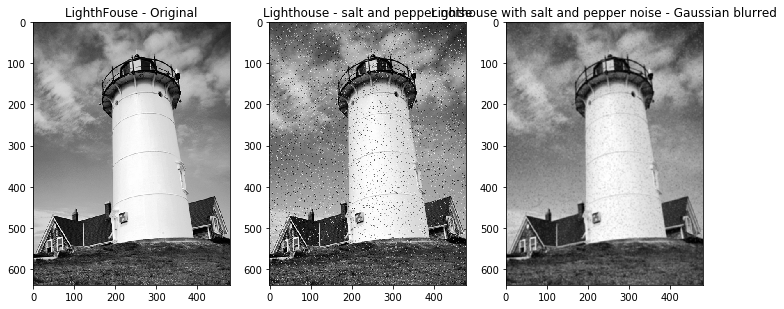

In [18]:
img2_origin = cv2.imread(path +'lighthouse.png',cv2.IMREAD_GRAYSCALE)
img2_sp_noise = cv2.imread(path +'saltandpepper_lighthouse.png',cv2.IMREAD_GRAYSCALE)

#img2_origin = cv2.cvtColor(img2_origin, cv2.COLOR_BGR2RGB)
#img2_sp_noise = cv2.cvtColor(img2_sp_noise, cv2.COLOR_BGR2RGB)

img2_sp_blurred = cv2.GaussianBlur(src = img2_sp_noise,
                                  ksize= (5,5),
                                  sigmaX=np.sqrt(2),
                                  sigmaY=np.sqrt(2)) #variance in x and y respectively

# display images
plt.figure(figsize=(12,16)),plt.subplot(131),
plt.imshow(img2_origin,cmap="gray"), plt.title('LighthFouse - Original')
plt.subplot(132),
plt.imshow(img2_sp_noise,cmap="gray"),  plt.title('Lighthouse - salt and pepper noise')
plt.subplot(133),
plt.imshow(img2_sp_blurred,cmap="gray"),  plt.title('Lighthouse with salt and pepper noise - Gaussian blurred')

## 2.5 Median filter (Salt and pepper noise)

(<matplotlib.image.AxesImage at 0x1d6e434ed88>,
 Text(0.5, 1.0, 'Lighthouse with salt and pepper noise - median blurred'))

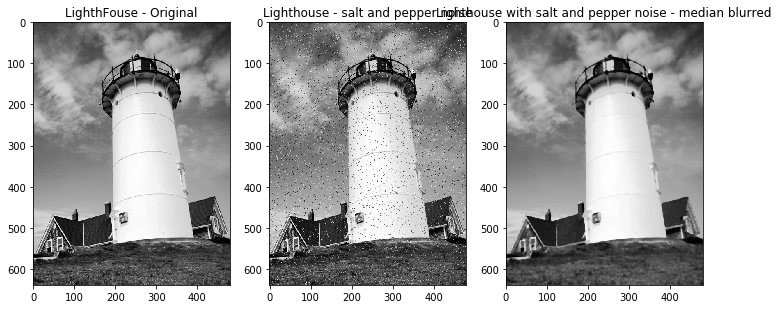

In [19]:
img2_origin = cv2.imread(path +'lighthouse.png',cv2.IMREAD_GRAYSCALE)
img2_sp_noise = cv2.imread(path +'saltandpepper_lighthouse.png',cv2.IMREAD_GRAYSCALE)

#img2_origin = cv2.cvtColor(img2_origin, cv2.COLOR_BGR2GRAY)
#img2_sp_noise = cv2.cvtColor(img2_sp_noise, cv2.COLOR_BGR2GRAY)

img2_sp_median = cv2.medianBlur(img2_sp_noise, 5)

# display images
plt.figure(figsize=(12,16)),plt.subplot(131),
plt.imshow(img2_origin,cmap="gray"), plt.title('LighthFouse - Original')
plt.subplot(132),
plt.imshow(img2_sp_noise,cmap="gray"),  plt.title('Lighthouse - salt and pepper noise')
plt.subplot(133),
plt.imshow(img2_sp_median,cmap="gray"),  plt.title('Lighthouse with salt and pepper noise - median blurred')

## 2.6 PSNR Comparision (gaussian and median used on salt and pepper noise)

In [20]:
psnr_gaussian_sp = cv2.PSNR(img2_sp_blurred, img2_origin,img2_origin.max())
psnr_median_sp = cv2.PSNR(img2_sp_median, img2_origin,img2_origin.max())

print("PSNR of gaussian blurred to clean image is", psnr_gaussian_sp )
print("PSNR of median blurred to clean image is", psnr_median_sp)

PSNR of gaussian blurred to clean image is 26.190075947325553
PSNR of median blurred to clean image is 26.808546603069367


**Observation**: The **PSNR of median filtered image leads by 0.6dB**. Theoretically the box filter would have a much better performance considering its median filter would constantly eliminate outliers (salt and pepper noise pixel). The gaussian blur shouldn't perform as well since it basically spare the noise across its neighbours, but not directly removing them.<br>
The reason why the distinction between box filter and gaussian is not significant here is probably due to the size of the median filter. **When the median filter size decreased to 3 (as a trial), the psnr actually rised to 30 db which is much better.** Please see the code below

In [21]:
img2_sp_median_3 = cv2.medianBlur(img2_sp_noise, 3)
psnr_median_sp = cv2.PSNR(img2_sp_median_3, img2_origin,img2_origin.max())
print("PSNR of median blurred to clean image is", psnr_median_sp)

PSNR of median blurred to clean image is 30.049637633918934


# 3. Sobel Edge Detector

## 3.1 Sobel Edge Detector - Effect on the Filter size

In [22]:
# Define wrapper function for part 3
# essentially sobel plus the threshold function

def find_sober_edge(img, kernel_size, threshold_intensity, isNoised = False, boxF_size = 3):
    
    # 
    if (isNoised == True):
        
        img_denoised =  cv2.boxFilter(img,  cv2.CV_64F,(boxF_size,boxF_size))
        I_x = cv2.Sobel(img_denoised, cv2.CV_64F, 1, 0, ksize=kernel_size)
        I_y = cv2.Sobel(img_denoised, cv2.CV_64F, 0, 1, ksize=kernel_size)
        
    else:
        I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=kernel_size)
        I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=kernel_size)
        
    I_m = cv2.magnitude(I_x, I_y)
    
    ret, I_m_thres = cv2.threshold(I_m,
                              threshold_intensity*I_m.max(),
                              255,
                              cv2.THRESH_BINARY)
    
    return I_m, I_m_thres

### 3*3 sober with 10% ans 20% threshold

(<matplotlib.image.AxesImage at 0x1d6df7a5a48>,
 Text(0.5, 1.0, 'sobel magnitude - 20% threshold'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

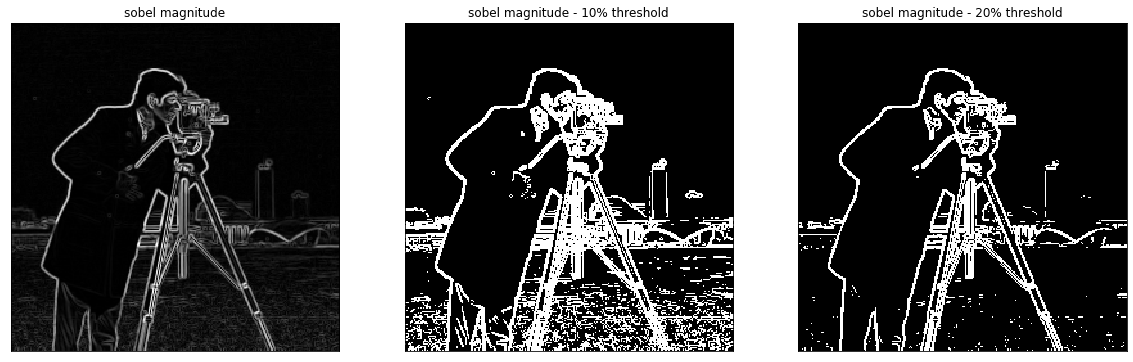

In [23]:
img3_origin = cv2.imread(path +'cameraman.png',cv2.IMREAD_GRAYSCALE)
I_m, I_m_thres_10 = find_sober_edge(img3_origin, 3, 0.1)

img3_origin = cv2.imread(path +'cameraman.png',cv2.IMREAD_GRAYSCALE)
I_m, I_m_thres_20 = find_sober_edge(img3_origin, 3, 0.2)

# display images
plt.figure(figsize=(20,20)),plt.subplot(131),
plt.imshow(I_m,cmap="gray"), plt.title('sobel magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(132),
plt.imshow(I_m_thres_10,cmap="gray"),  plt.title('sobel magnitude - 10% threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(133),
plt.imshow(I_m_thres_20,cmap="gray"),  plt.title('sobel magnitude - 20% threshold'), plt.xticks([]), plt.yticks([])

### 5*5 sober with 10% ans 20% threshold

(<matplotlib.image.AxesImage at 0x1d6df6e0308>,
 Text(0.5, 1.0, '5*5 sobel magnitude - 20% threshold'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

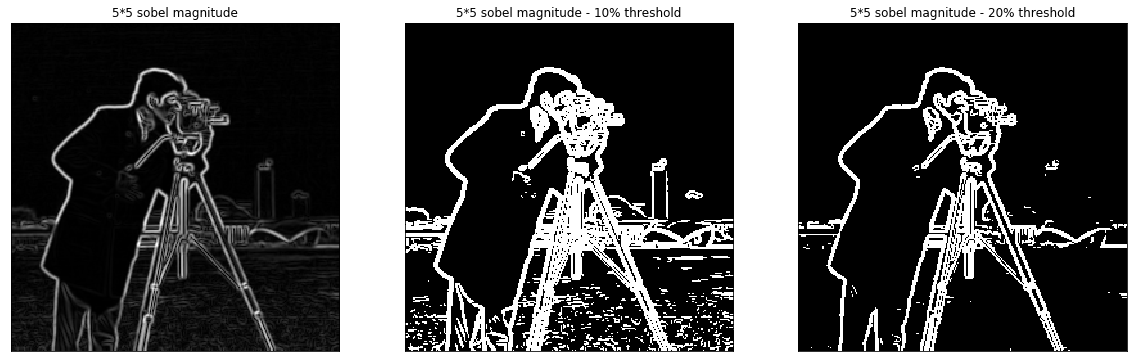

In [24]:
img3_origin = cv2.imread(path +'cameraman.png',cv2.IMREAD_GRAYSCALE)
I_m5, I_m5_thres_10 = find_sober_edge(img3_origin, 5, 0.1)

img3_origin = cv2.imread(path +'cameraman.png',cv2.IMREAD_GRAYSCALE)
I_m5, I_m5_thres_20 = find_sober_edge(img3_origin, 5, 0.2)

# display images
plt.figure(figsize=(20,20)),plt.subplot(131),
plt.imshow(I_m5,cmap="gray"), plt.title('5*5 sobel magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(132),
plt.imshow(I_m5_thres_10,cmap="gray"),  plt.title('5*5 sobel magnitude - 10% threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(133),
plt.imshow(I_m5_thres_20,cmap="gray"),  plt.title('5*5 sobel magnitude - 20% threshold'), plt.xticks([]), plt.yticks([])

### 7*7 sober with 10% ans 20% threshold

(<matplotlib.image.AxesImage at 0x1d6df973ec8>,
 Text(0.5, 1.0, '7*7 sobel magnitude - 20% threshold'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

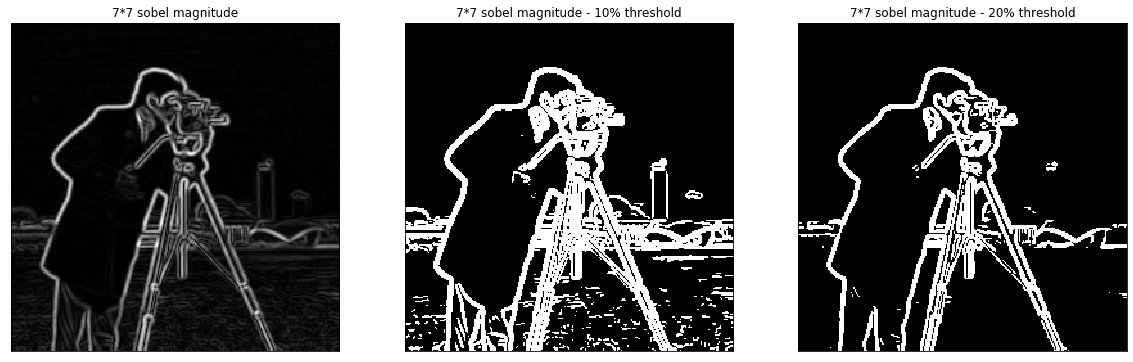

In [25]:
img3_origin = cv2.imread(path +'cameraman.png',cv2.IMREAD_GRAYSCALE)
I_m7, I_m7_thres_10 = find_sober_edge(img3_origin, 7, 0.1)

img3_origin = cv2.imread(path +'cameraman.png',cv2.IMREAD_GRAYSCALE)
I_m7, I_m7_thres_20 = find_sober_edge(img3_origin, 7, 0.2)

# display images
plt.figure(figsize=(20,20)),plt.subplot(131),
plt.imshow(I_m7,cmap="gray"), plt.title('7*7 sobel magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(132),
plt.imshow(I_m7_thres_10,cmap="gray"),  plt.title('7*7 sobel magnitude - 10% threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(133),
plt.imshow(I_m7_thres_20,cmap="gray"),  plt.title('7*7 sobel magnitude - 20% threshold'), plt.xticks([]), plt.yticks([])

**Observation**:
Effect of Kernel: Three kernel sizes are tried in this section, with 3,5 and 7 respectively. <br> The first observation is that **the larger the size of the kernel the thicker the edge returned**. Comparing the raw results before thresholding, it looks like the bigger the sobel kernel, the more "blurring" for the egdes.<br> 

Another point is that the larger the sobel kernel size, the more significant smoothing effect there is. In this way, the sobel egde detector successfully filtered out the water wrinkles by using the 7* 7 kernel.


## 3.2 Sobel Edge Detector - Effect on denoising

### Comparing the effect of denoising on 3*3 sobel

(<matplotlib.image.AxesImage at 0x1d6e0589208>,
 Text(0.5, 1.0, 'denoised image - 20% threshold'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

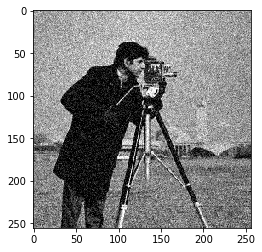

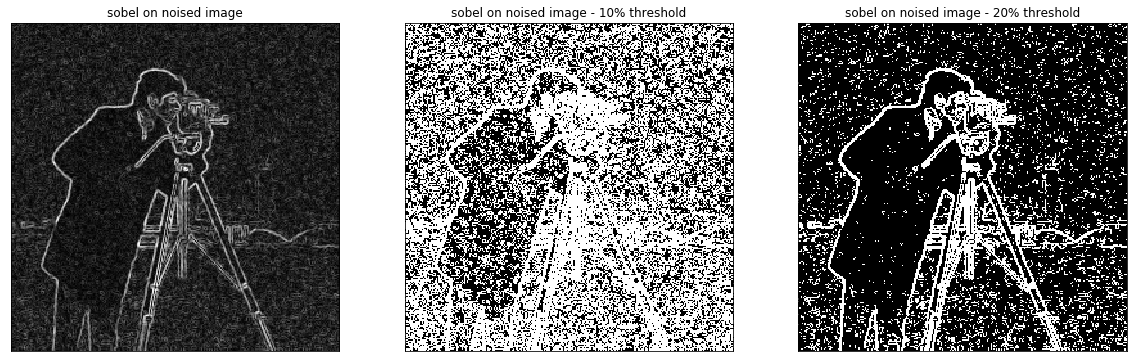

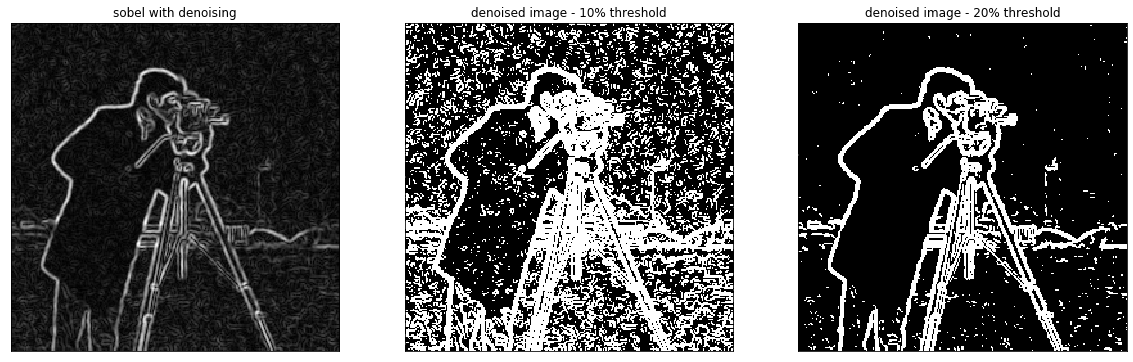

In [26]:
img3_noised = cv2.imread(path +'gaussian_cameraman.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img3_noised, cmap='gray')
I_nm, I_nm_thres_10 = find_sober_edge(img3_noised, 3, 0.1)

img3_noised = cv2.imread(path +'gaussian_cameraman.png',cv2.IMREAD_GRAYSCALE)
I_nm, I_nm_thres_20 = find_sober_edge(img3_noised, 3, 0.2)

# If parameter "is_noised" set to true, then apply a 3*3 box filter before the sobel 
img3_noised = cv2.imread(path +'gaussian_cameraman.png',cv2.IMREAD_GRAYSCALE)
I_dnm, I_dnm_thres_10 = find_sober_edge(img3_noised, 3, 0.1, True)

img3_noised = cv2.imread(path +'gaussian_cameraman.png',cv2.IMREAD_GRAYSCALE)
I_dnm, I_dnm_thres_20 = find_sober_edge(img3_noised, 3, 0.2, True)


# display images - noise
plt.figure(figsize=(20,20)),plt.subplot(131),
plt.imshow(I_nm,cmap="gray"), plt.title('sobel on noised image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),
plt.imshow(I_nm_thres_10,cmap="gray"),  plt.title('sobel on noised image - 10% threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(133),
plt.imshow(I_nm_thres_20,cmap="gray"),  plt.title('sobel on noised image - 20% threshold'), plt.xticks([]), plt.yticks([])


# display images - denoised
plt.figure(figsize=(20,20)),plt.subplot(231),
plt.imshow(I_dnm,cmap="gray"), plt.title('sobel with denoising'), plt.xticks([]), plt.yticks([])
plt.subplot(232),
plt.imshow(I_dnm_thres_10,cmap="gray"),  plt.title('denoised image - 10% threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(233),
plt.imshow(I_dnm_thres_20,cmap="gray"),  plt.title('denoised image - 20% threshold'), plt.xticks([]), plt.yticks([])

**Observation:** <br>
Effect of Denoising: 
Comparing the output image of sobel with and without denoising using a box filter, we can conclude that denoising is very important to sobel edge detection.<br>
From 10% threshold image without box denoising ("sobel on noised image - 10% threshold"), basically sobel detector will take noise pixel as edges thus there is a commom distribution of noise across the entire image.<br>
After applying a box filter before detecting edge, the noise is smoothed partially. From image "denoised image - 10% threshold", we can see the density of noise pixel has decreased. Then, with a larger threshold, "denoised image - 20% threshold", the noisy part is greatly suppressed.

# 4 Canny Edge Detection

## 4.1 Brief introduction about the Canny Edge Detector 

1. First use the gaussian filter to remove noise. Then get X and Y gradient of the image using sobel filter.

2. Calculate the image's amplitude and gradient using cv2.magnitude and cv2.phase using gradients in X and Y directions.

3. Using the magnitude and phase, perform **non maximum suppression**. This will 'shrink' the edge detectde down to one pixel wide.

4. "Hysteresis" linking: Choose two thresold. Use the higher one to find strong edge points, then use weak point (lower threshoded) to determine whether the neighbour pixel of the edge point need to be connected. In this way, the contour is first setup by strong point and completed by some of the weak points.


## 4.2 Exploring Hyper-parameters (K,L,U) with "Dolphin" Image

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


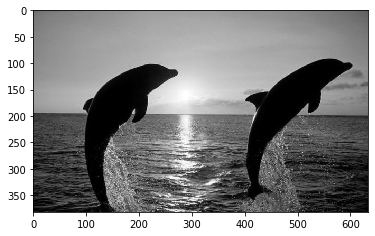

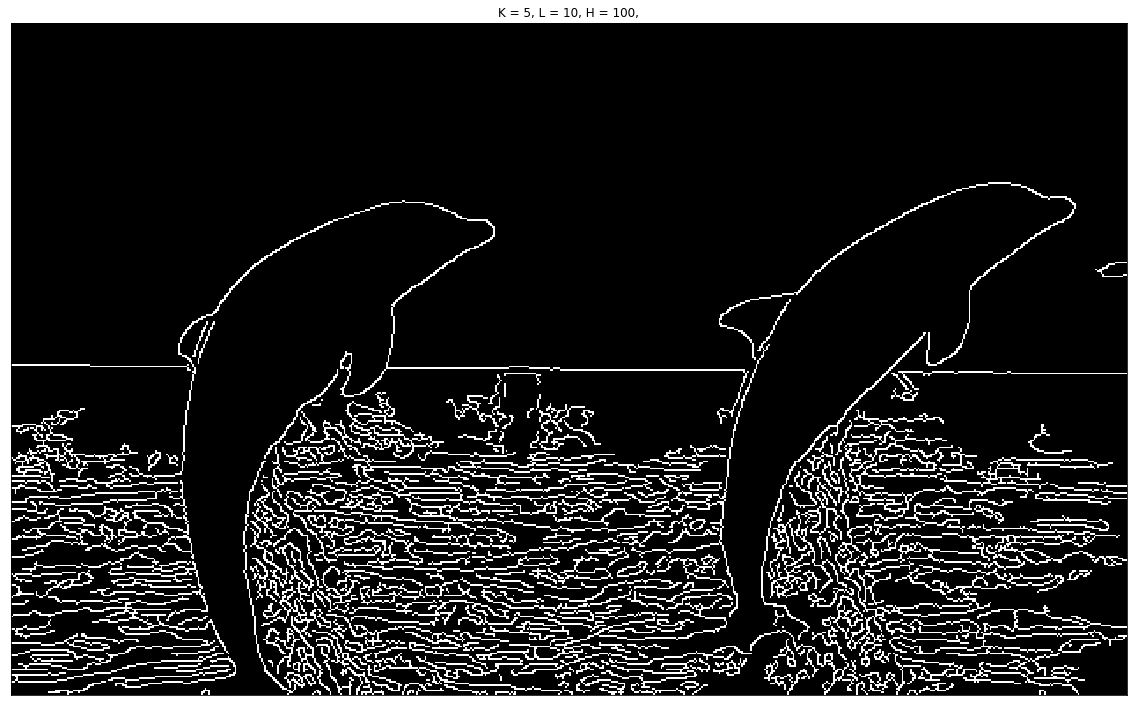

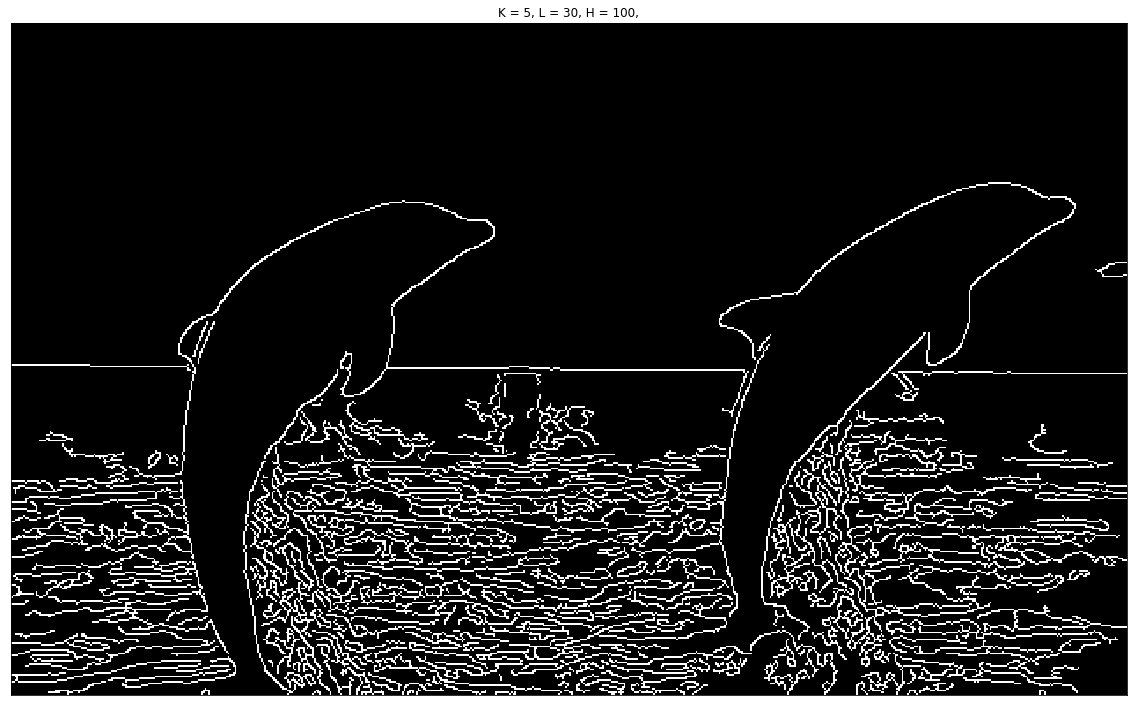

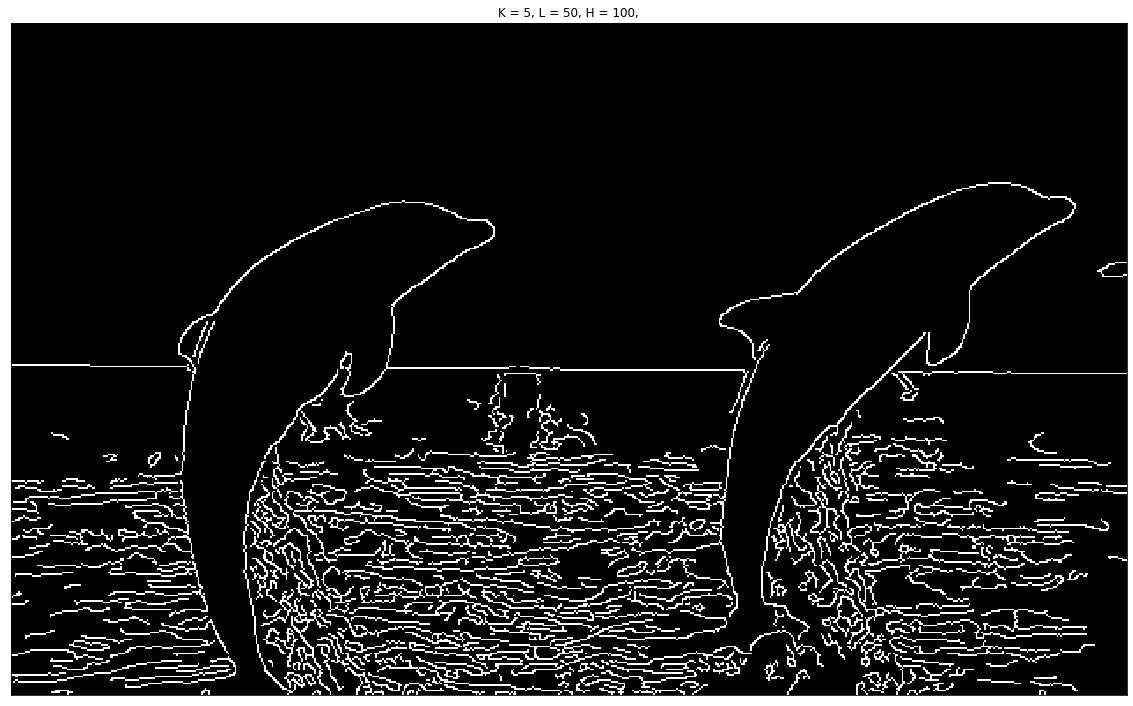

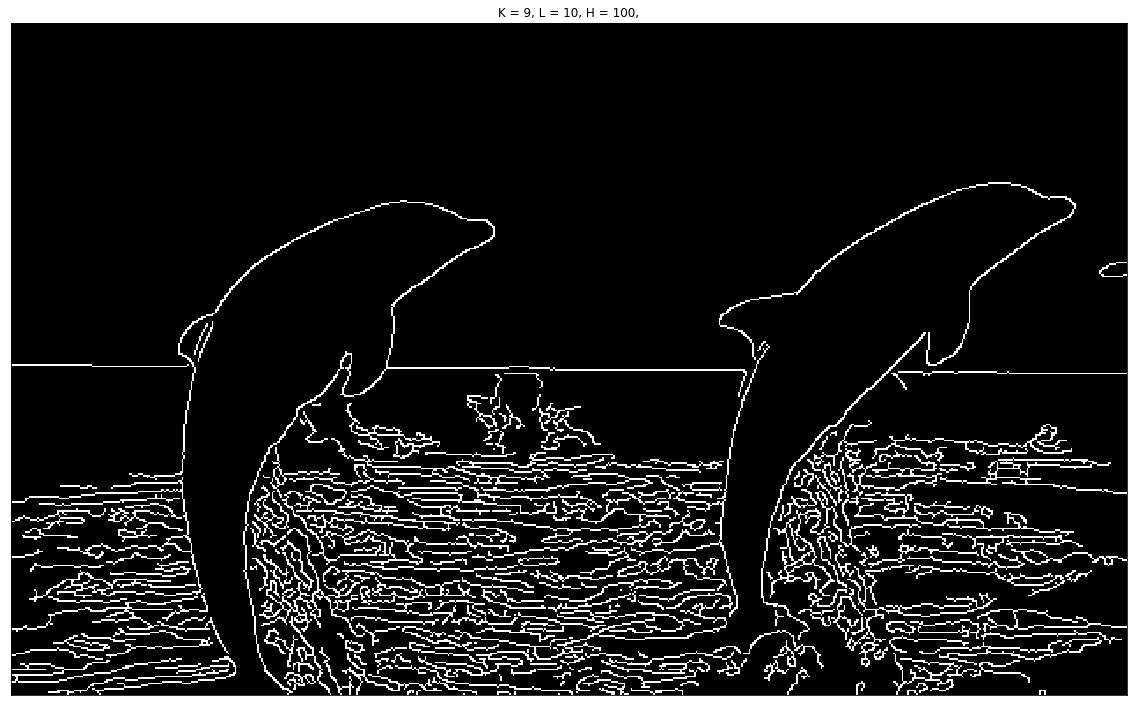

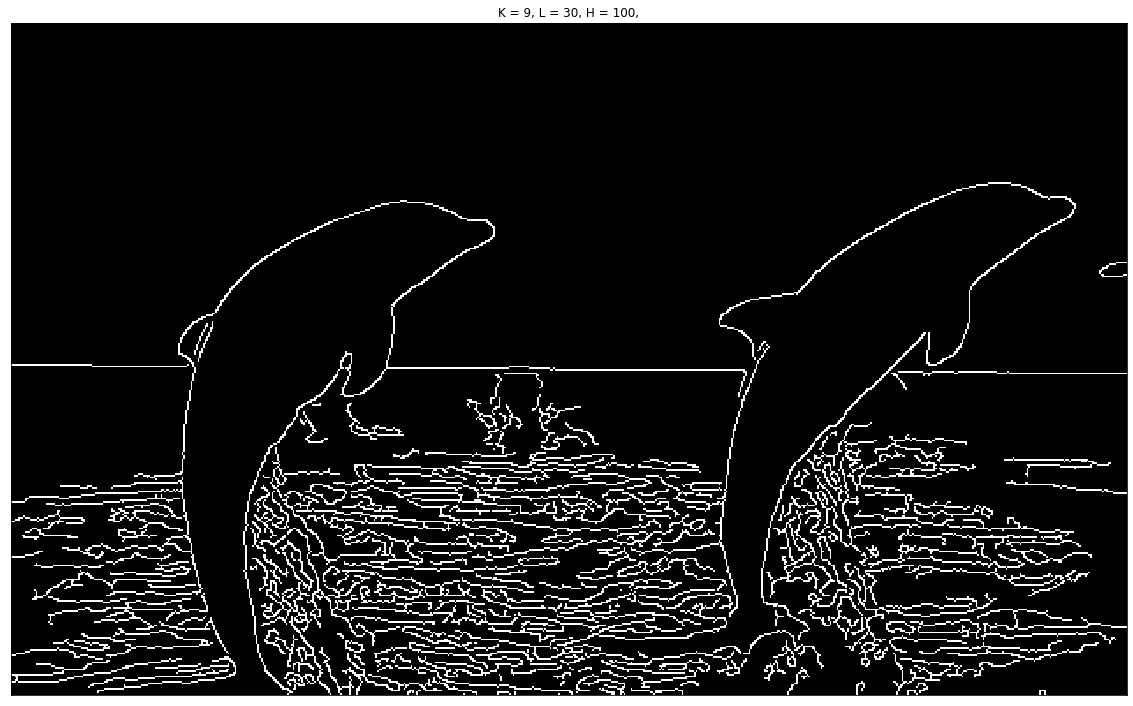

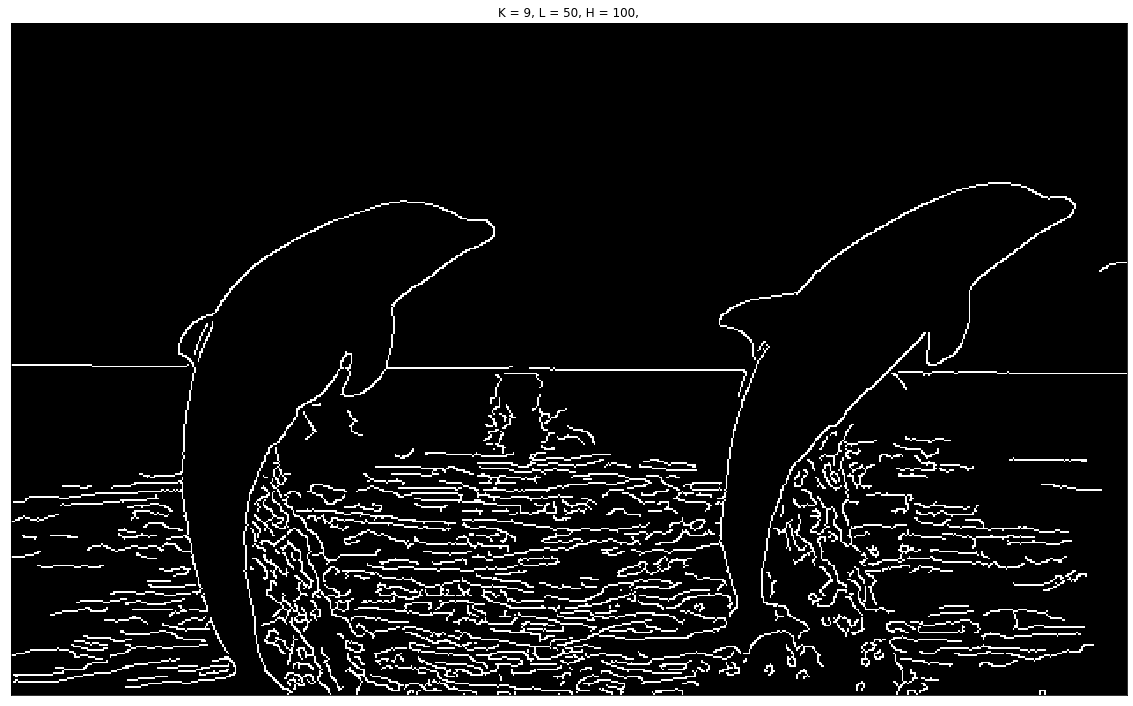

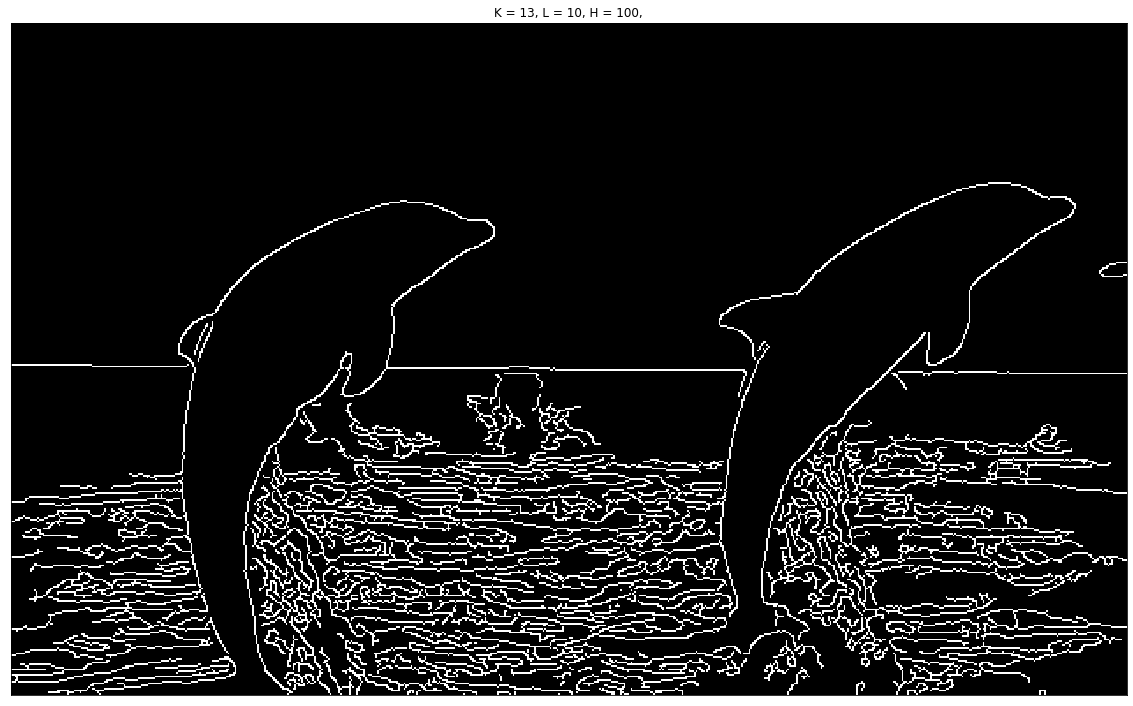

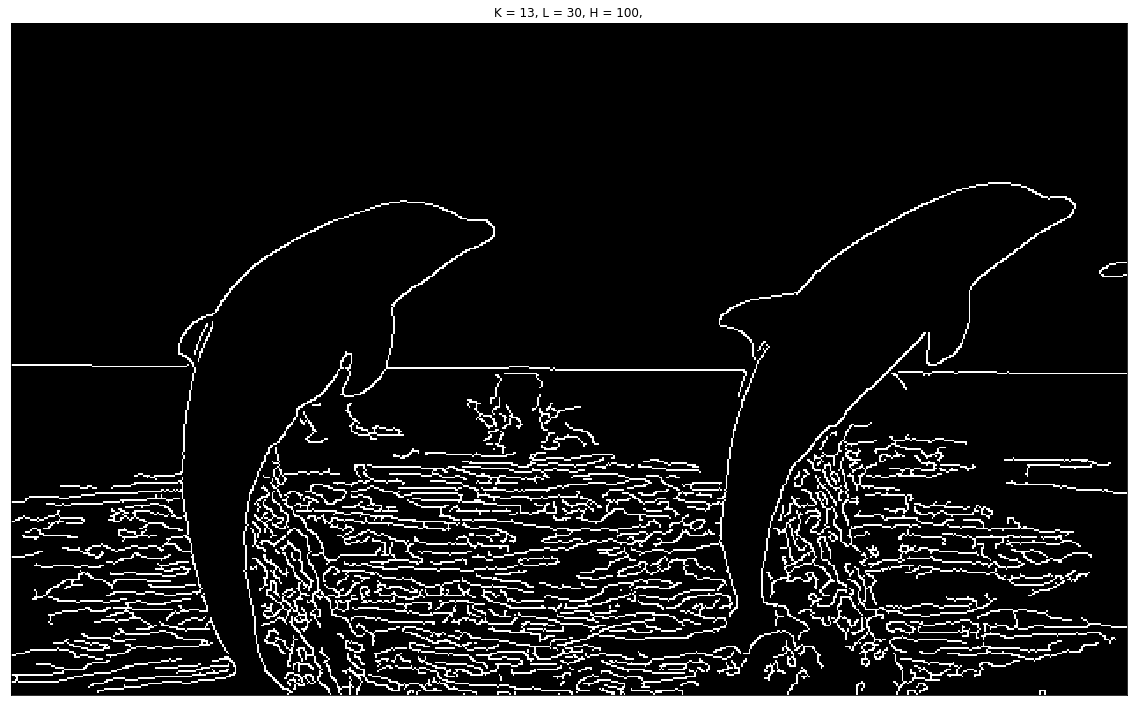

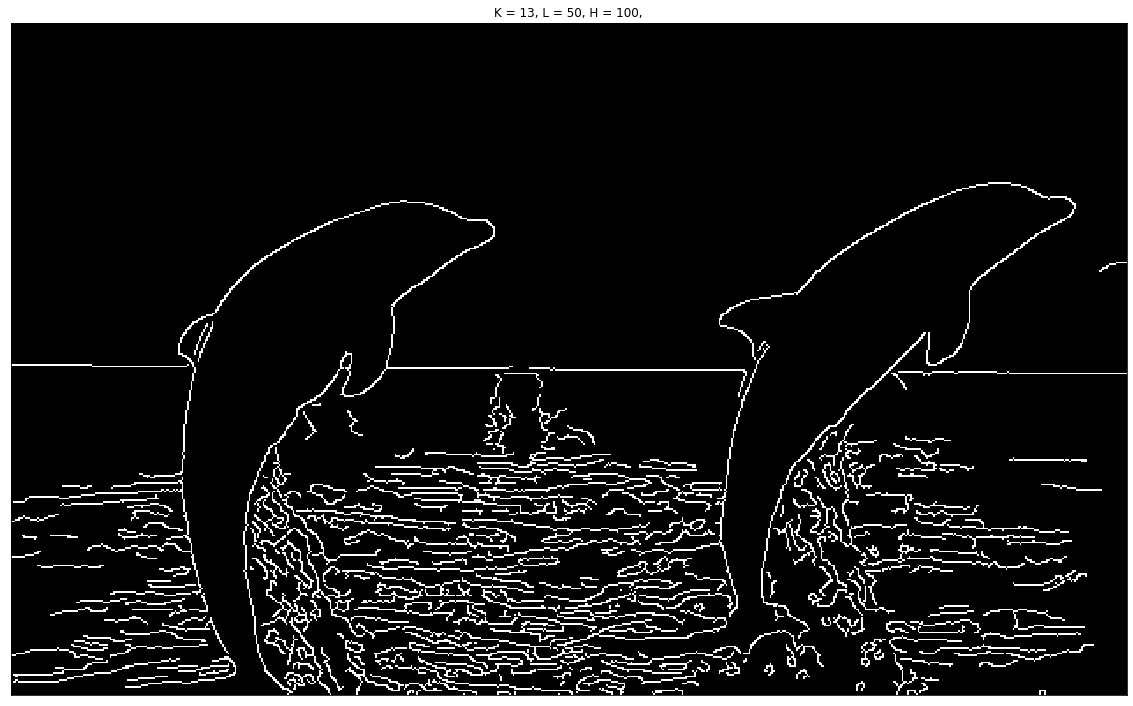

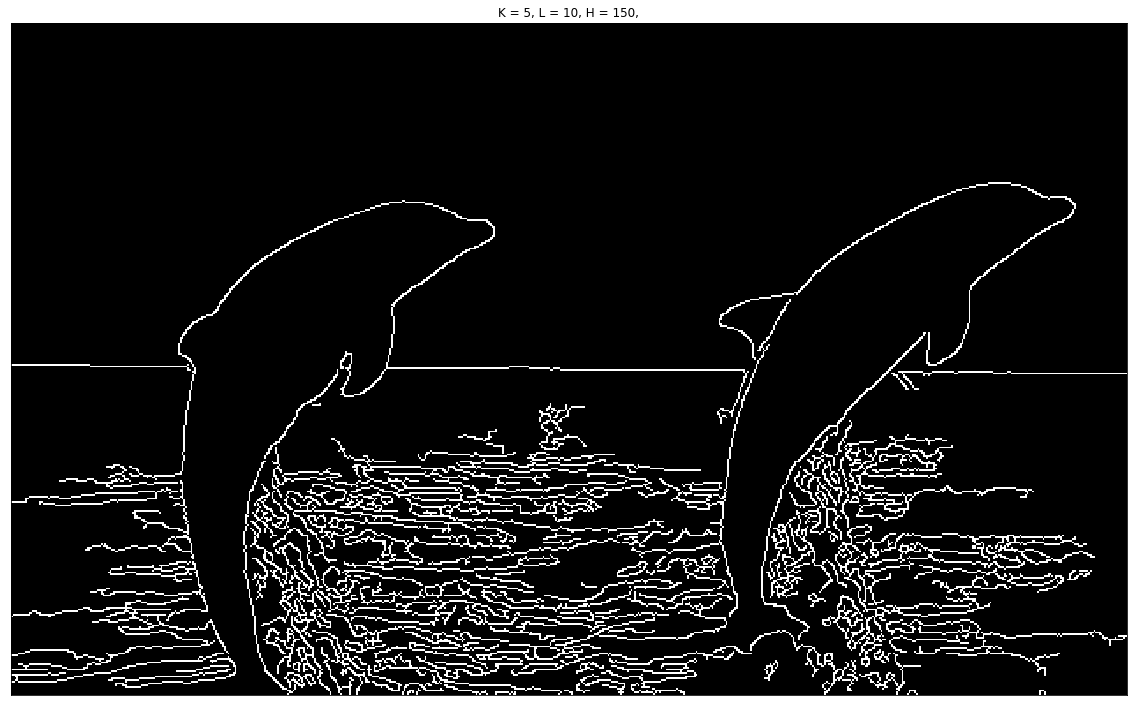

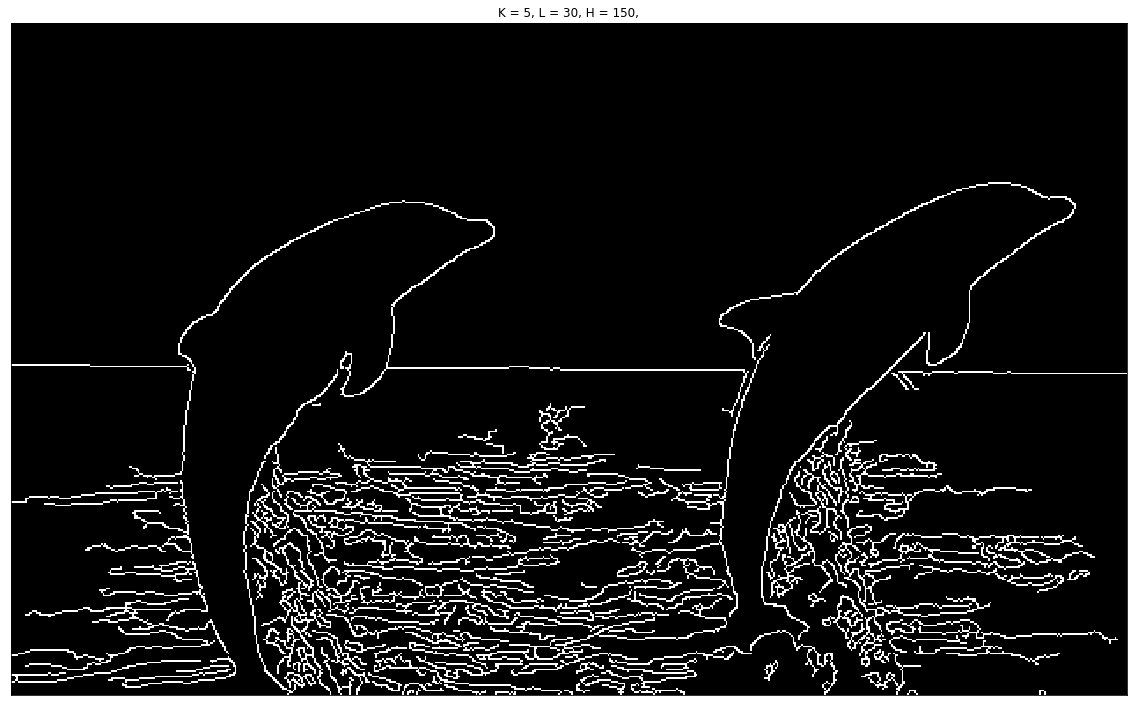

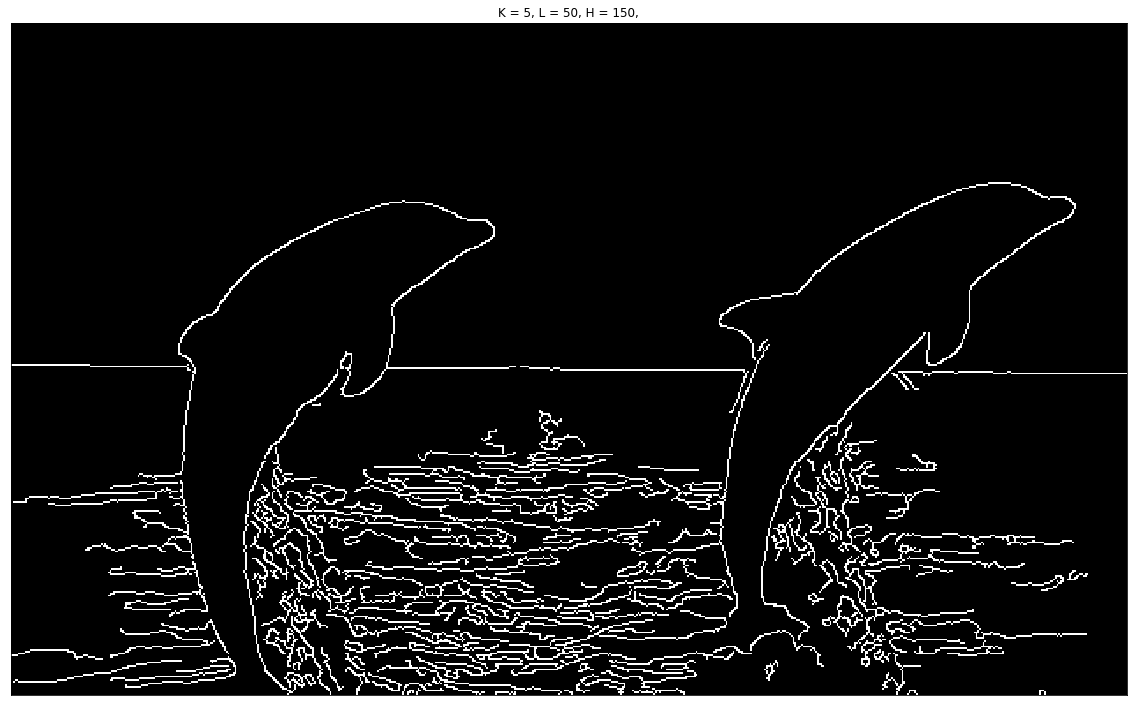

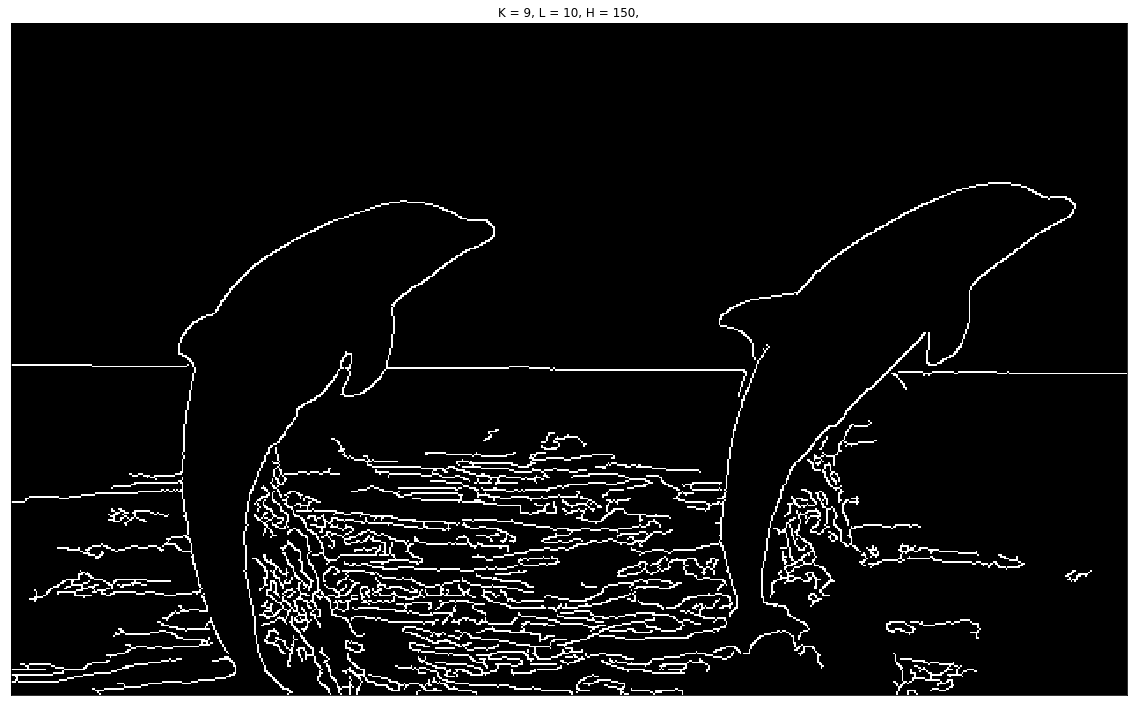

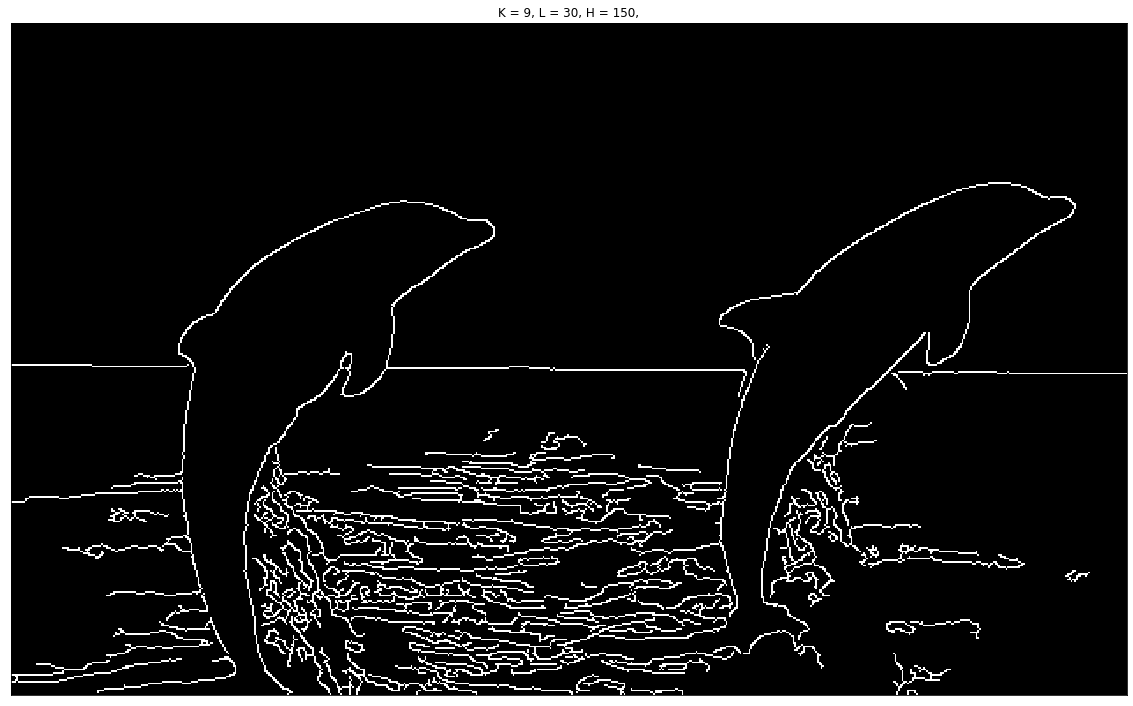

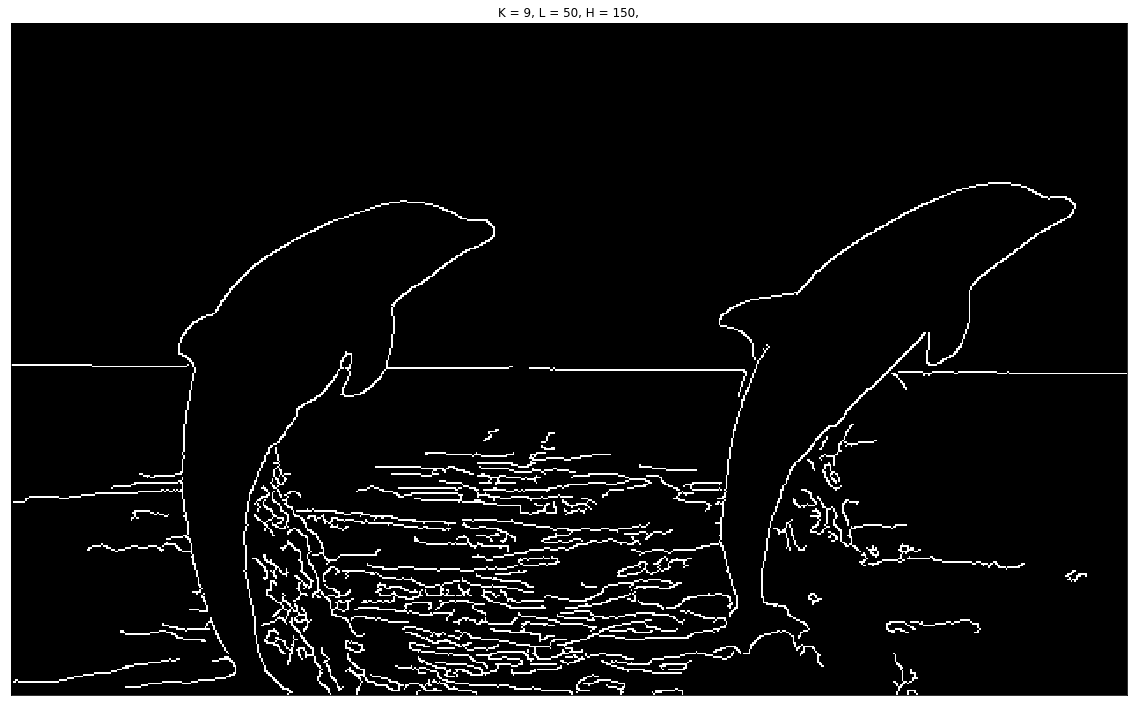

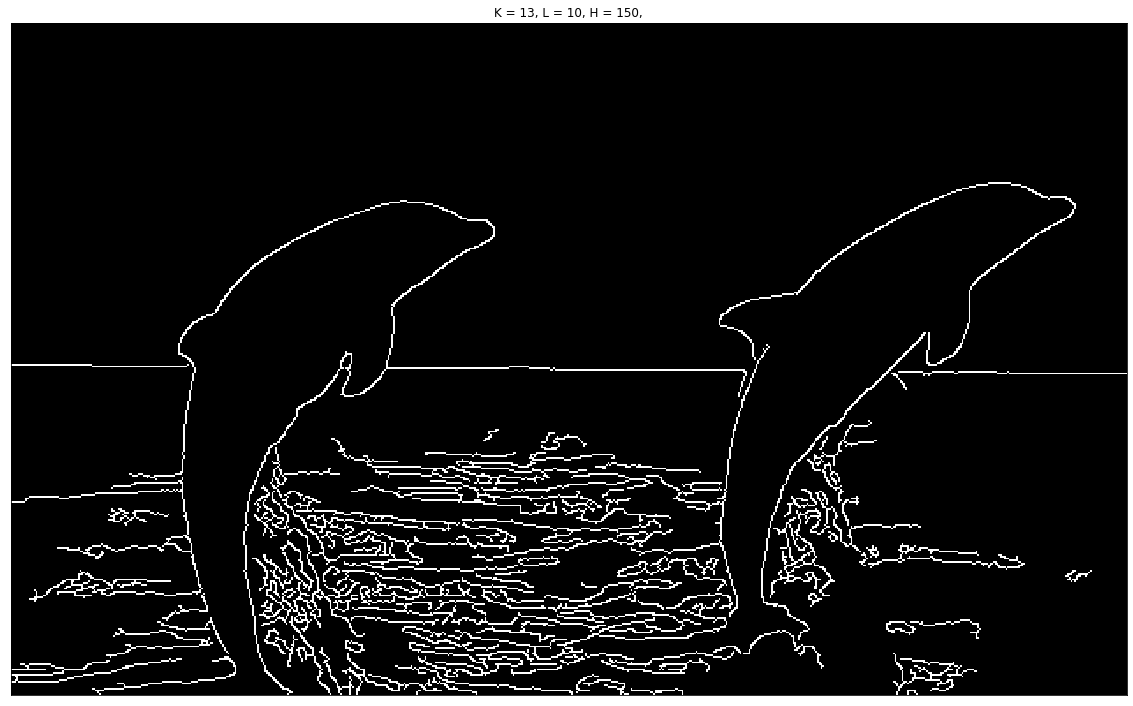

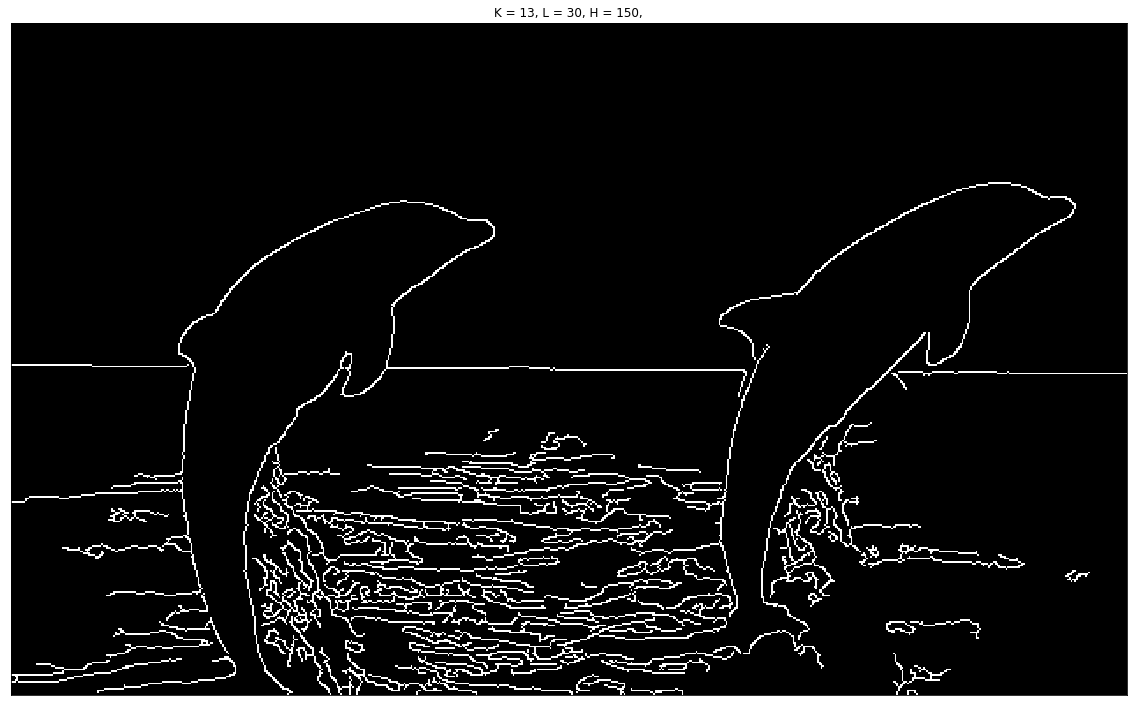

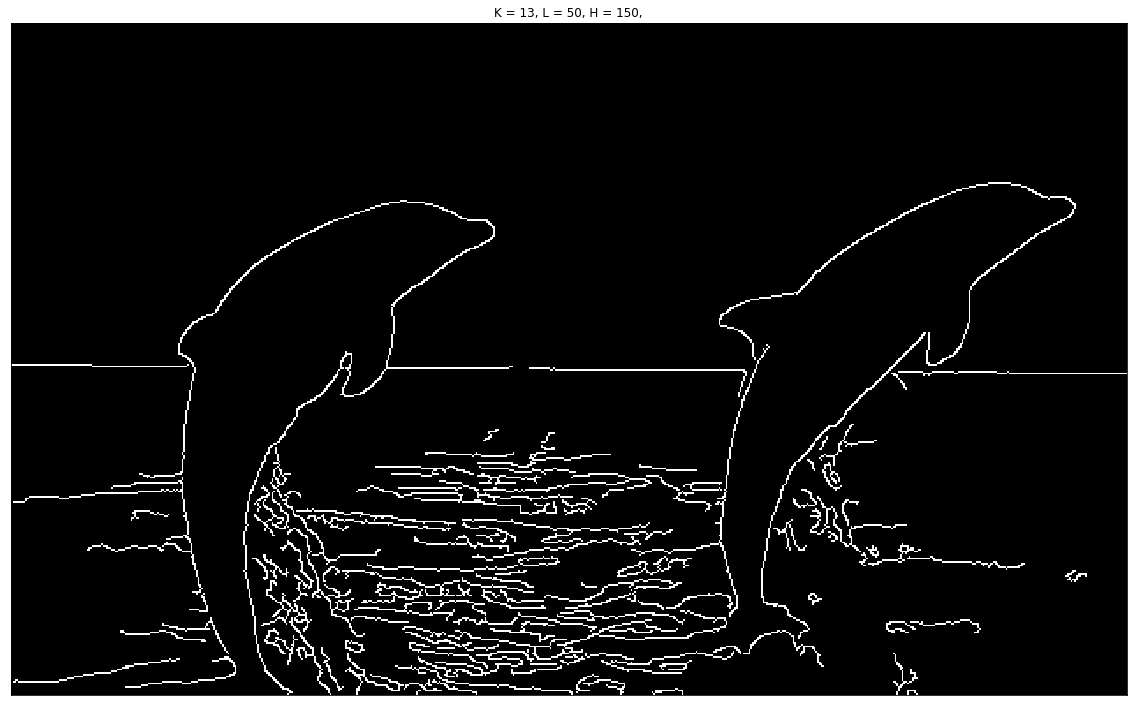

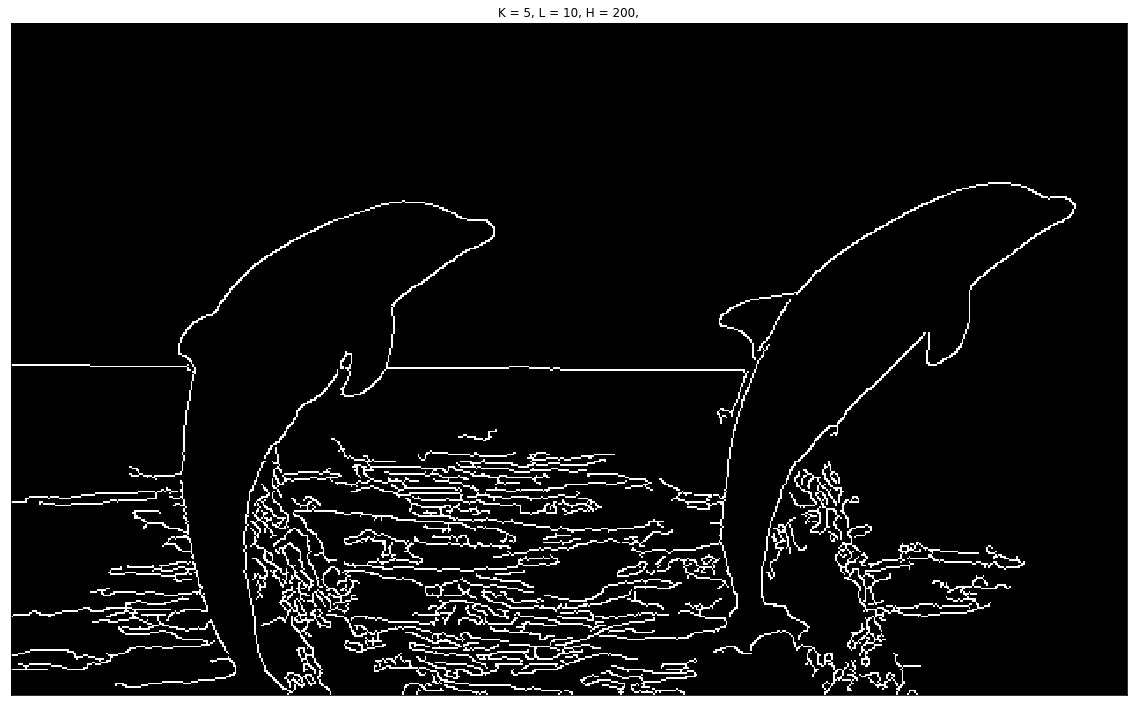

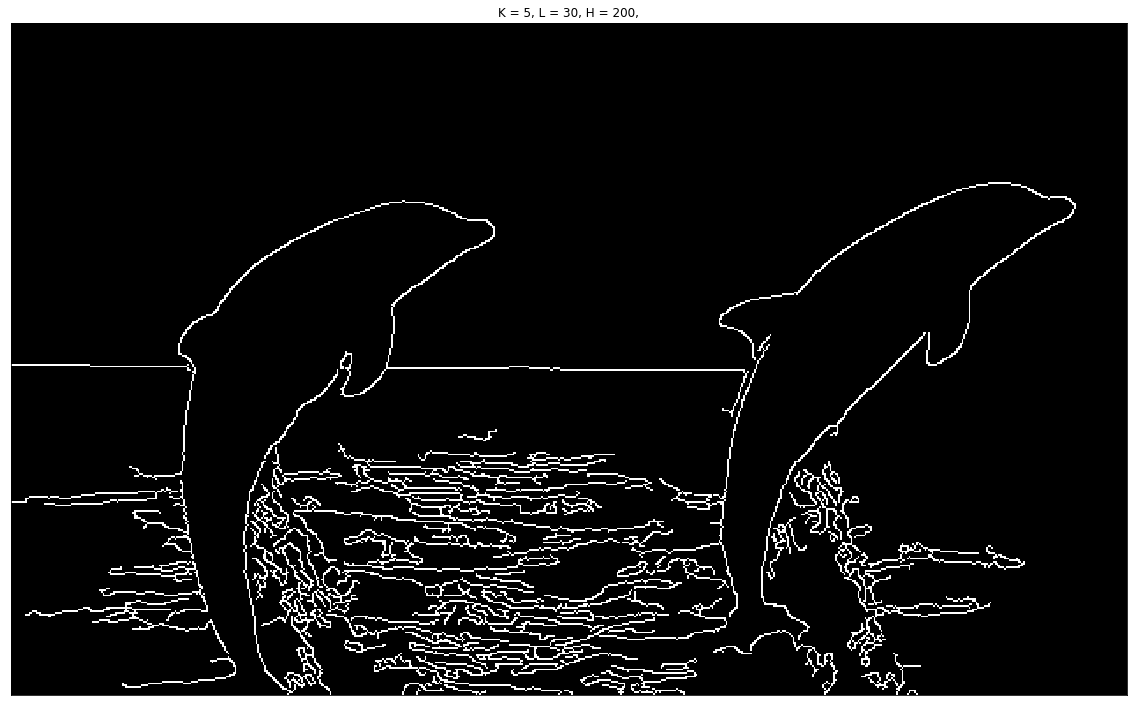

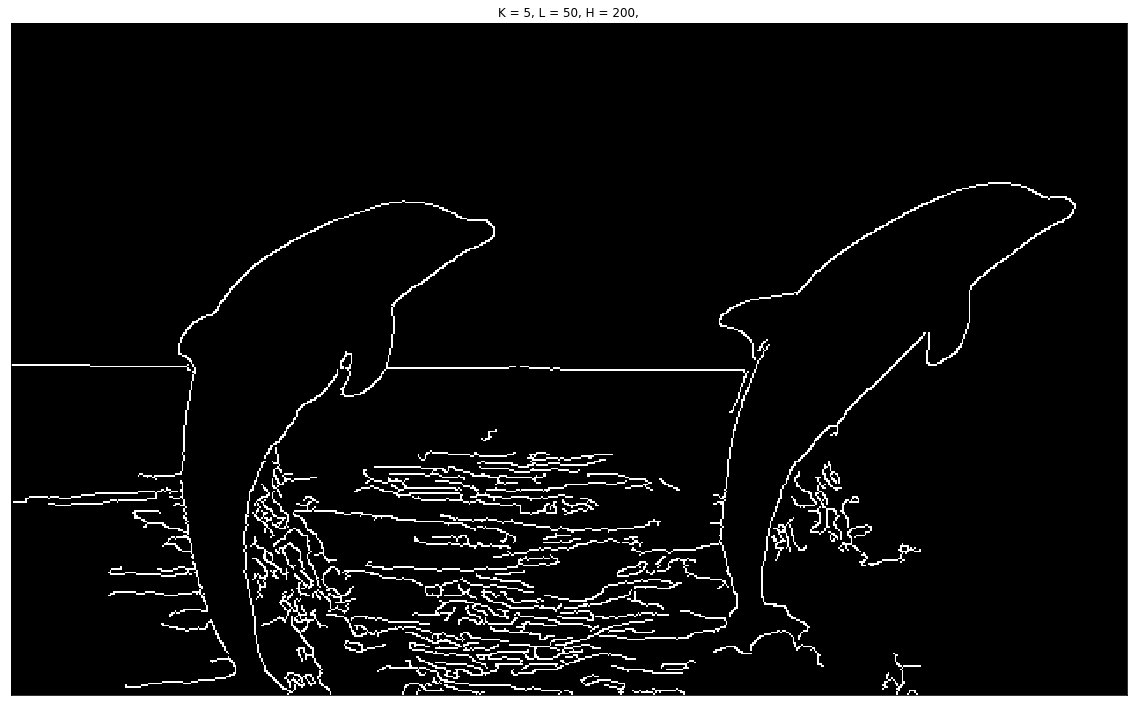

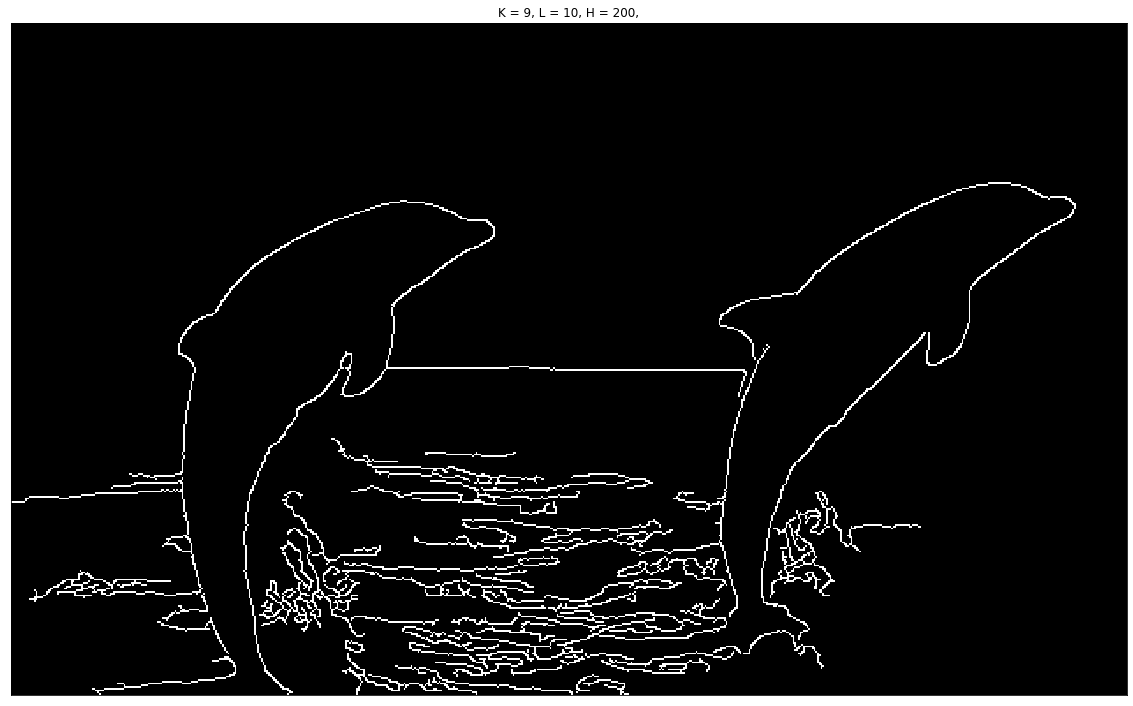

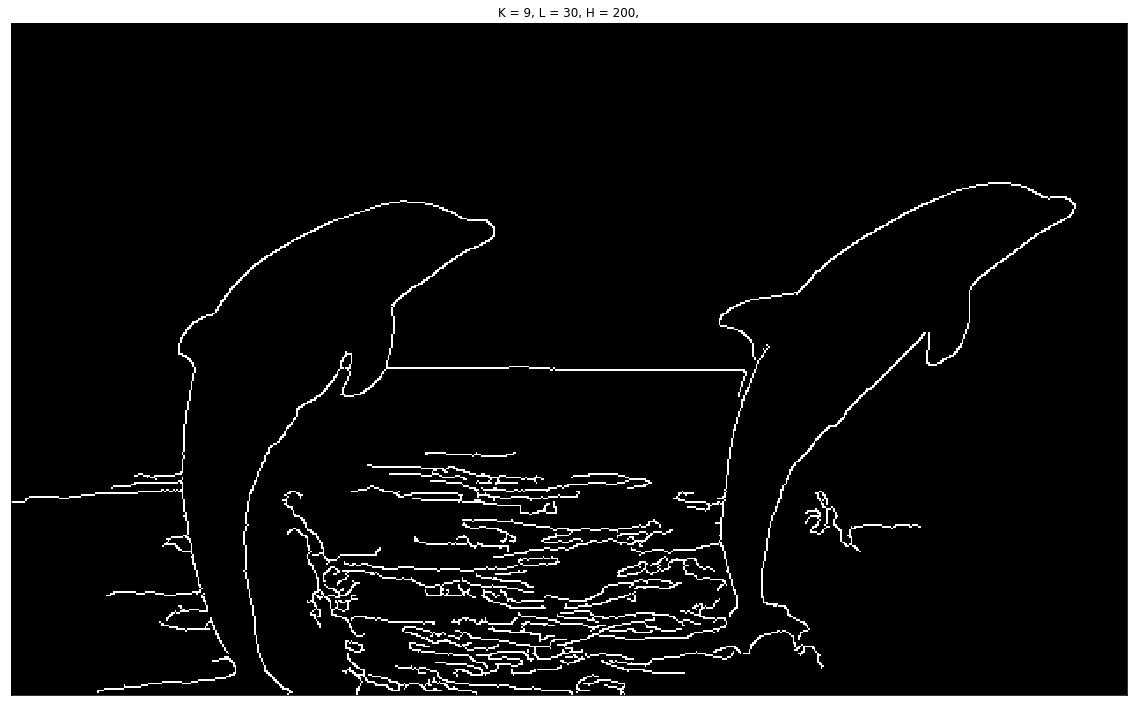

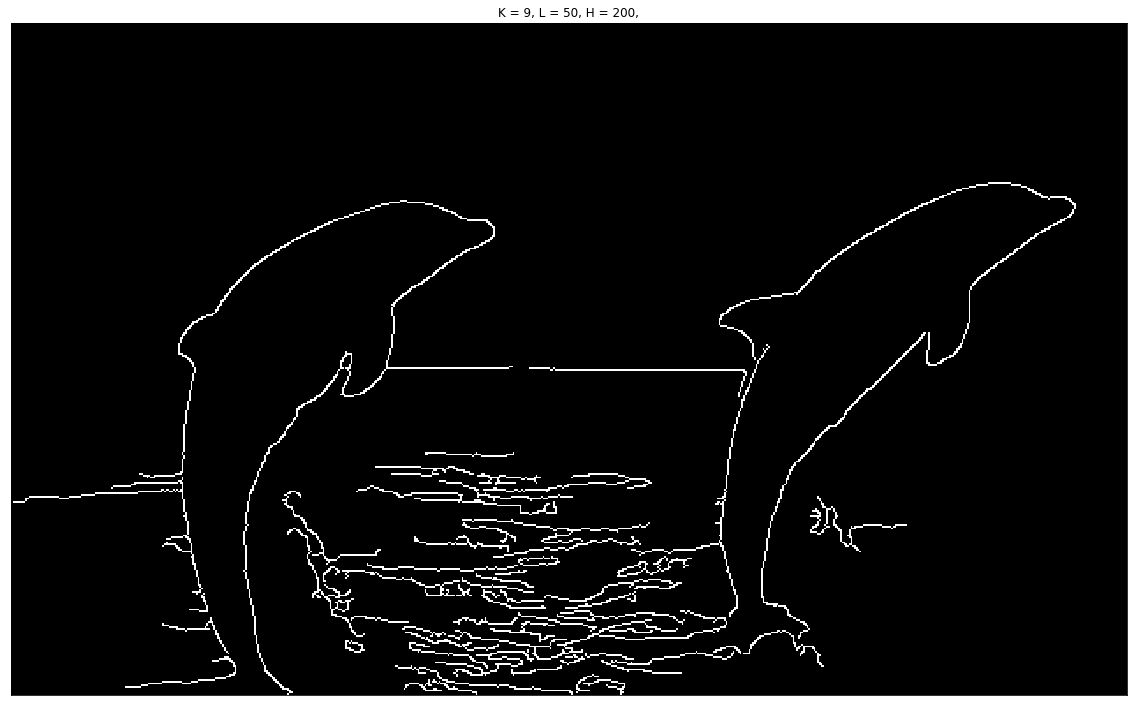

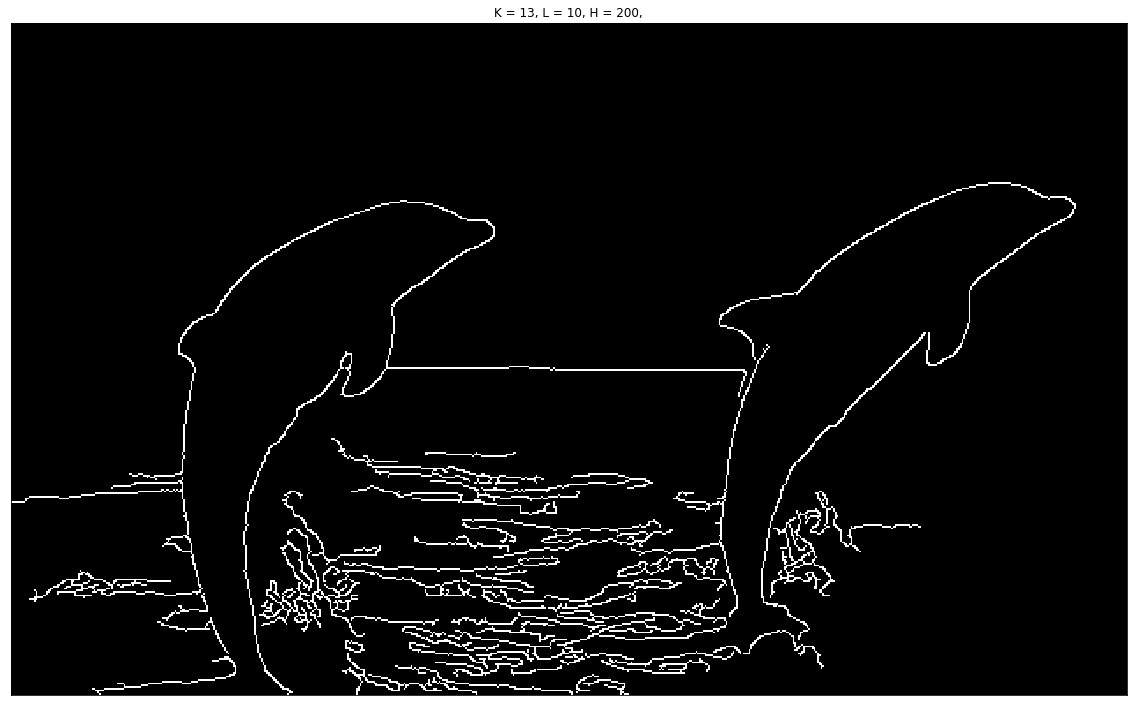

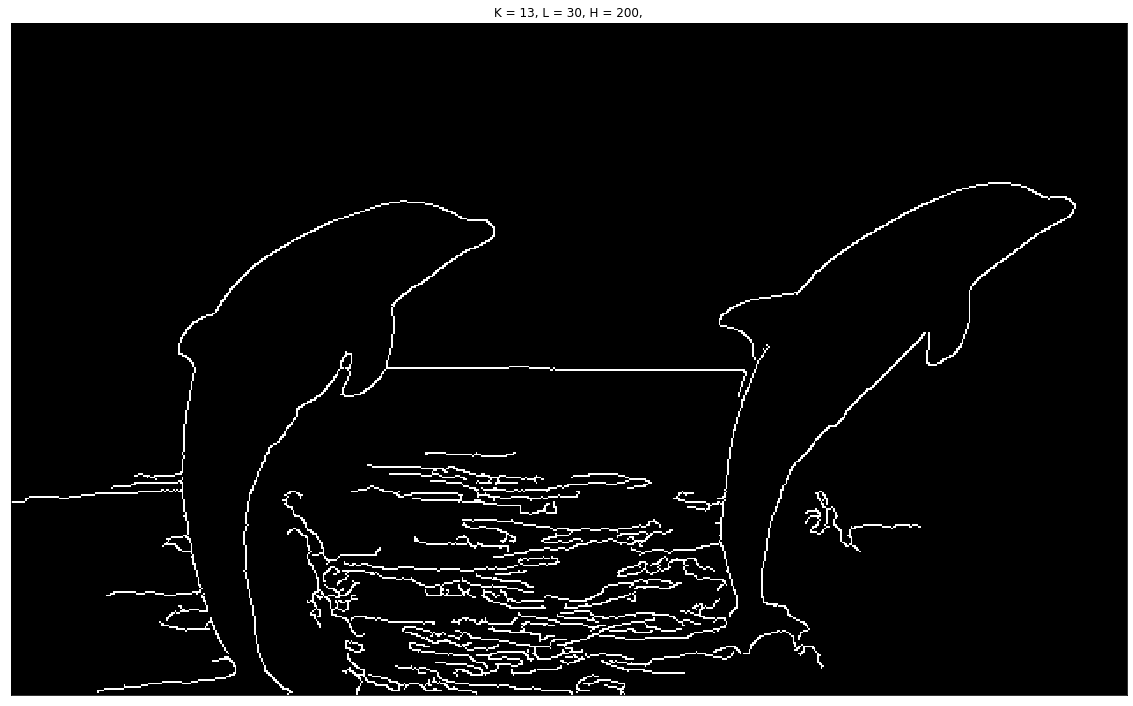

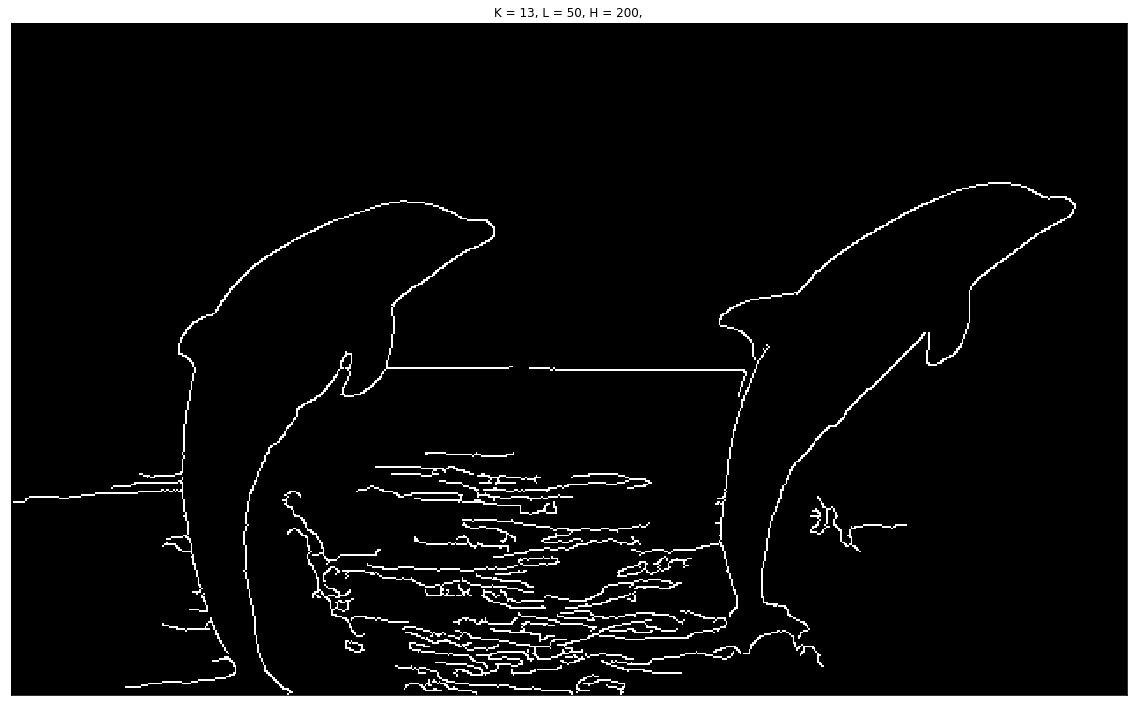

In [27]:
img_ce = cv2.imread(path +'dolphin.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img_ce, cmap='gray')

Ks = np.array([5,9,13])
Ls = np.array([10,30,50])
Hs = np.array([100,150,200])

#subplot_ind = 1 # 27 images in total


for h in Hs:
    for k in Ks:
        for l in Ls:
            
            img_gauss_ce = cv2.GaussianBlur(img_ce, (k, k), np.sqrt(2)) # filter the image with gaussian filter
            img_edge_cv_ce = cv2.Canny(img_gauss_ce, l, h)
            
            plt.figure(figsize=(20,20))
            plt.imshow(img_edge_cv_ce,cmap="gray"), plt.title(str.format("K = {}, L = {}, H = {},", k,l,h)), plt.xticks([]), plt.yticks([])
            #subplot_ind = subplot_ind +1

## 4.3 Comment on hyper-parameters K,L and U

After loading all 27 combinations of hyper-parameters K (Gaussian Smoothing Kernel size), L (the Lower Thresholds used for Hysteresis) and U (the Higher Thresholds used for Hysteresis, in the code refered as H), the observation about 3 parameters are listed as follows:



1. U. The parameter U controlls the number of the pixel which can be considered as "strong" points in the hysteresis. When the value of U is increased from 100 to 200, less point can pass the threshold thus less strong points exist for the weak points to attach. In this case in the final outcome, less edges are shown. The reduction of edges mainly happens at the water regions since the water winkles are not strong enough for larger threshold value.
<br>

2. K is the kernel size of guassain smoothing. The larger the K, the more significant the gaussian smoothing effect, thus the more "blurred" the image is for later operation. The weaker pattern on the image will become less distinguishable and will not be considered as strong or weak points during hysteresis. After experimenting parameter k with fixed L and U, it is observed that when **L and U is large**, the impact of K will also be **more significant**, mainly in the reduced edges in water winkle region.
<br>

3. L. Similar with U, the larger L gets the less amount of edge is shown in the final output. L controls the lower threshold thus the **larger L gets, the less pixel can be labelled as weak point to participate in Hysteresis**. Scaling up L also results in suppression of the water winkle edges.
<br>

Overall, All three parameters has a similar pattern, the larger they get, the less amount of edge will shown in the final result.


## 4.4 Comfigure K,L and U for only dolphins

(<matplotlib.image.AxesImage at 0x1d6e1da04c8>,
 Text(0.5, 1.0, 'dolphin edge with parameters: K = 11, L = 153, H = 388,'))

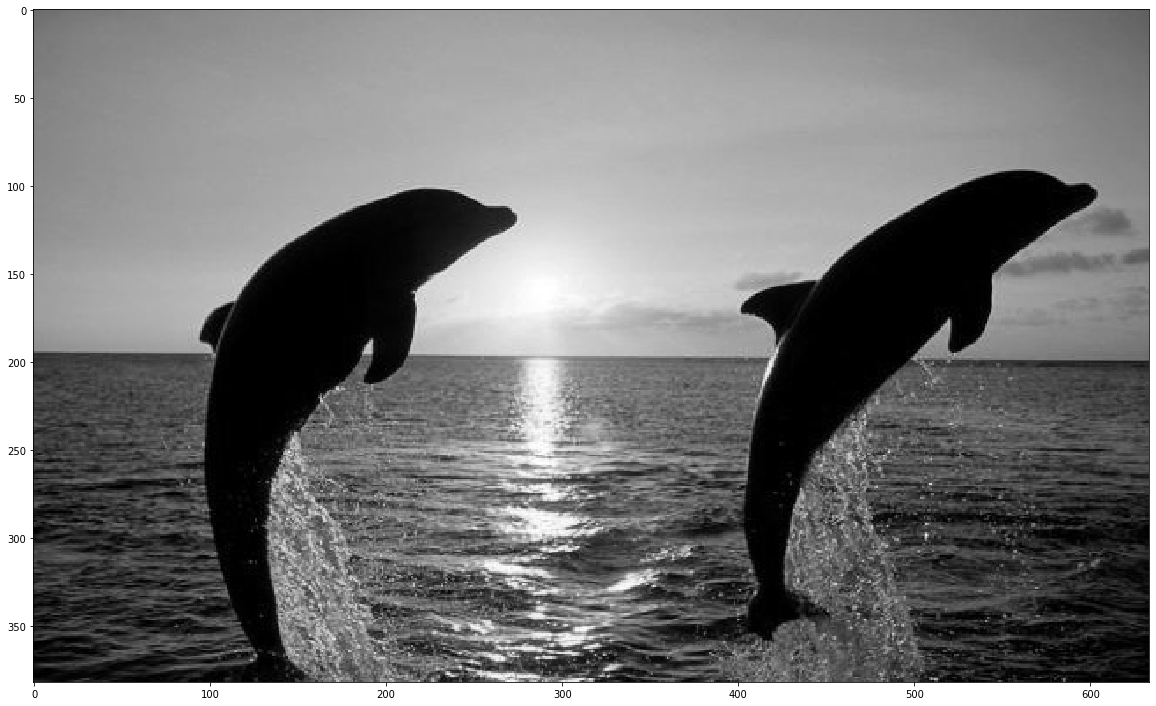

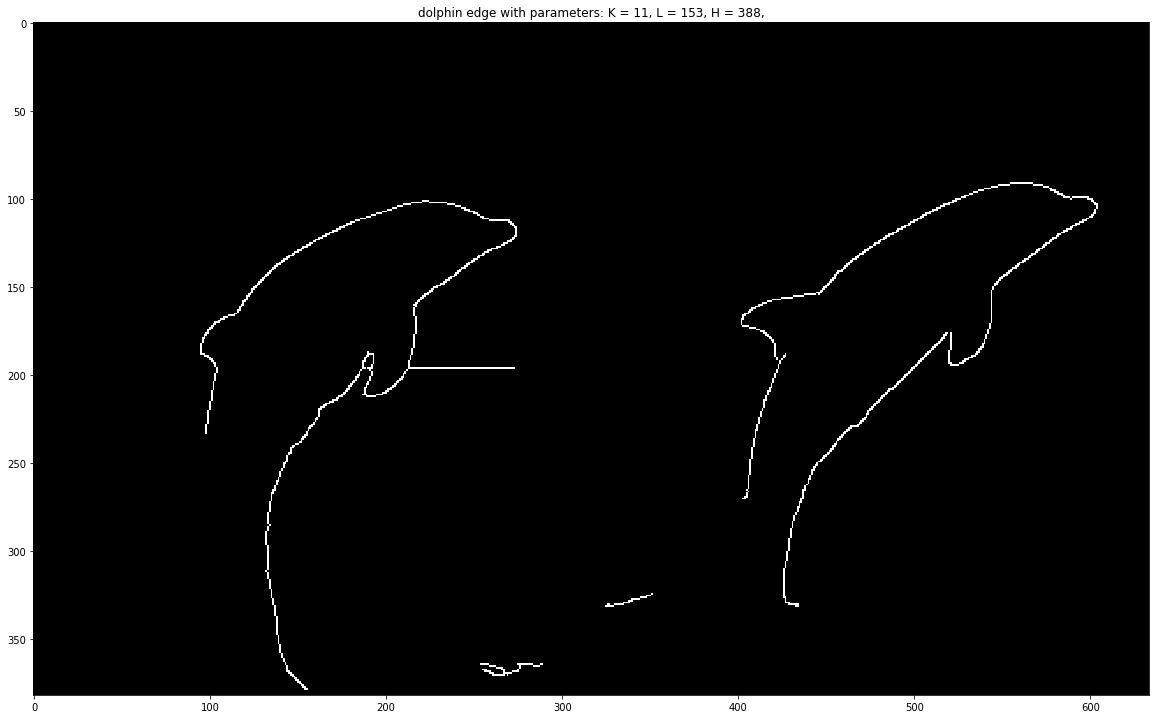

In [28]:
img_ce = cv2.imread(path +'dolphin.jpg',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(20,20))
plt.imshow(img_ce, cmap='gray')

 
l = 153
h = 388
k = 11
img_gauss_ce = cv2.GaussianBlur(img_ce, (k, k), np.sqrt(2)) # filter the image with gaussian filter
img_edge_cv_ce = cv2.Canny(img_gauss_ce, l, h)
plt.figure(figsize=(20,20))
plt.imshow(img_edge_cv_ce,cmap="gray"), plt.title("dolphin edge with parameters: "+str.format("K = {}, L = {}, H = {},", k,l,h))


# 5 Harris Corner Detection

In [29]:
# this block contains wrapper functions for each step of Harris Corner Detection

# step 1: Find xy gradients (there is an option of blur first using box filter)
def img_blur_gradient(img, need_blur = True):
    
    if need_blur:
        blur_kernel = np.array(([1/16,2/16,1/16],[2/16,1/4,2/16],[1/16,2/16,1/16]),np.float32)
    else :
        # need_blur = false. thus no blur. This kernel does nothing
        blur_kernel = np.array(([0,0,0],[0,1,0],[0,0,0]),np.float32)
        
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    
    img_blur = cv2.filter2D(img, cv2.CV_64F, blur_kernel)
    Ix = cv2.filter2D(img_blur, cv2.CV_64F, sobel_x)
    Iy = cv2.filter2D(img_blur, cv2.CV_64F, sobel_y)
    
    return Ix, Iy


# step 2: Find square of gradients, essentially a matrix elemental-wise square (or multiplication)
def square_of_gradient(Ix, Iy):
    Ix2 = Ix**2
    Iy2 = Iy**2
    IxIy = Ix*Iy
    return Ix2, Iy2, IxIy

# step 3: Filter the gradients
# first create gaussian kernel then apply gaussian blur on each squared gradient
def gaussian_g( Ix2, Iy2, IxIy, gaussian_kernel_size = 5, sigma = np.sqrt(2)):
    side_length = (int)(gaussian_kernel_size//2)
    # returning a square from -2 to +2 if size =5, thus 5*5 square kernel
    # Generate[-2-2-2-2-2] and its transpose
    #         [-1-1-1-1-1]
    #         [0 0 0 0 0]
    #         [1 1 1 1 1]
    #         [2 2 2 2 2]
    x, y = np.mgrid[-side_length:side_length+1, -side_length:side_length+1]
    
    x_g = (x*x + y*y) / (2* sigma*sigma)
    k = np.exp(-x_g) / (2*np.pi*sigma*sigma)
    
    gIx2 = cv2.filter2D(Ix2, cv2.CV_64F, k)
    gIy2 = cv2.filter2D(Iy2, cv2.CV_64F, k)
    gIxIy = cv2.filter2D(IxIy, cv2.CV_64F, k)
    
    return gIx2,gIy2,gIxIy
    
# step 4: Cornerness Function
# Faster approximation of eigenvalue
def Cornerness_Function (gIx2,gIy2,gIxIy, k =0.05):
    return gIx2*gIy2 - gIxIy**2 - k*(gIx2+gIy2)**2

# step 5: Non maximum suppression
# search the neighbourhood of a certain pixel and suppress the pixel if there is a larger value in the heighbourhood
# n_size defines how larger the neighbourhood is.
def n_max_suppression(corner_img,n_size, max_t = 255):
    X,Y = corner_img.shape
    Z = np.zeros((X,Y))
    
    for i in range(n_size,X-n_size): 
        for j in range(n_size,Y-n_size): 
            # defines a neighbourhood to search for maximum with size: (2*n_size + 1)
            q = corner_img[i-n_size: i+n_size, j-n_size:j+n_size].max()

            # if pixel magnitude is higher than all its neighbours than keep     
            if (corner_img[i,j] >= q):
                Z[i,j] = corner_img[i,j]
            # otherwise make its value to 0
            else:
                Z[i,j] = 0
    
    return Z

# final wrapper
def my_harris_function(img, n_size, need_blur = True):
    # step 1
    x,y = x,y = img_blur_gradient(img);
    # step 2
    Ix2, Iy2, IxIy = square_of_gradient(x,y)
    # step 3 (can configure kernel size and gaussian sugma here)
    gIx2, gIy2, gIxIy = gaussian_g(Ix2, Iy2, IxIy)
    # step 4 and 5
    corners = n_max_suppression(Cornerness_Function (gIx2,gIy2,gIxIy),n_size )
    return corners

## 5.1 Applying Harris Corner Detection on Image 'CheckerBoard'

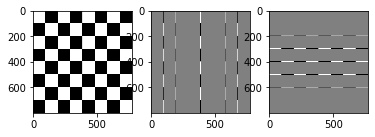

In [30]:
# read original image
img5 = cv2.imread(path +'checkerboard.png',cv2.IMREAD_GRAYSCALE)
,plt.subplot(131),
plt.imshow(img5, cmap='gray')

# step1: Find xy gradients (there is an option of blur first using box filter)
x,y = img_blur_gradient(img5)
plt.subplot(132),
plt.imshow(x, cmap='gray')
plt.subplot(133),
plt.imshow(y, cmap='gray')


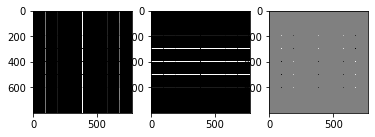

In [31]:
# step 2: Find square of gradients, essentially a matrix elemental-wise square (or multiplication)
Ix2, Iy2, IxIy = square_of_gradient(x,y)
plt.subplot(131),
plt.imshow(Ix2, cmap='gray')
plt.subplot(132),
plt.imshow(Iy2, cmap='gray')
plt.subplot(133),
plt.imshow(IxIy, cmap='gray')

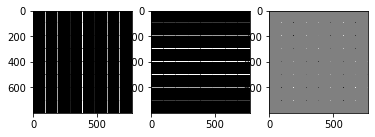

In [32]:
# step 3: Filter the gradients
gIx2, gIy2, gIxIy = gaussian_g(Ix2, Iy2, IxIy)
plt.subplot(131),
plt.imshow(gIx2, cmap='gray')
plt.subplot(132),
plt.imshow(gIy2, cmap='gray')
plt.subplot(133),
plt.imshow(gIxIy, cmap='gray')

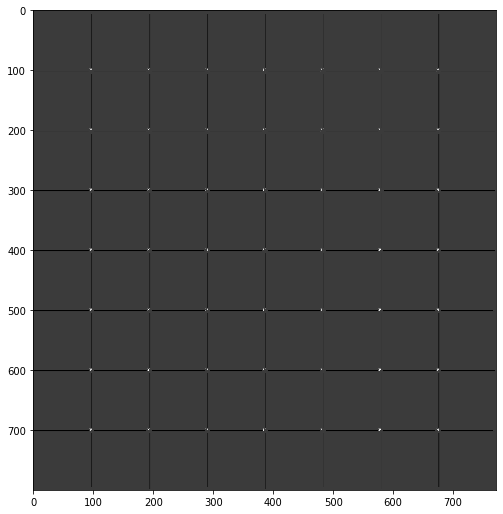

In [33]:
# Step 4 and 5
# Non max suppression, neighbour size set to 1
corners = n_max_suppression(Cornerness_Function (gIx2,gIy2,gIxIy),1)
 
plt.figure(figsize=(30,30)),plt.subplot(311),
plt.imshow(corners, cmap='gray')



After Normalization
-2.666809675127635e-17
2.0
threshold 1.6


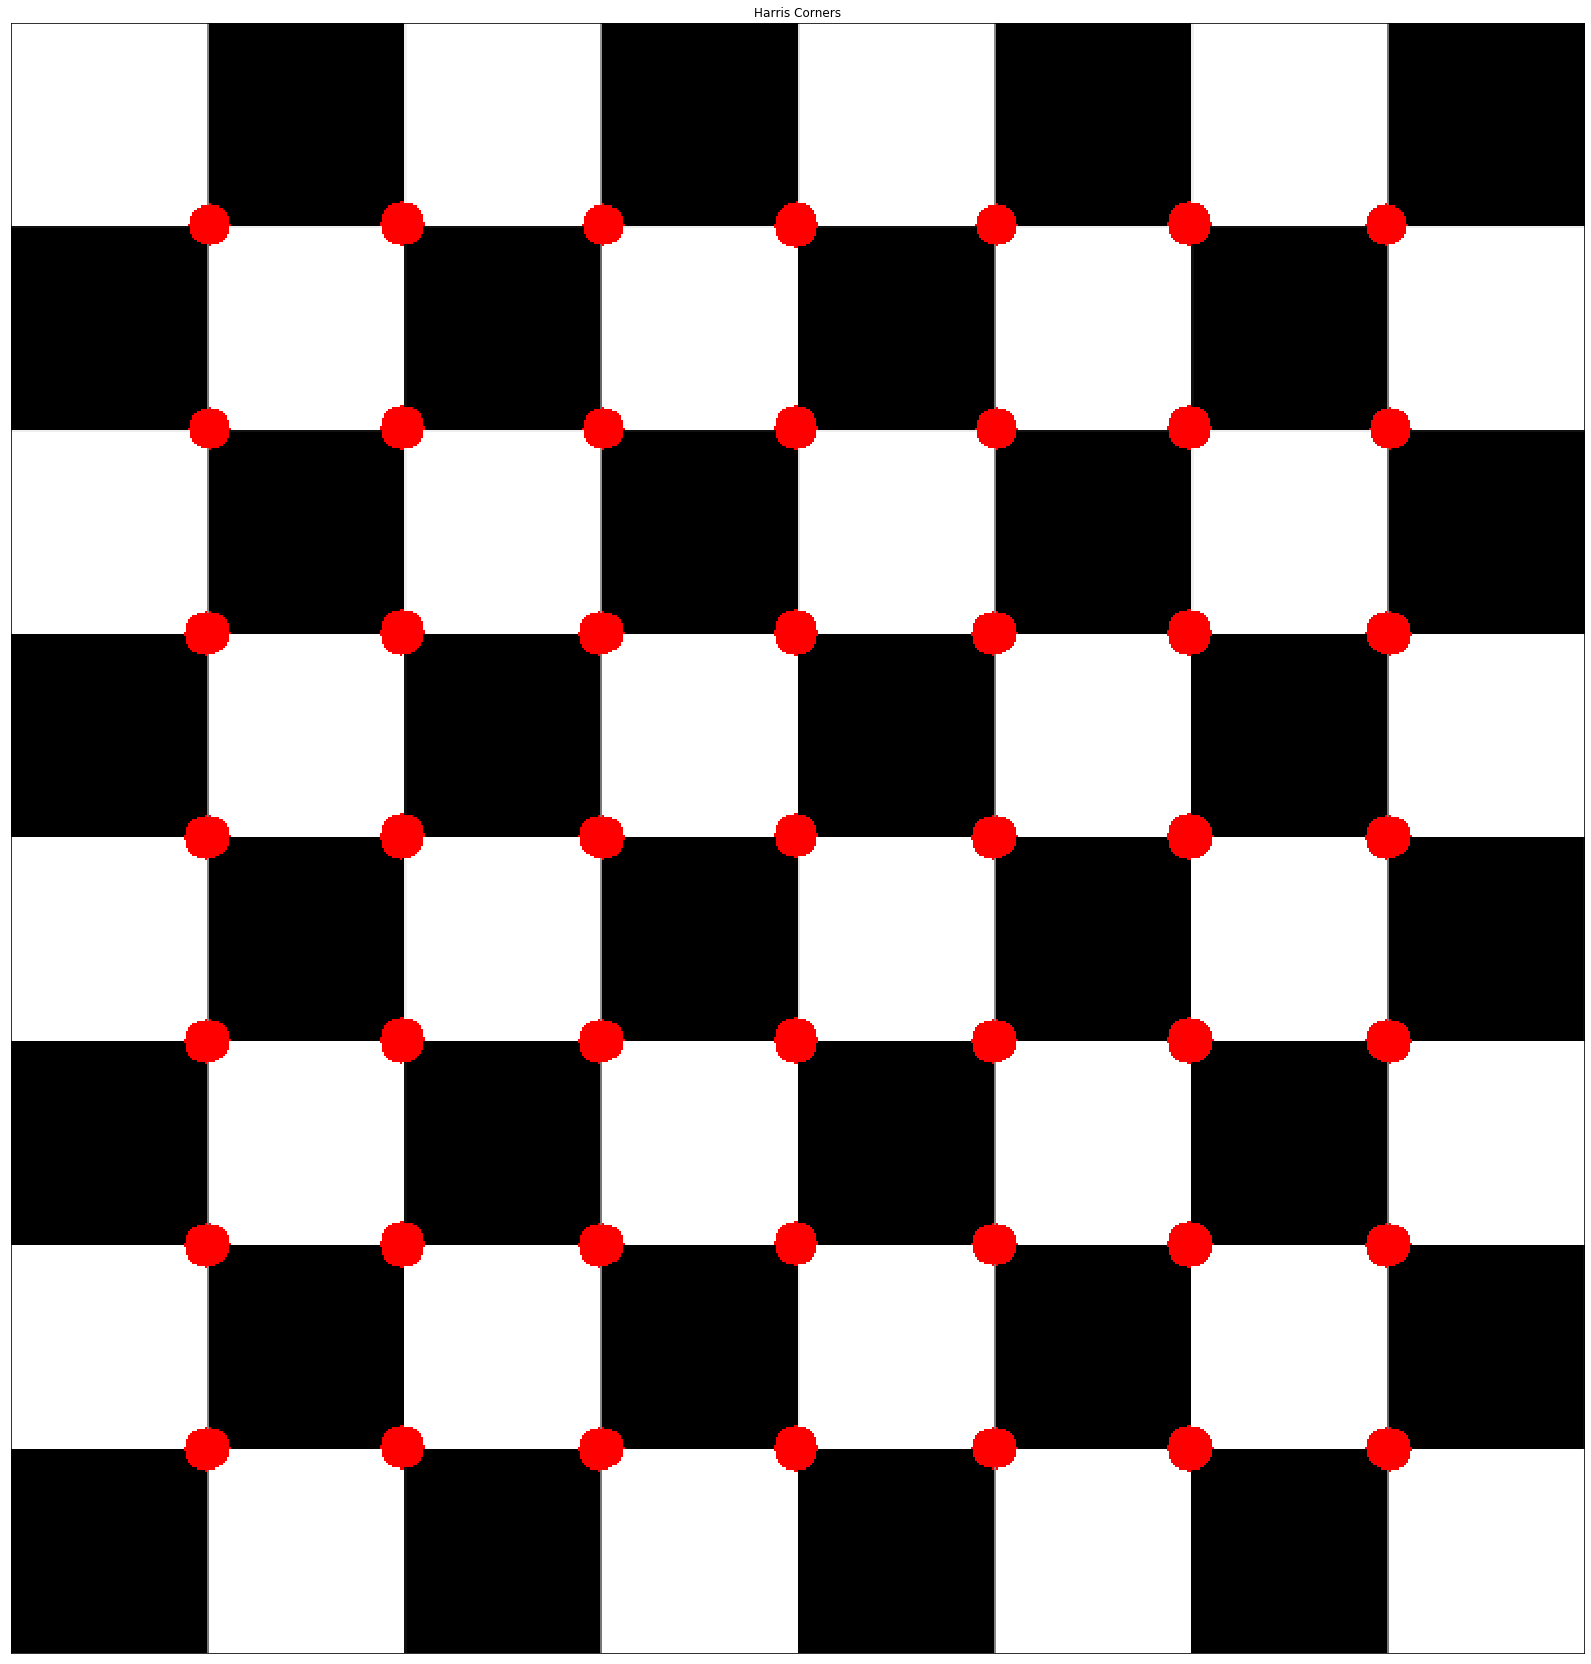

In [34]:
img_disp = cv2.imread(path +'checkerboard.png')

# credit: ECSE 415 Tutorial 2
# This method locates strong corner points from Harris corner function
# and put red dots to visualize them
# can change threshold value by tweaking thres parameter
def find_corner_point(corners,img_disp, thres, dot_size = 10, normalization_max = 2):
    # normalize corner map [0,1]
    # cv2.normalize(src, dst, alpha, beta, norm_type)
    # min_I(dst(I)) = alpha, max_I(dst(I)) = beta
    cv2.normalize(corners, corners, 0, normalization_max, cv2.NORM_MINMAX)

    print("\n\nAfter Normalization")
    print(np.min(corners))
    print(np.max(corners))
    print("threshold", thres)



    # list all points higher than threshold
    loc = np.where(corners >= thres)
    # loop though points
    for pt in zip(*loc[::-1]):
        # draw filled circle on each point
        # cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]]) → None
        cv2.circle(img_disp, pt, dot_size, (255,0,0), -1)
    plt.figure(figsize=(30,30))
    plt.imshow(img_disp,cmap='gray')
    plt.title("Harris Corners"), plt.xticks([]), plt.yticks([])
    plt.show()

    
find_corner_point(corners,img_disp, 1.6)

*Observation**<br>
After performing non-maximun suppression with neighbour radius of 1 (n_size parameter in the code), aka comparing [i,j] with all its 8 neighbours in [i-1:i+1, j-1:j+1] (a 3 * 3 neighbourhood), the optimal threshold for distinguish corner point is **0.47<thres<1.60**. In this range, the result of the checker board corners is similar to the sample result, capturing all the corner points. <br>If the threshold is lower than 0.47, the result will be a pure-red image, meaning basically every point is distinguished as a corner and red circles are placed everywhere. If threshold is higher than 1.6, we start to lose certain corner points.<br>
<br>
An additional finding is that if we increase the neighbourhood size for non-maximum suppression, like using n_size = 2, more pixel are suppressed and only real corner points are kept. (n_size = 2 will result in comparing a pixel in [i-2:i+2, j-2:j+2], a 5 * 5 neighbourhood). We can see the suppressed image is way cleaner. the threshold range is also enlargered greatly, from 0.1 to 1.9. More details plz see demo below.



After Normalization
0.0
2.0
threshold 1.9


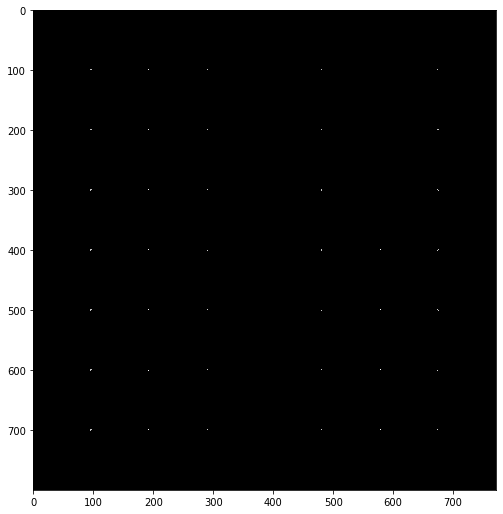

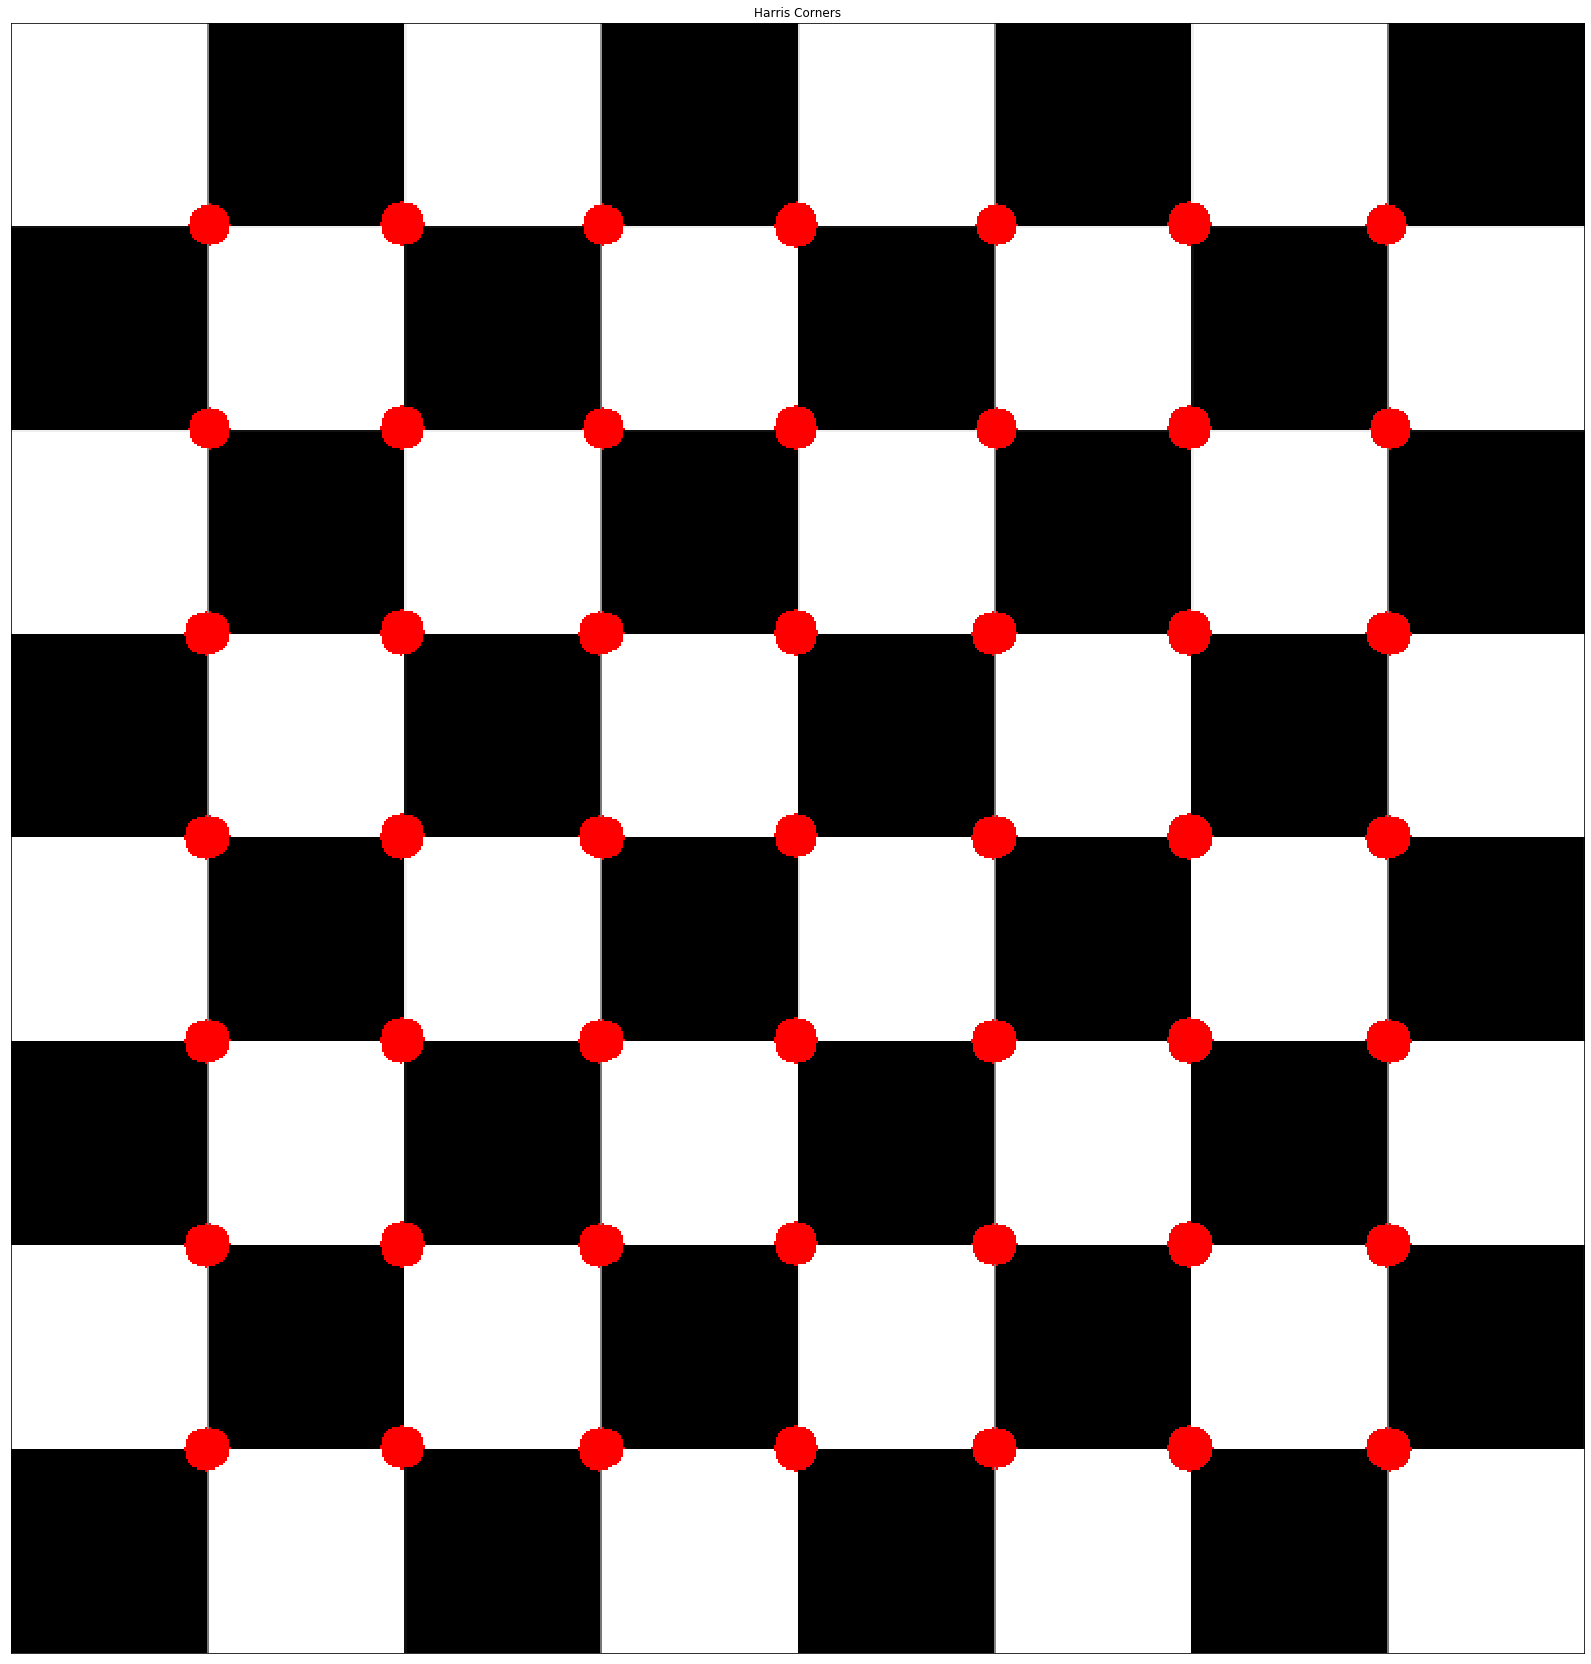



After Normalization
0.0
2.0
threshold 0.1


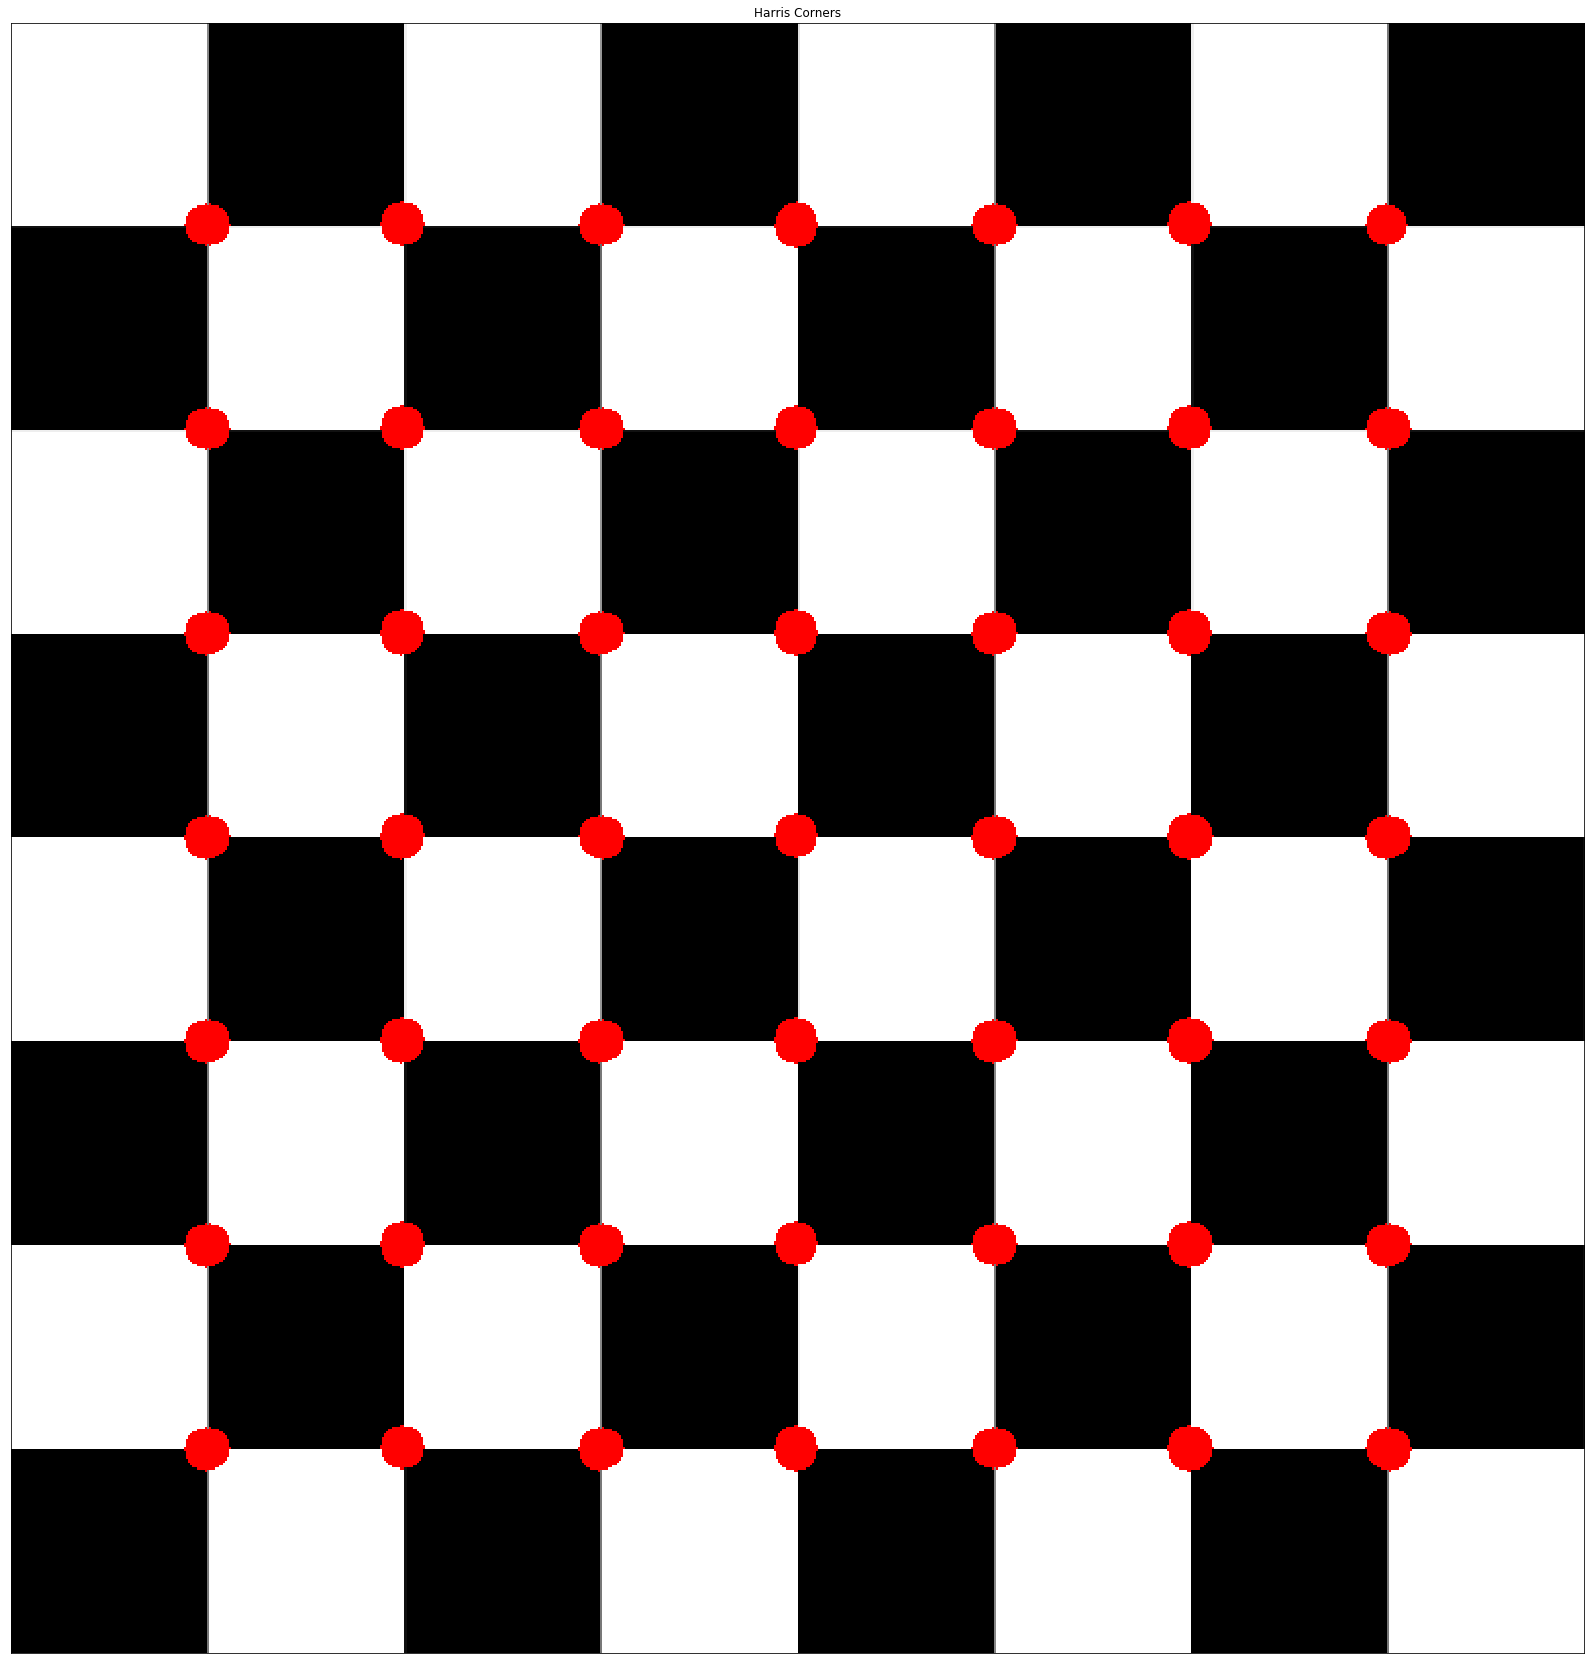

In [35]:
# Note: maximum is now defined from a 5*5 neighbourhood, [i-2:i+2, j-2:j+2]
corners_2 = n_max_suppression(Cornerness_Function (gIx2,gIy2,gIxIy),2)

plt.figure(figsize=(30,30)),plt.subplot(311),
plt.imshow(corners_2, cmap='gray')

find_corner_point(corners_2,img_disp, 1.9)
find_corner_point(corners_2,img_disp, 0.1)
# Even for a threshold up to 1.9 or low to 0.1, it still can find all corner points!

## 5.2 Harris corner finding on image "shapes"

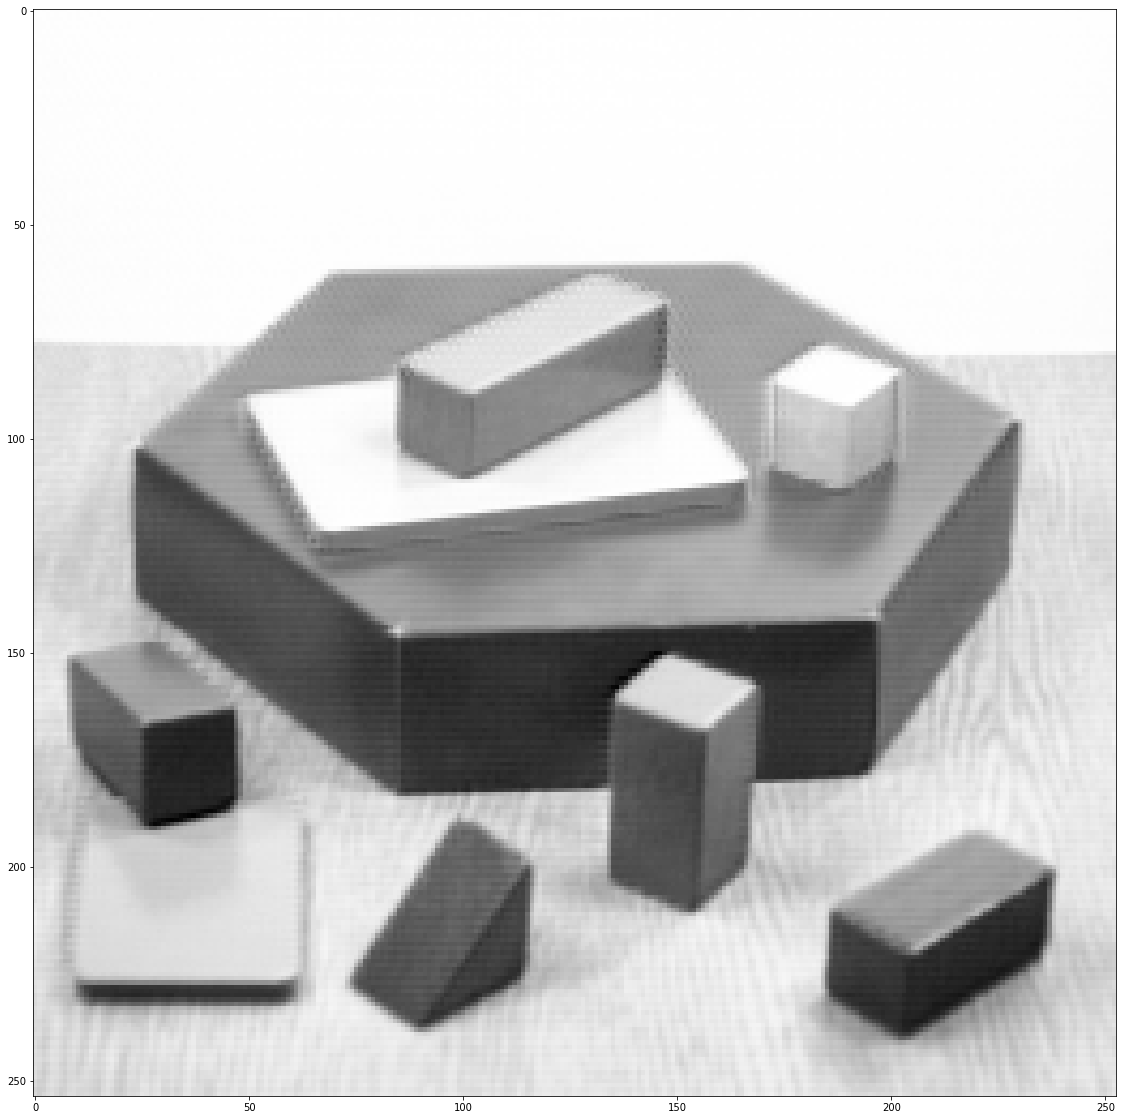

In [36]:
# read original image
img5_2 = cv2.imread(path +'shapes.png',cv2.IMREAD_GRAYSCALE)

img_disp_52 = cv2.imread(path +'shapes.png')

plt.figure(figsize=(20,20)),
plt.imshow(img5_2, cmap='gray')



After Normalization
1.526803566399498e-17
2.0
threshold 0.8


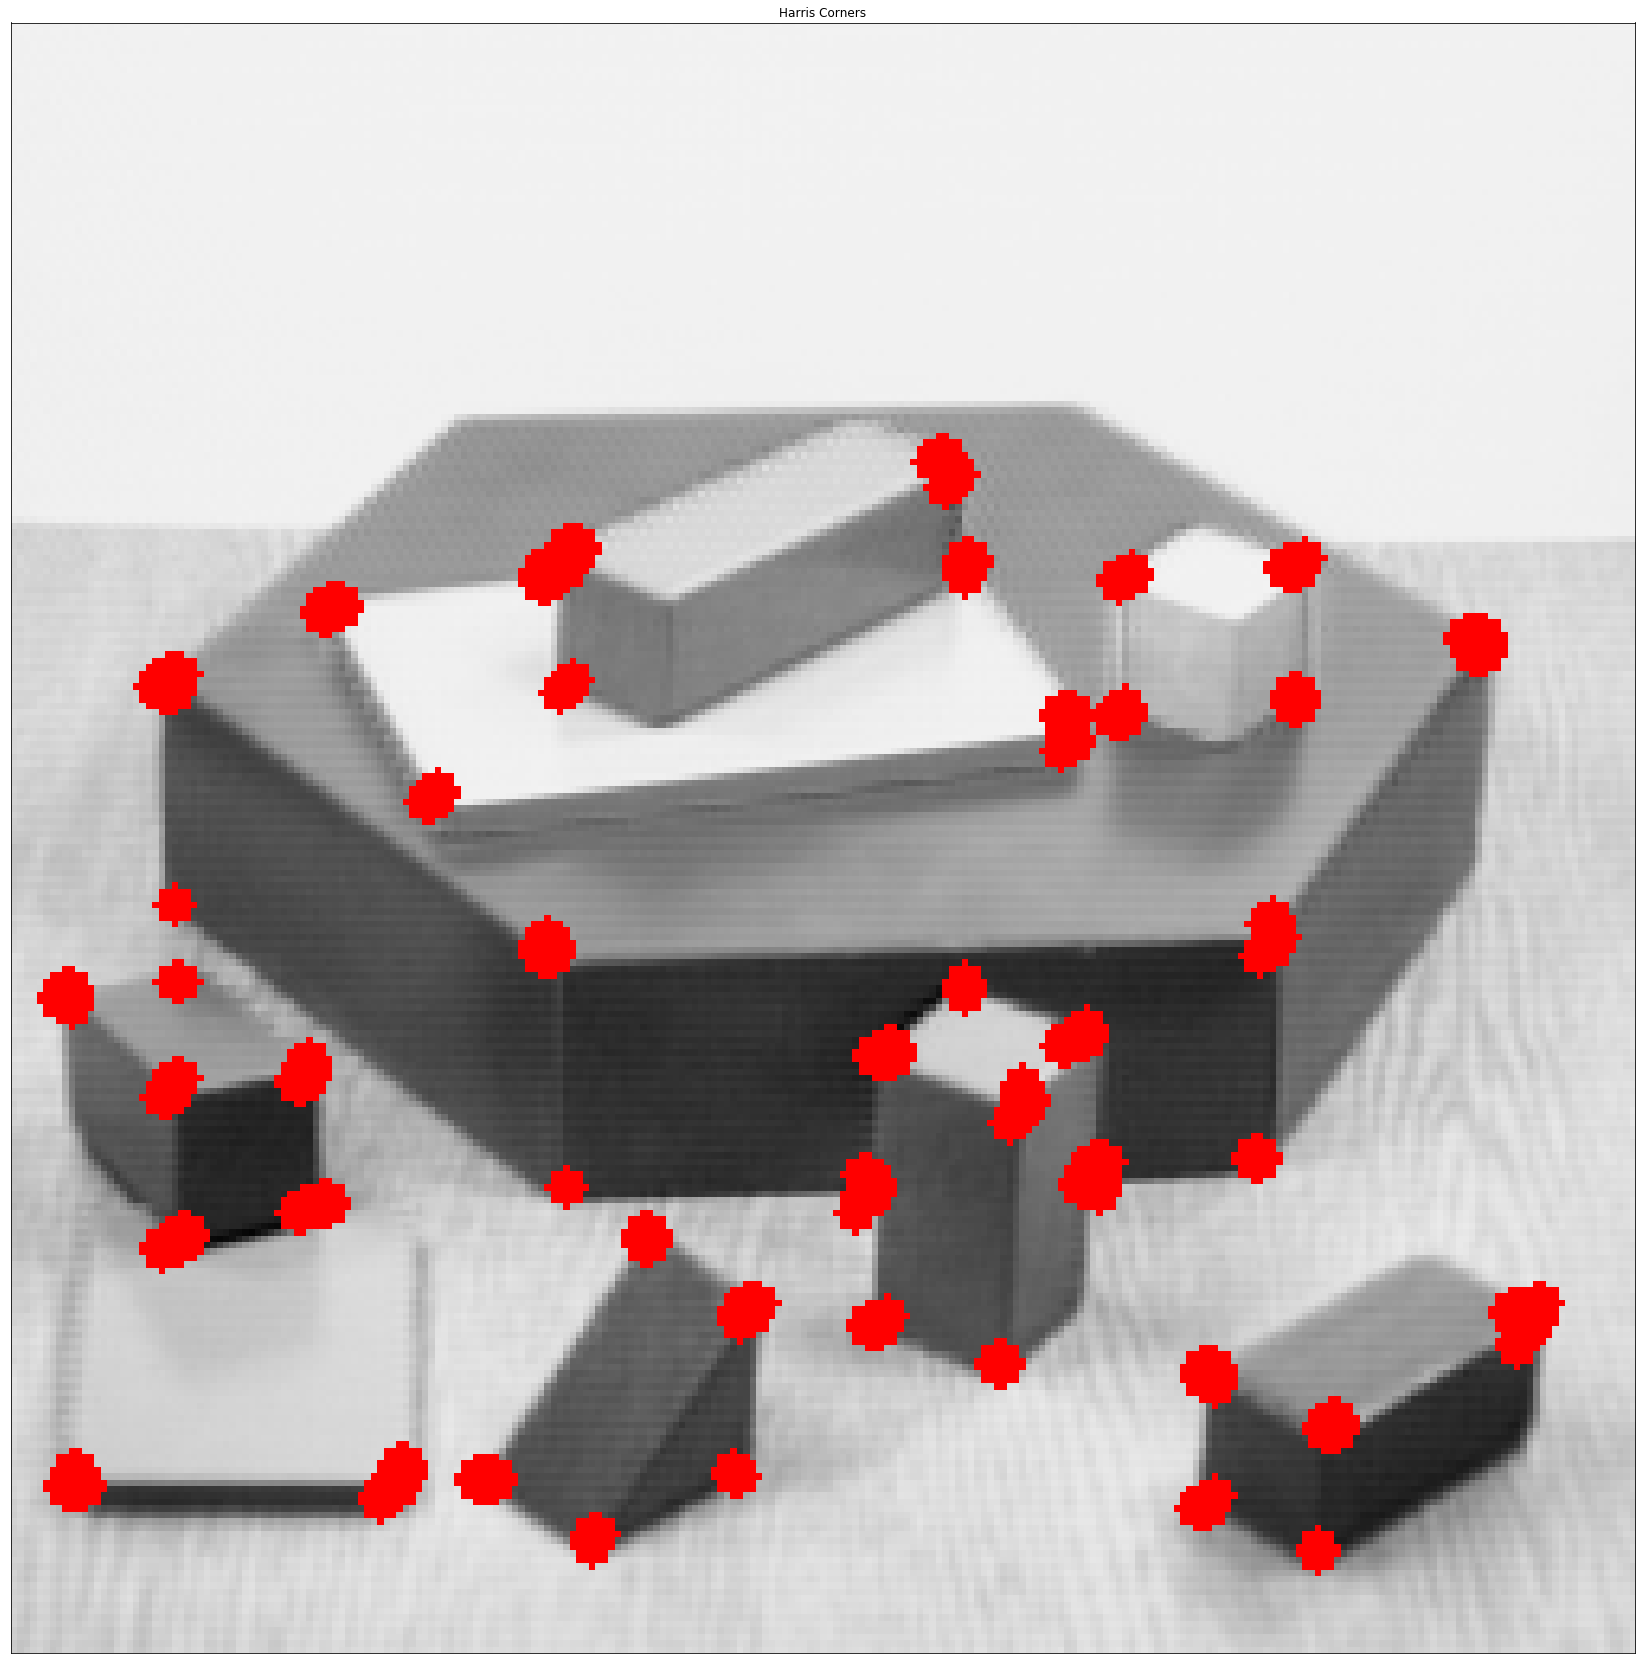

In [37]:
# threshold of 0.80
corner_shapeImg = my_harris_function(img5_2,1)
find_corner_point(corner_shapeImg,img_disp_52, 0.80, dot_size = 3)



After Normalization
1.526803566399498e-17
2.0
threshold 0.9


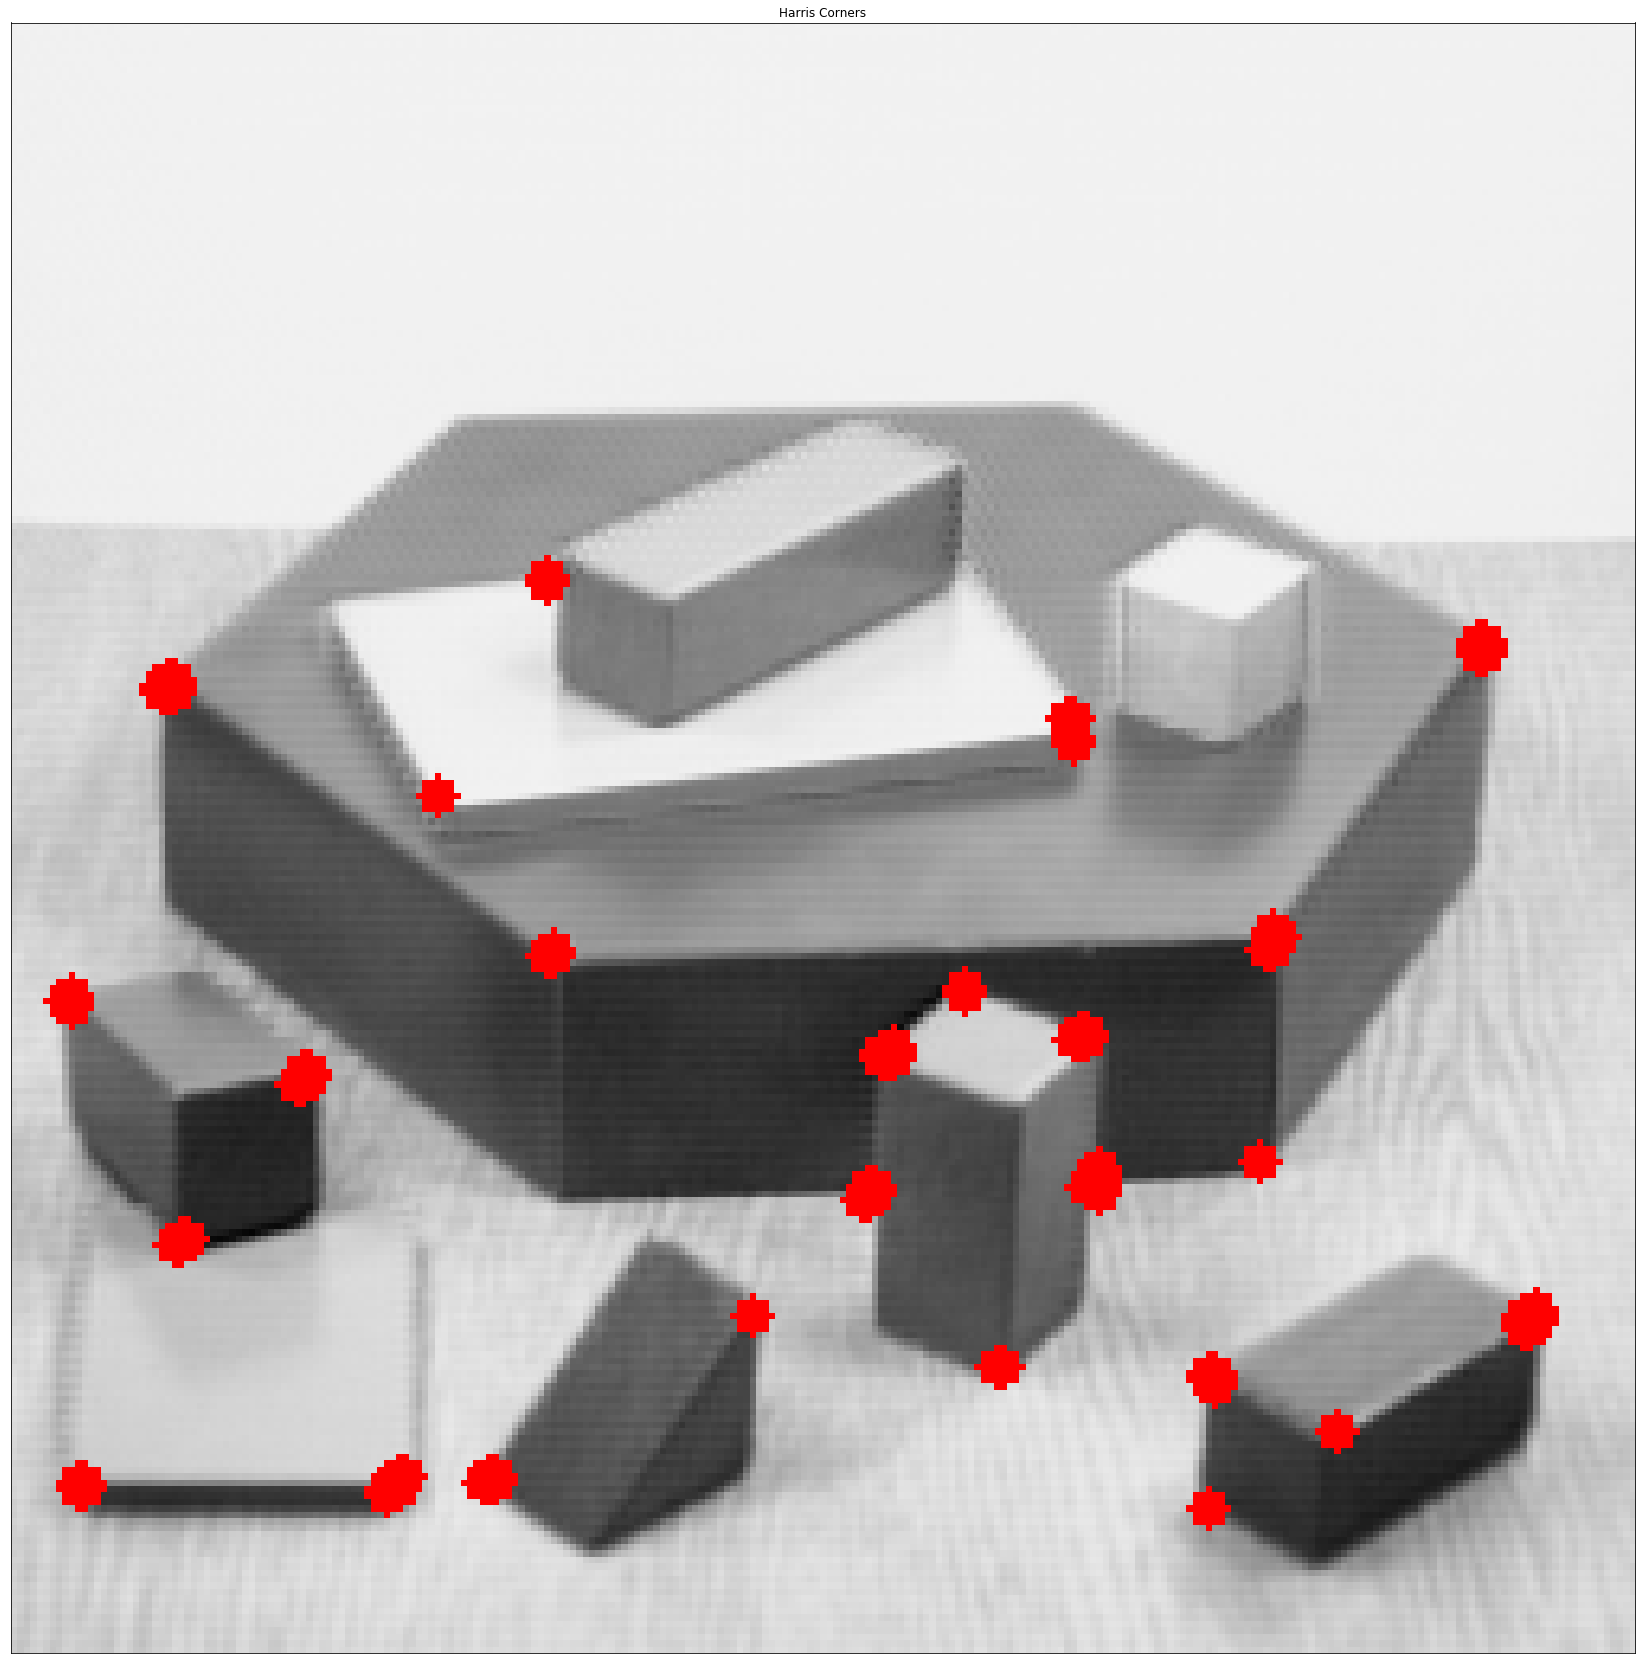

In [38]:
# threshold of 0.9
img5_2 = cv2.imread(path +'shapes.png',cv2.IMREAD_GRAYSCALE)
img_disp_52 = cv2.imread(path +'shapes.png')
corner_shapeImg = my_harris_function(img5_2,1)
find_corner_point(corner_shapeImg,img_disp_52, 0.90, dot_size = 3)



After Normalization
1.526803566399498e-17
2.0
threshold 0.792


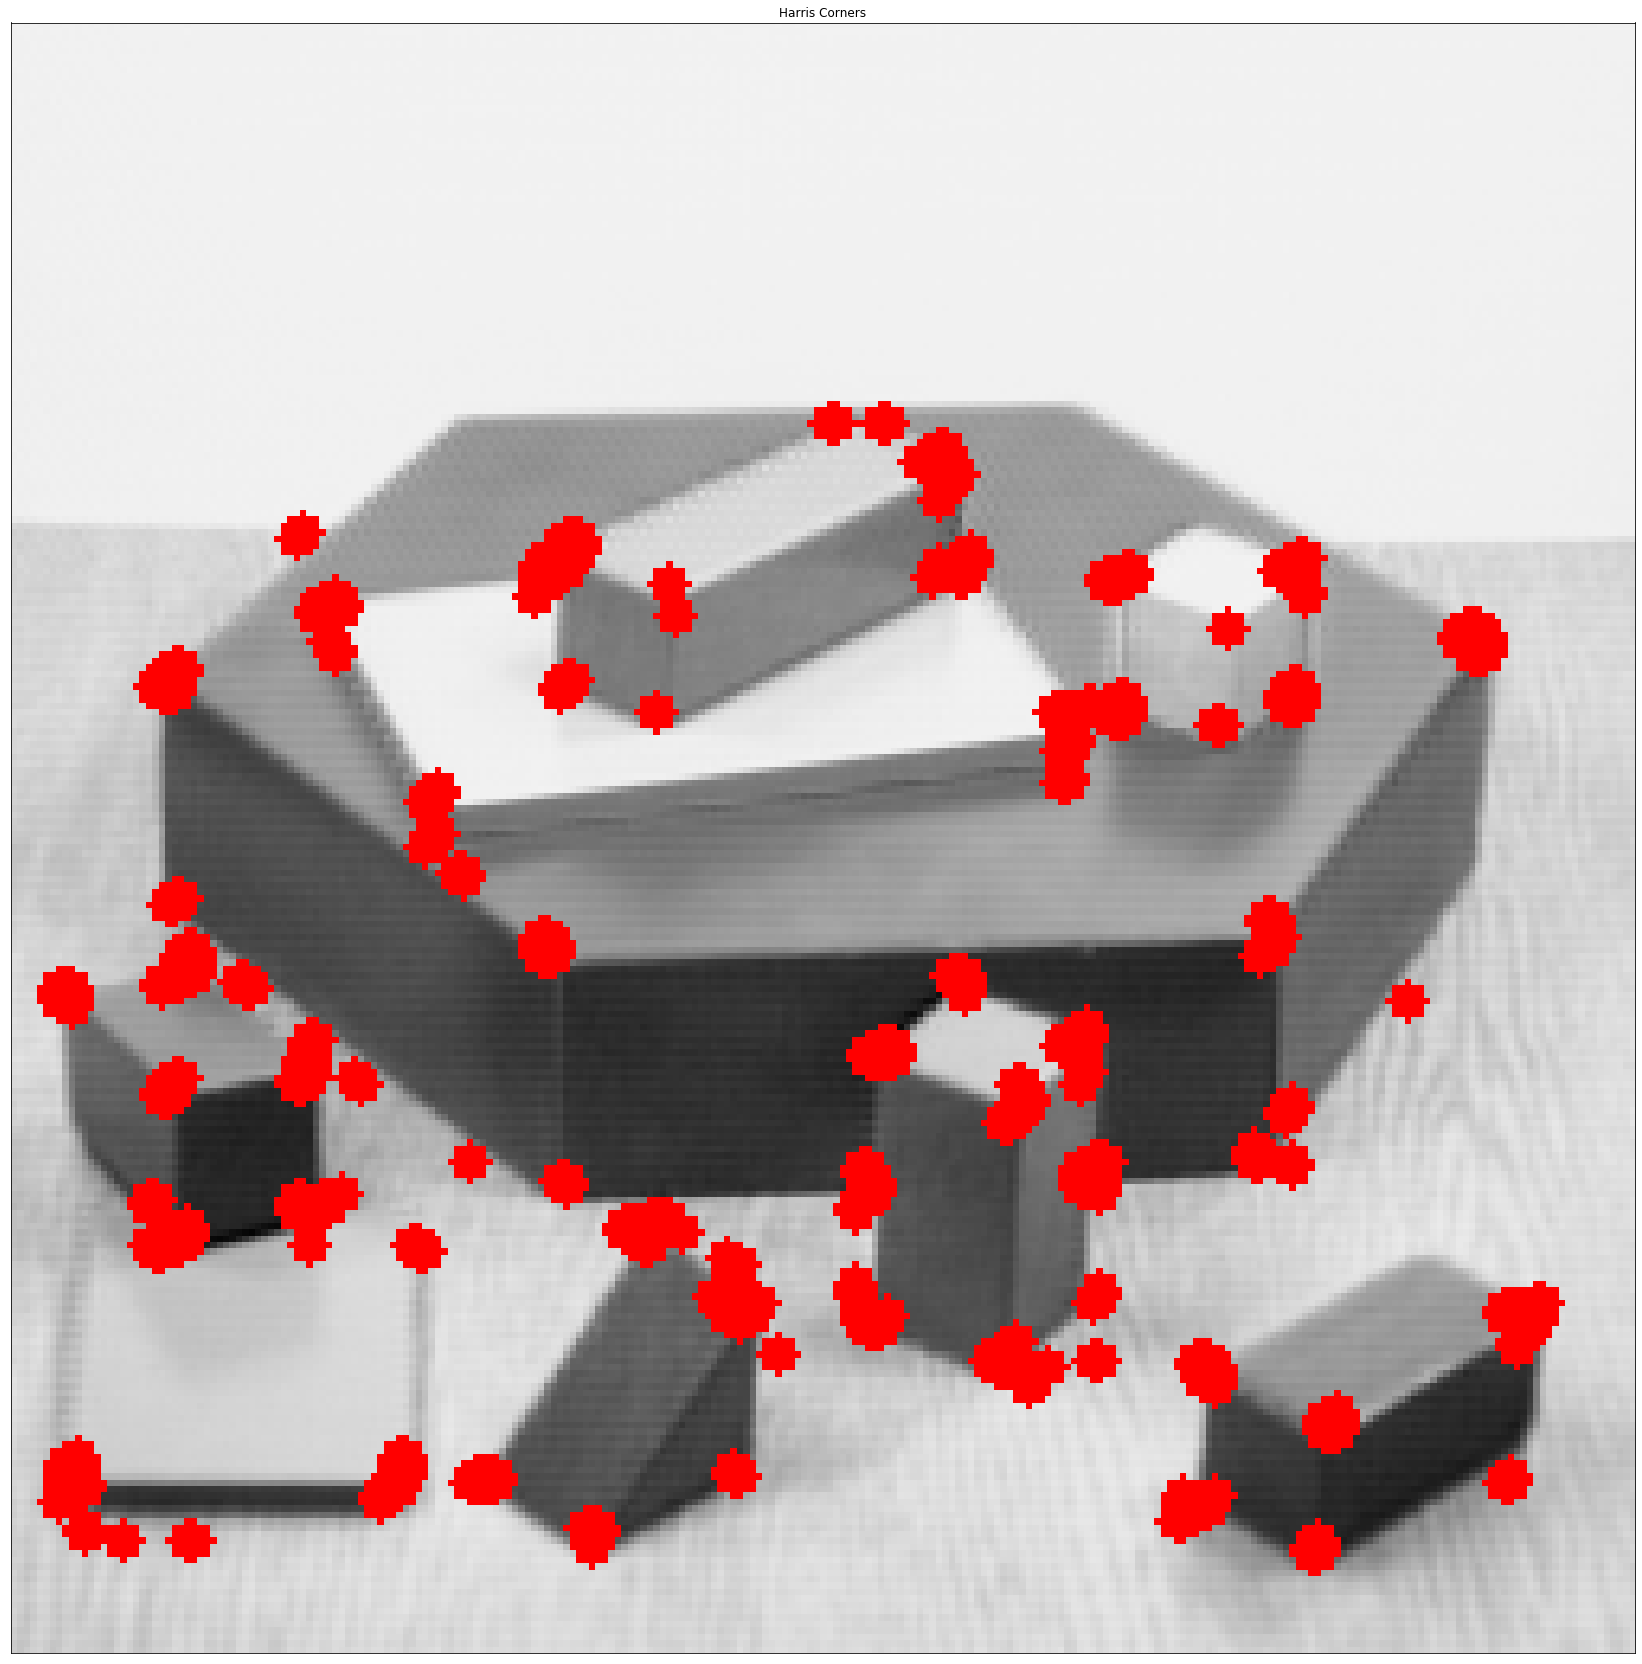

In [39]:
# threshold of 0.792
img5_2 = cv2.imread(path +'shapes.png',cv2.IMREAD_GRAYSCALE)
img_disp_52 = cv2.imread(path +'shapes.png')
corner_shapeImg = my_harris_function(img5_2,1)
find_corner_point(corner_shapeImg,img_disp_52, 0.792, dot_size = 3)

**Observation**<br>
After trying out thresholds of values 0.792, 0.8 and 0.9, it is found that for image "shapes", the desired threshold is somewhere **around 0.8, probably 0.81 to 0.83 would be favorable.** When threshold falls below 0.8, a lot of fake cornor points were captured as noise. When threshold = 0.9, we start to lose certain cornor points.

## 5.3 face image from Google Face thumbnail collection
#### Trying with threshold value



After Normalization
1.7481367272907348e-17
2.0
threshold 0.38


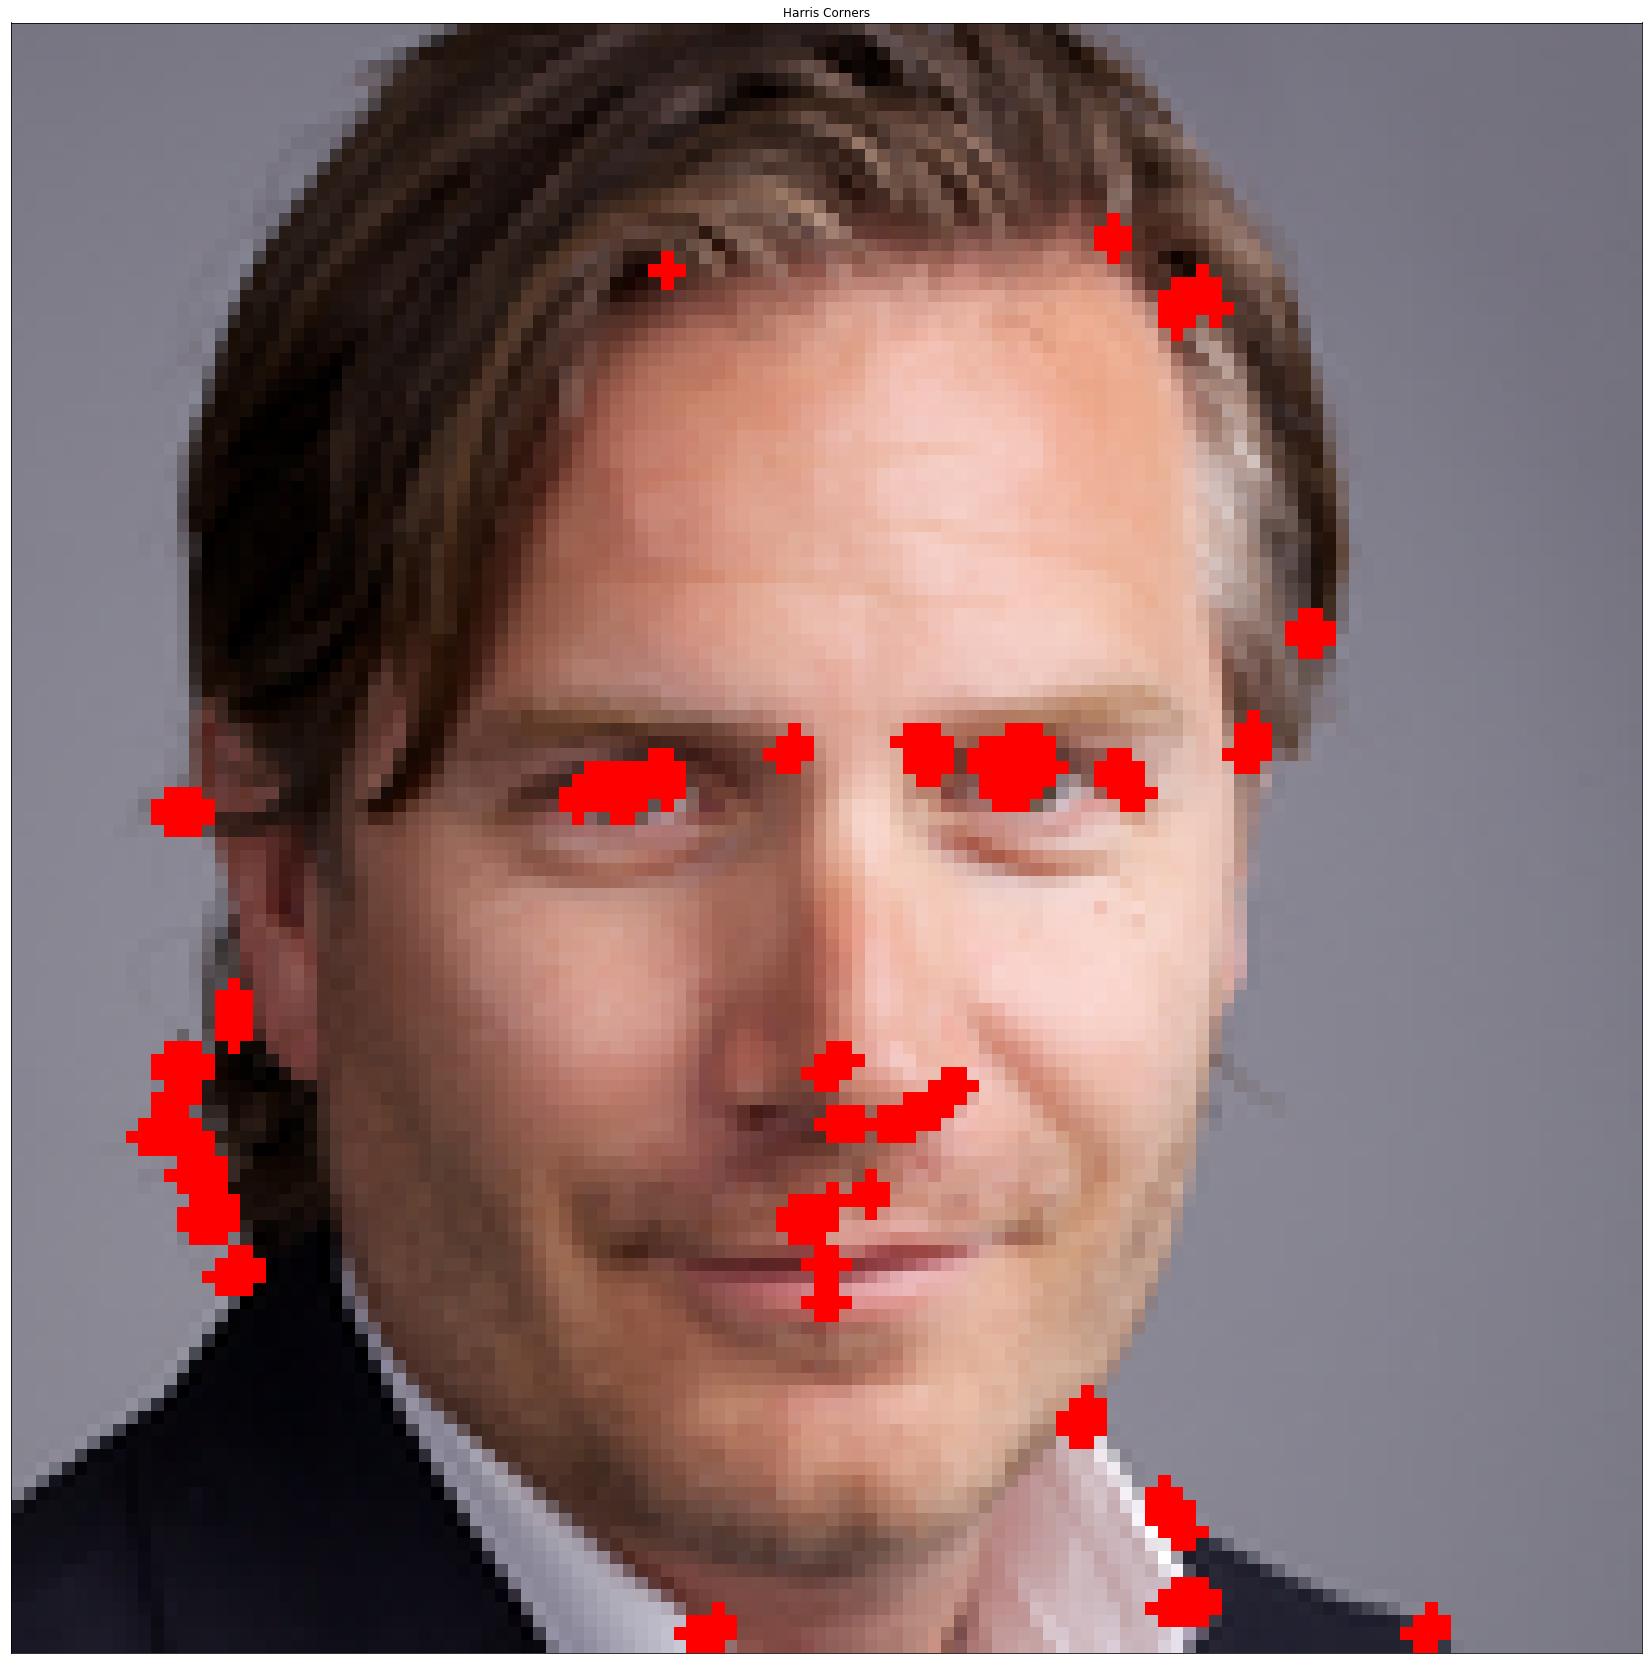

In [40]:
img5_google = cv2.imread(path +'01098.png',cv2.IMREAD_GRAYSCALE)
img_disp_5_goolge = cv2.imread(path +'01098.png')
img_disp_5_goolge = cv2.cvtColor(img_disp_5_goolge, cv2.COLOR_BGR2RGB)



# trying threshold 0.38
corner_shapeImg = my_harris_function(img5_google,1)
find_corner_point(corner_shapeImg,img_disp_5_goolge, 0.38, dot_size = 1)



After Normalization
1.7481367272907348e-17
2.0
threshold 0.5


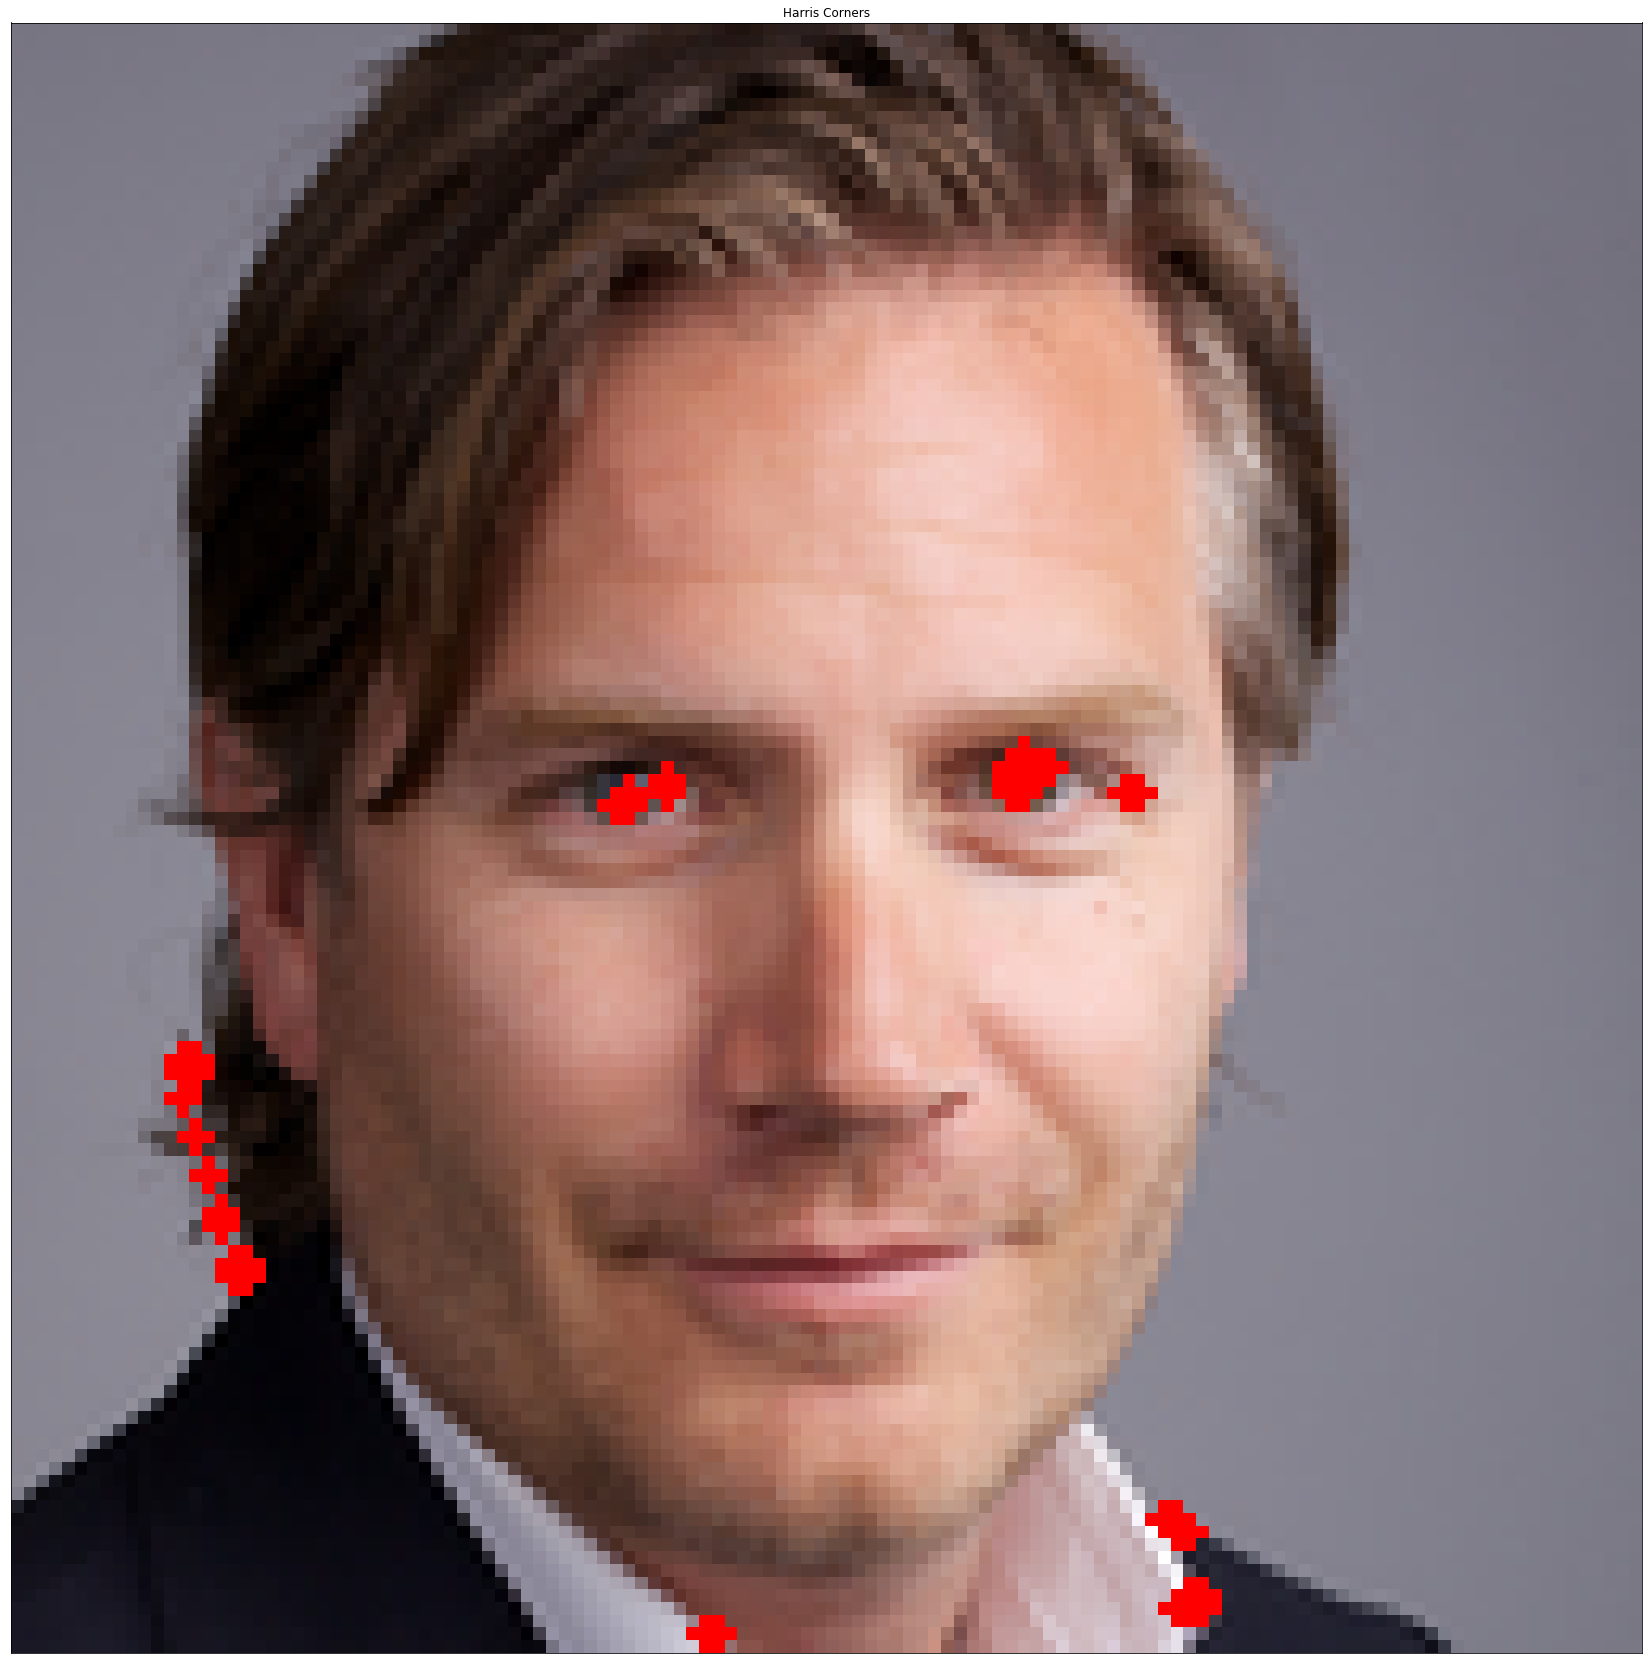

In [41]:
img5_google = cv2.imread(path +'01098.png',cv2.IMREAD_GRAYSCALE)
img_disp_5_goolge = cv2.imread(path +'01098.png')
img_disp_5_goolge = cv2.cvtColor(img_disp_5_goolge, cv2.COLOR_BGR2RGB)



# trying threshold 0.50
corner_shapeImg = my_harris_function(img5_google,1)
find_corner_point(corner_shapeImg,img_disp_5_goolge, 0.50, dot_size = 1)



After Normalization
1.7481367272907348e-17
2.0
threshold 0.4


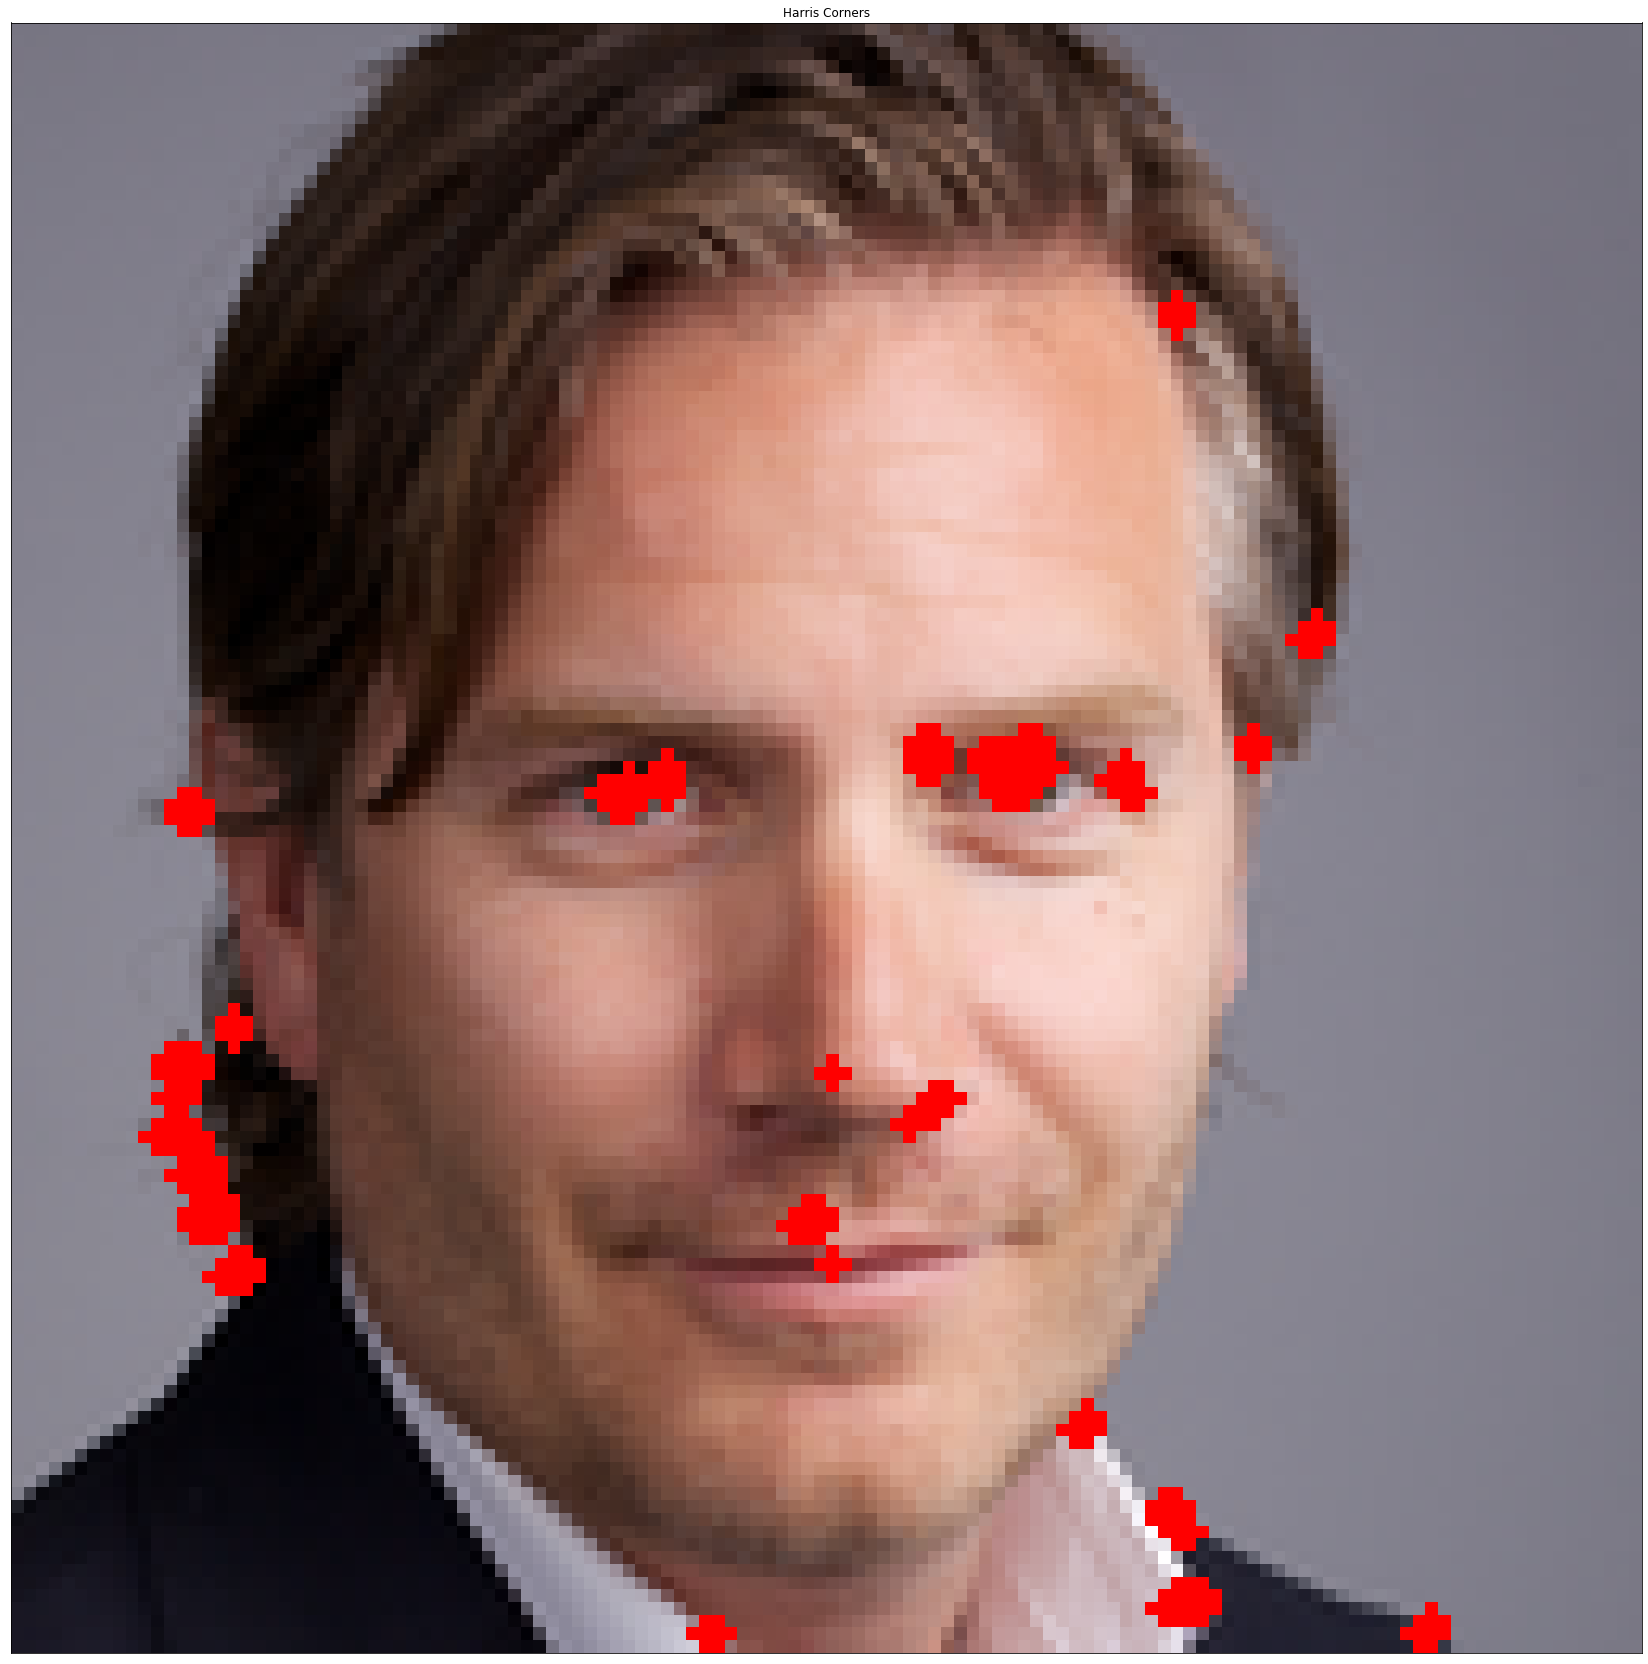

In [42]:
img5_google = cv2.imread(path +'01098.png',cv2.IMREAD_GRAYSCALE)
img_disp_5_goolge = cv2.imread(path +'01098.png')
img_disp_5_goolge = cv2.cvtColor(img_disp_5_goolge, cv2.COLOR_BGR2RGB)



# trying threshold 0.4
corner_shapeImg = my_harris_function(img5_google,1)
find_corner_point(corner_shapeImg,img_disp_5_goolge, 0.4, dot_size = 1)

**Observation**<br>
After trying out thresholds of values 0.38, 0.4 and 0.5, we found that the facial image has a very narrow threshold range. When the threshold is set to 0.38, the Harris corner detector successfully recognized the eyes, nose and mouth on the image as corner points. The problem is that the corner points seem to be clusterd with each other. <br>
<br>
The threshold 0.4 gives a intermediate result by reducing some of the clustered points while indicating eyes, nose and mouth. When the threshold is incremented to 0,5, we lose the information at mouth region.<br>
Thus, we can conclude that the **favorable threshold sits somewhere around 0.38 and 0,4**.

#### Trying with non maximum suppression neighbourhood size

As extra experiment, when scaling the NMS neighbourhood to 2 (means that there could only one maximum in 5 * 5 neighbourhood [i-2:i+2, j-2:j+2]), the corner point stop clustering with each other. A very low threshold value is good for the corners on the face. See demo below:



After Normalization
-5.979587292188476e-20
2.0
threshold 0.02


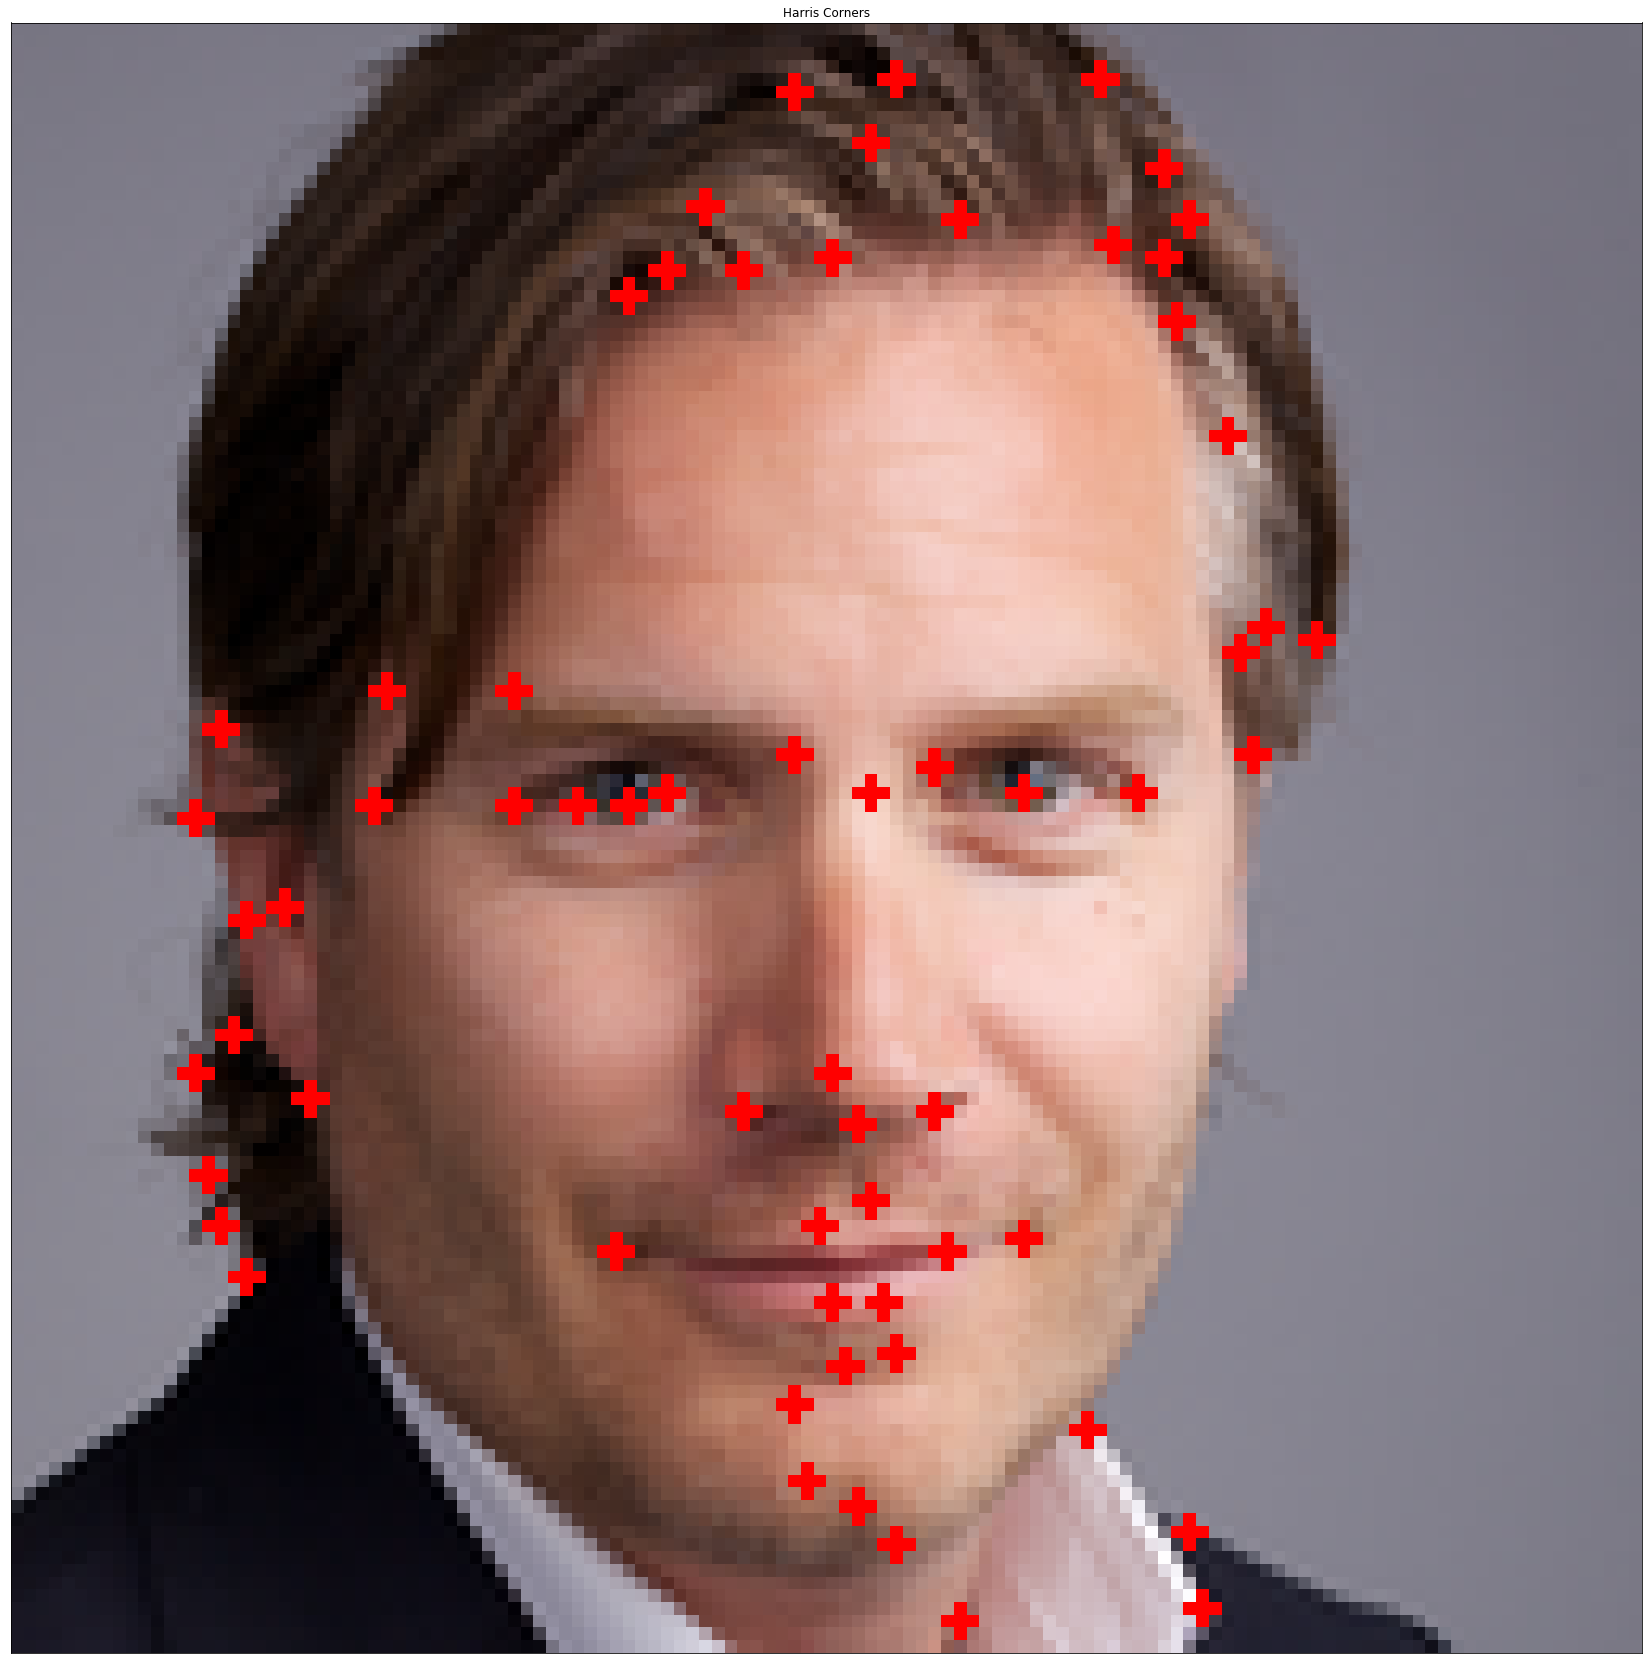

In [43]:
img5_google = cv2.imread(path +'01098.png',cv2.IMREAD_GRAYSCALE)
img_disp_5_goolge = cv2.imread(path +'01098.png')
img_disp_5_goolge = cv2.cvtColor(img_disp_5_goolge, cv2.COLOR_BGR2RGB)



# set NMS neighbour to 2
corner_shapeImg = my_harris_function(img5_google, 2)
find_corner_point(corner_shapeImg,img_disp_5_goolge, 0.02, dot_size = 1)